In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['agg.path.chunksize'] = 10000

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
time = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/ground_time_9246057.csv', sep=',', index_col=0)
day = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/groud_day_4089.csv', sep=',', index_col=0)
elec = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/5minute_demand_y_(12.06~).csv', sep=',', index_col=0)

In [26]:
# 결측치 확인
def missing_per(df):
    missing_percentages = df.isnull().mean() * 100
    missing_percentages_df = pd.DataFrame({'결측치 비율(%)': missing_percentages})
    
    return missing_percentages_df

# 80% 이상 결측치 컬럼 삭제
def delete_nan_over_80(df):
    threshold = 0.8
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages >= threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

# 스타일링 함수
def highlight_cells(value):
    if value >= 80 :  # 특정 값 이상인 경우
        return 'background-color: yellow'
    else:
        return ''
    
# , 제거 함수
def remove_comma(value):
    if isinstance(value, str):
        return value.replace(',', '')
    else:
        return value

# 기준일시 기준 데이터 분포도 확인
def value_confirm(df):
    for column in tqdm(df.columns):
        df[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot')
        plt.show()
        
        missing_percentages = round(df[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        print(df[column].value_counts())
        print()
        print(df[column].describe())
        print('='*30)

# nan값 처리 후 4사분위 값 비교
def compare_describe(df1, df2):
    for column in tqdm(df1.columns):
        d1 = df1[[column]].describe()
        d2 = df2[[column]].describe()

        res = pd.concat([d1, d2], axis=1)
        display(res)
        
        df1[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot_before')
        plt.show()
        missing_percentages = round(df1[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        
        df2[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot_after')
        plt.show()
        missing_percentages = round(df2[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        print('='*30)

# 특정 값 이상인 데이터를 평균 값으로 대체하는 함수
def replace_above_threshold(df, column_name, threshold):
    condition = df[column_name] <= threshold
    selected_data = df.loc[condition, column_name]
    mean_value = selected_data.mean()
    df.loc[condition, column_name] = mean_value
    return df

# Time

In [ ]:
time.info()

In [4]:
# 문자열 데이터 drop

time.drop(columns = ['운형(운형약어)'], inplace=True)

In [5]:
# 여러 지역의 데이터를 평균으로 환산

time = time.reset_index().groupby('기준일시').mean()

In [ ]:
time

In [7]:
# 결측치 비율 확인, 80% 이상 노란색

display(missing_per(time).style.applymap(highlight_cells))

  0%|                                                                         | 0/34 [00:00<?, ?it/s]

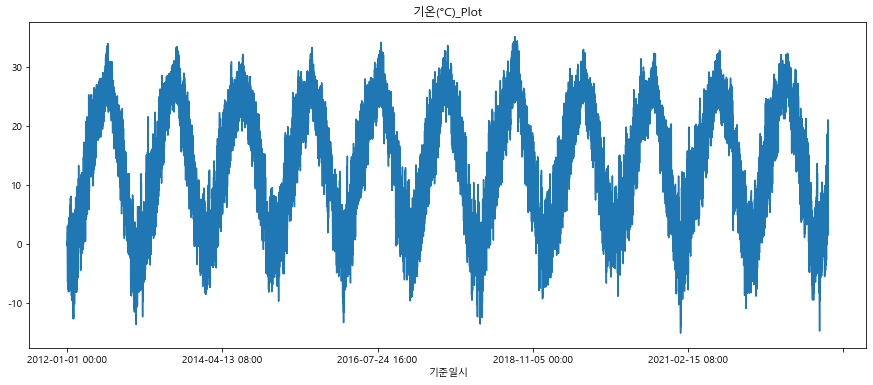

  3%|█▉                                                               | 1/34 [00:00<00:11,  2.82it/s]

결측치 비율(%) :  0.0

20.800000    9
22.500000    9
3.876842     9
11.500000    9
21.265263    8
            ..
8.467021     1
9.836170     1
9.048936     1
5.868817     1
1.540000     1
Name: 기온(°C), Length: 64557, dtype: int64

count    98136.000000
mean        12.983530
std          9.997446
min        -15.128421
25%          4.586095
50%         13.651579
75%         21.583202
max         35.211579
Name: 기온(°C), dtype: float64


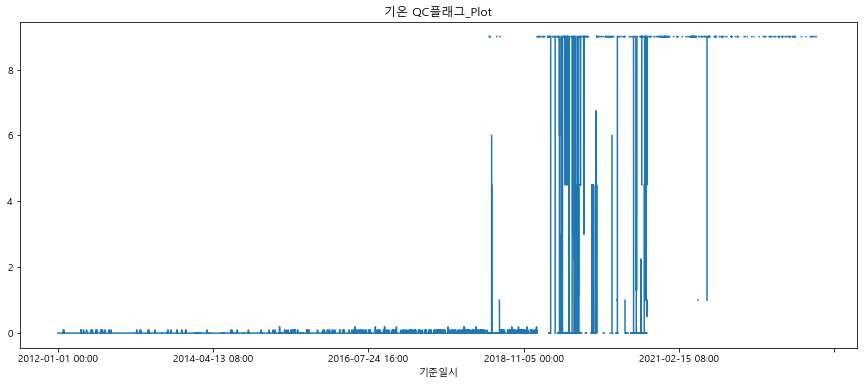

  6%|███▊                                                             | 2/34 [00:00<00:08,  3.97it/s]

결측치 비율(%) :  34.39

0.000000    60595
9.000000     2405
0.094737      633
0.095745      186
4.500000      135
0.096774      103
0.097826       79
1.000000       33
0.010638       27
3.000000       26
0.189474       21
0.098901       20
0.010753       19
6.000000       16
2.250000       15
0.010526       13
1.500000       13
1.285714       13
1.800000       12
0.191489        4
0.010870        3
0.193548        2
1.125000        2
0.093750        1
0.727273        1
0.900000        1
0.833333        1
0.857143        1
0.818182        1
0.600000        1
6.750000        1
0.500000        1
0.888889        1
0.800000        1
0.197802        1
0.021739        1
0.909091        1
Name: 기온 QC플래그, dtype: int64

count    64389.000000
mean         0.352101
std          1.720650
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 기온 QC플래그, dtype: float64


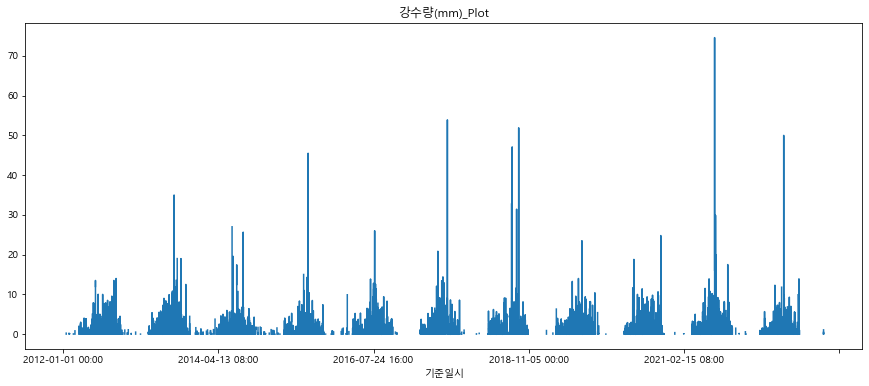

  9%|█████▋                                                           | 3/34 [00:00<00:06,  4.44it/s]

결측치 비율(%) :  56.25

0.000000    8168
0.100000    1167
0.050000     629
0.200000     560
0.500000     497
            ... 
6.770000       1
1.046429       1
1.144118       1
3.906250       1
3.529032       1
Name: 강수량(mm), Length: 13204, dtype: int64

count    42936.000000
mean         0.928127
std          1.672670
min          0.000000
25%          0.055556
50%          0.352705
75%          1.147276
max         74.600000
Name: 강수량(mm), dtype: float64


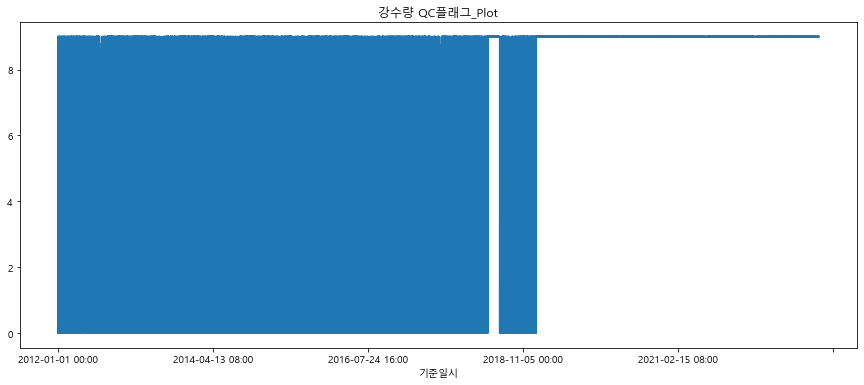

 12%|███████▋                                                         | 4/34 [00:00<00:07,  4.21it/s]

결측치 비율(%) :  18.45

9.000000    54247
0.000000     2886
4.500000     1162
6.000000      724
3.000000      521
            ...  
1.753247        1
4.754717        1
1.327869        1
4.752809        1
4.312500        1
Name: 강수량 QC플래그, Length: 2565, dtype: int64

count    80035.000000
mean         7.502233
std          2.705894
min          0.000000
25%          7.125000
50%          9.000000
75%          9.000000
max          9.000000
Name: 강수량 QC플래그, dtype: float64


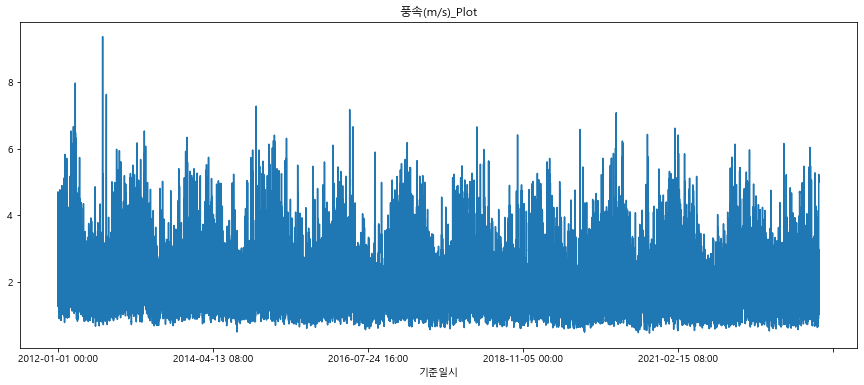

 15%|█████████▌                                                       | 5/34 [00:01<00:06,  4.20it/s]

결측치 비율(%) :  0.0

1.300000    66
1.200000    65
2.000000    56
1.500000    53
1.000000    53
            ..
6.129787     1
6.078723     1
6.218085     1
6.241489     1
5.155789     1
Name: 풍속(m/s), Length: 16967, dtype: int64

count    98137.000000
mean         2.036400
std          0.989062
min          0.462766
25%          1.254737
50%          1.828421
75%          2.577660
max          9.378261
Name: 풍속(m/s), dtype: float64


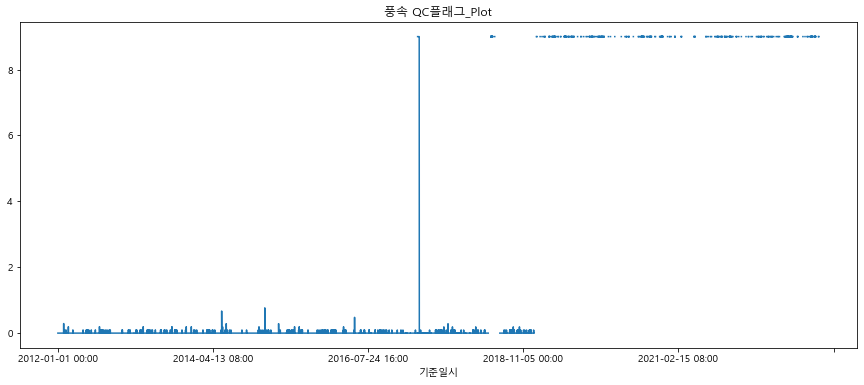

 18%|███████████▍                                                     | 6/34 [00:01<00:05,  4.73it/s]

결측치 비율(%) :  36.65

0.000000    57562
9.000000     3272
0.094737      591
0.095745      310
0.097826      195
0.096774      170
0.193548       27
0.189474       19
0.191489        7
0.290323        4
0.195652        3
0.287234        2
0.765957        1
0.391304        1
0.478723        1
0.670213        1
0.284211        1
Name: 풍속 QC플래그, dtype: int64

count    62167.000000
mean         0.475884
std          2.009248
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 풍속 QC플래그, dtype: float64


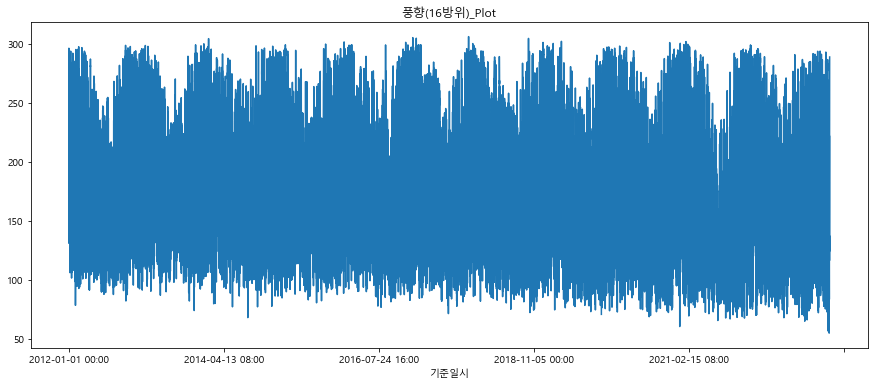

 21%|█████████████▍                                                   | 7/34 [00:01<00:06,  4.42it/s]

결측치 비율(%) :  0.0

130.000000    96
120.000000    90
160.000000    84
140.000000    79
150.000000    79
              ..
107.333333     1
106.703297     1
143.666667     1
160.439560     1
83.510638      1
Name: 풍향(16방위), Length: 10709, dtype: int64

count    98137.000000
mean       175.966462
std         52.004118
min         54.842105
25%        133.723404
50%        167.608696
75%        214.105263
max        306.105263
Name: 풍향(16방위), dtype: float64


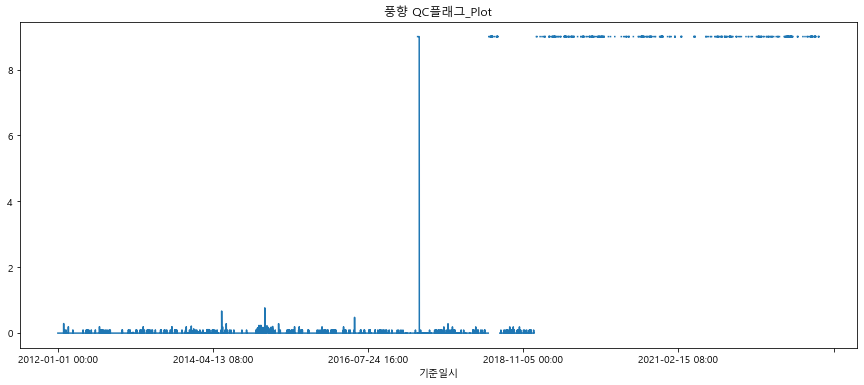

 24%|███████████████▎                                                 | 8/34 [00:01<00:05,  4.94it/s]

결측치 비율(%) :  36.33

0.000000    54913
9.000000     3585
0.094737      632
0.010753      460
0.095745      451
0.097826      217
0.031915      208
0.042553      206
0.053191      204
0.096774      201
0.063830      180
0.021277      165
0.074468      156
0.021505      153
0.010638      134
0.085106      111
0.106383       61
0.032258       58
0.117021       46
0.127660       42
0.189474       41
0.138298       28
0.193548       26
0.043011       25
0.148936       21
0.010870       20
0.159574       18
0.191489       15
0.053763       14
0.107527       13
0.170213       11
0.021739       10
0.180851        5
0.032609        5
0.075269        5
0.086022        4
0.290323        4
0.054348        3
0.195652        3
0.064516        3
0.118280        2
0.202128        2
0.234043        2
0.287234        2
0.391304        1
0.065217        1
0.086957        1
0.478723        1
0.215054        1
0.223404        1
0.765957        1
0.150538        1
0.236559        1
0.161290        1
0.021978

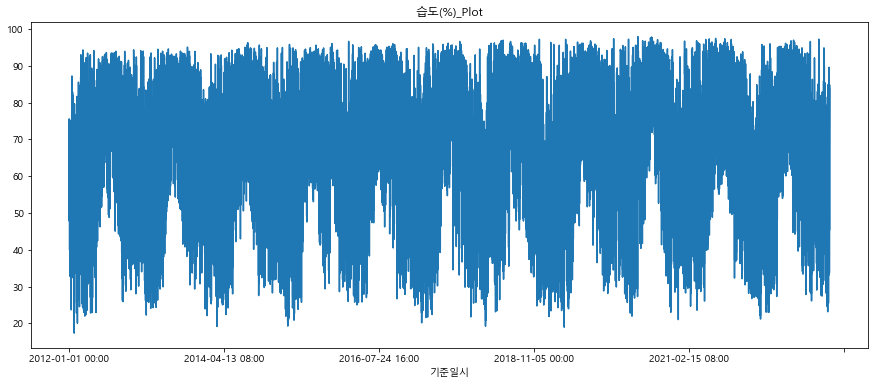

 26%|█████████████████▏                                               | 9/34 [00:02<00:05,  4.49it/s]

결측치 비율(%) :  0.0

90.000000    32
81.000000    31
72.000000    28
82.000000    28
77.000000    27
             ..
40.913043     1
35.826087     1
40.141304     1
70.384615     1
35.989362     1
Name: 습도(%), Length: 25509, dtype: int64

count    98136.000000
mean        68.705023
std         17.612178
min         17.365591
25%         56.200000
50%         70.865645
75%         83.694737
max         97.968421
Name: 습도(%), dtype: float64


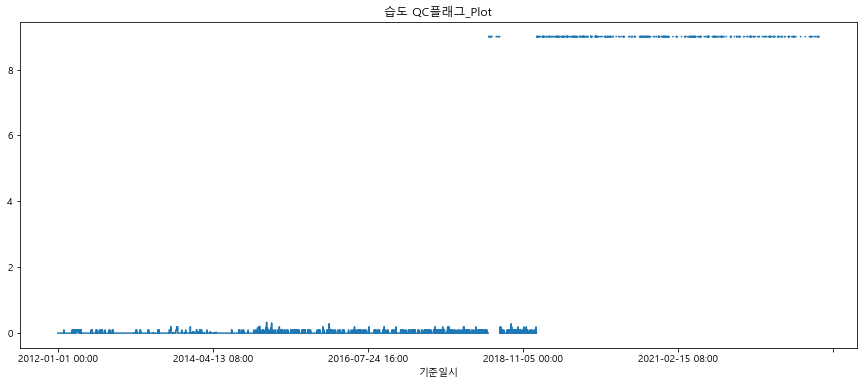

 29%|██████████████████▊                                             | 10/34 [00:02<00:04,  4.99it/s]

결측치 비율(%) :  34.76

0.000000    55749
9.000000     3851
0.096774     1147
0.094737     1083
0.095745      549
0.097826      411
0.010638      288
0.010753      165
0.021277      156
0.031915       99
0.021505       66
0.189474       55
0.042553       54
0.191489       50
0.053191       40
0.010870       36
0.063830       29
0.032258       20
0.098901       17
0.074468       16
0.193548       12
0.195652       10
0.021739       10
0.159574       10
0.127660       10
0.106383       10
0.202128        7
0.212766        6
0.117021        5
0.180851        5
0.284211        5
0.010989        5
0.064516        5
0.107527        4
0.086022        4
0.043011        4
0.138298        4
0.085106        4
0.148936        4
0.075269        3
0.287234        3
0.170213        3
0.053763        3
0.319149        2
0.223404        1
0.329787        1
0.011111        1
0.244681        1
0.308511        1
0.255319        1
0.197802        1
0.093750        1
Name: 습도 QC플래그, dtype: int64

count    64027

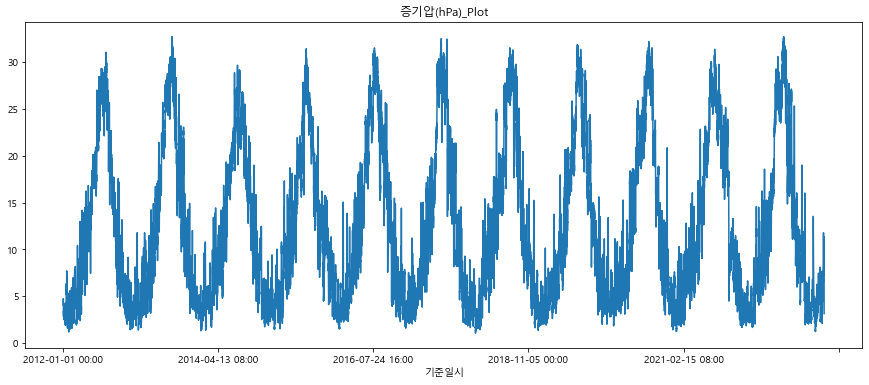

결측치 비율(%) :  0.0



 32%|████████████████████▋                                           | 11/34 [00:02<00:04,  5.03it/s]

4.700000    18
2.806316    14
7.100000    13
5.300000    13
6.351579    13
            ..
6.105319     1
6.324468     1
6.372340     1
6.390426     1
4.704211     1
Name: 증기압(hPa), Length: 55790, dtype: int64

count    98136.000000
mean        12.470213
std          8.363478
min          1.055789
25%          5.195789
50%         10.100000
75%         18.999211
max         32.728421
Name: 증기압(hPa), dtype: float64


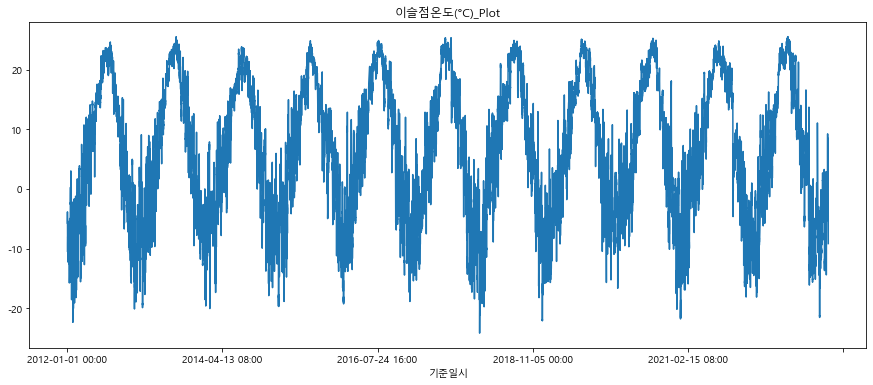

 35%|██████████████████████▌                                         | 12/34 [00:02<00:04,  5.17it/s]

결측치 비율(%) :  0.0

 15.610526    9
 22.848421    8
 22.003158    8
 22.500000    8
 21.127368    7
             ..
-5.574468     1
-5.798936     1
-5.534043     1
-5.673404     1
 3.237895     1
Name: 이슬점온도(°C), Length: 67083, dtype: int64

count    98136.000000
mean         6.537621
std         11.264279
min        -24.132632
25%         -2.627368
50%          6.837095
75%         16.568817
max         25.510526
Name: 이슬점온도(°C), dtype: float64


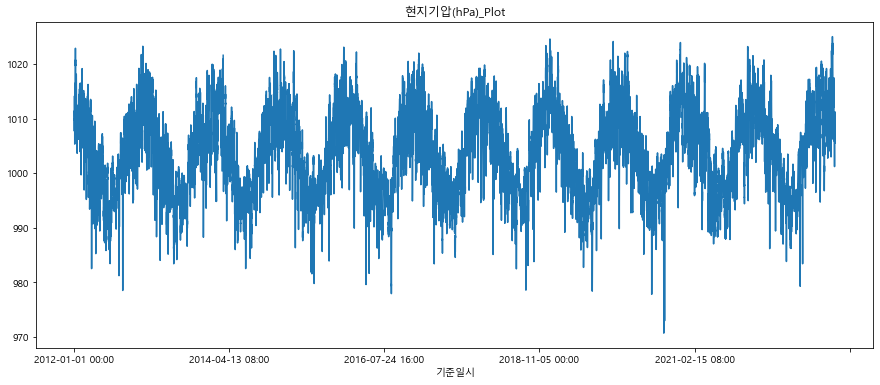

결측치 비율(%) :  0.04



 38%|████████████████████████▍                                       | 13/34 [00:02<00:03,  5.26it/s]

996.300000     12
999.109474     11
1005.627368    10
999.017895     10
1011.237895    10
               ..
1008.498936     1
1008.347872     1
1008.628723     1
1010.032979     1
1008.040000     1
Name: 현지기압(hPa), Length: 58630, dtype: int64

count    98100.000000
mean      1003.835490
std          7.672712
min        970.706316
25%        997.838888
50%       1004.081053
75%       1009.750529
max       1025.016842
Name: 현지기압(hPa), dtype: float64


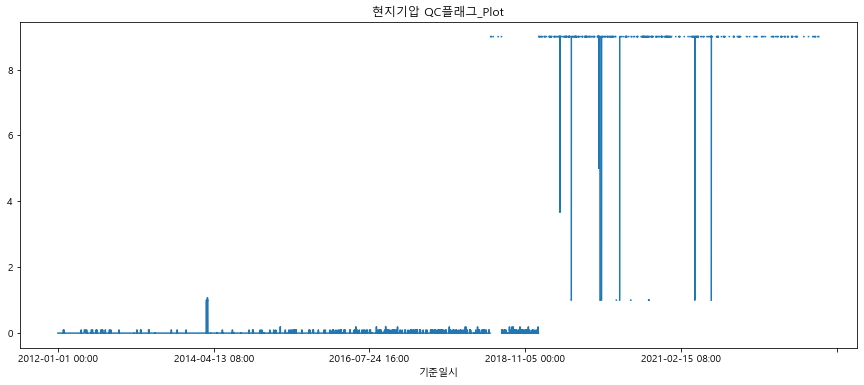

 41%|██████████████████████████▎                                     | 14/34 [00:02<00:03,  5.51it/s]

결측치 비율(%) :  35.81

0.000000    58468
9.000000     2738
0.094737      835
0.096774      334
0.095745      237
1.000000      109
0.097826       95
0.010638       88
0.189474       31
0.010526       17
5.000000        9
0.989247        8
0.010753        4
0.191489        4
0.193548        3
0.978495        2
0.021053        2
0.098901        2
0.107527        1
0.043011        1
1.075269        1
0.967742        1
0.197802        1
0.101124        1
0.093750        1
0.105263        1
0.010870        1
3.666667        1
0.031579        1
Name: 현지기압 QC플래그, dtype: int64

count    62997.000000
mean         0.396278
std          1.835597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 현지기압 QC플래그, dtype: float64


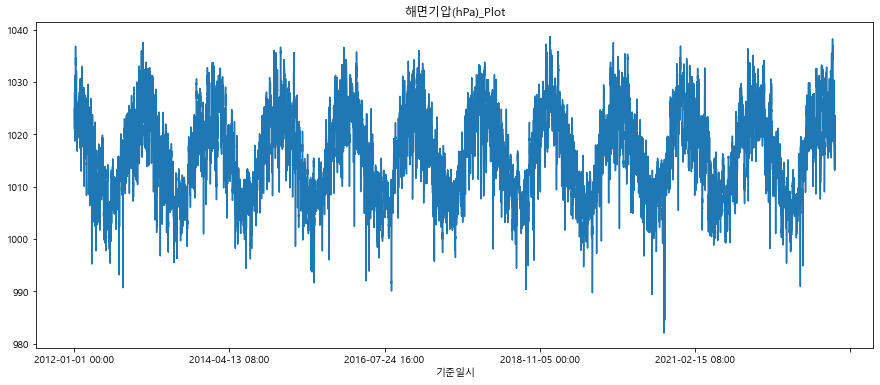

 44%|████████████████████████████▏                                   | 15/34 [00:03<00:03,  5.30it/s]

결측치 비율(%) :  0.0

1010.300000    10
1020.021053    10
1021.205263    10
1019.800000     9
1019.747368     9
               ..
1017.003191     1
1017.755319     1
1019.741489     1
1019.940426     1
1018.040000     1
Name: 해면기압(hPa), Length: 60173, dtype: int64

count    98136.000000
mean      1016.468815
std          8.139511
min        982.045263
25%       1010.027368
50%       1016.716932
75%       1022.789712
max       1038.693684
Name: 해면기압(hPa), dtype: float64


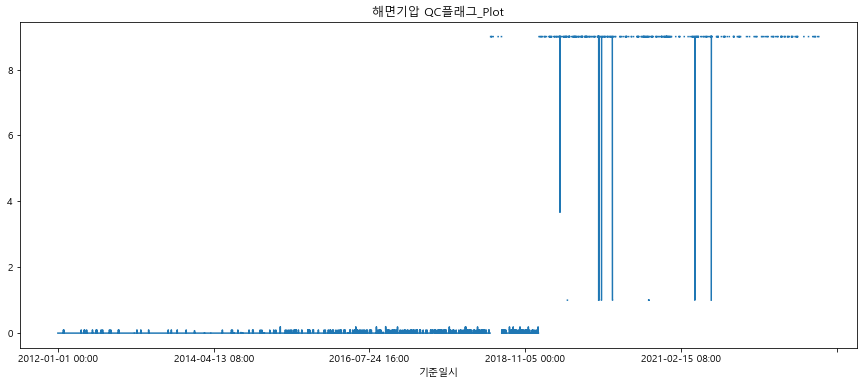

 47%|██████████████████████████████                                  | 16/34 [00:03<00:03,  5.65it/s]

결측치 비율(%) :  35.47

0.000000    58602
9.000000     3076
0.094737      892
0.095745      268
0.096774      241
0.097826       95
1.000000       62
0.189474       27
0.010638       17
5.000000        8
0.010526        8
0.191489        4
0.193548        3
0.075269        2
0.098901        2
0.043011        2
0.021053        2
0.053763        2
0.064516        2
0.105263        1
3.666667        1
0.101124        1
0.093750        1
0.197802        1
0.031579        1
0.021277        1
0.010753        1
6.333333        1
Name: 해면기압 QC플래그, dtype: int64

count    63324.000000
mean         0.441330
std          1.935233
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 해면기압 QC플래그, dtype: float64


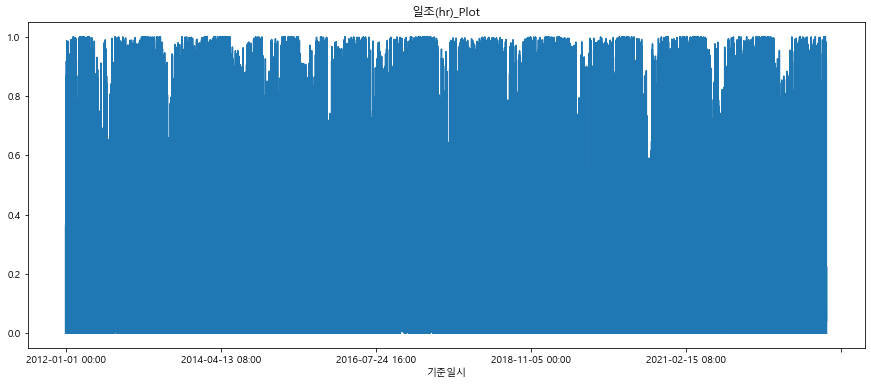

 50%|████████████████████████████████                                | 17/34 [00:03<00:03,  4.66it/s]

결측치 비율(%) :  43.36

0.000000    4941
0.001053     257
1.000000     209
0.001064     204
0.002105     186
            ... 
0.016484       1
0.627174       1
0.002564       1
0.002439       1
0.017857       1
Name: 일조(hr), Length: 5654, dtype: int64

count    55586.000000
mean         0.459981
std          0.363962
min          0.000000
25%          0.063158
50%          0.458511
75%          0.822340
max          1.000000
Name: 일조(hr), dtype: float64


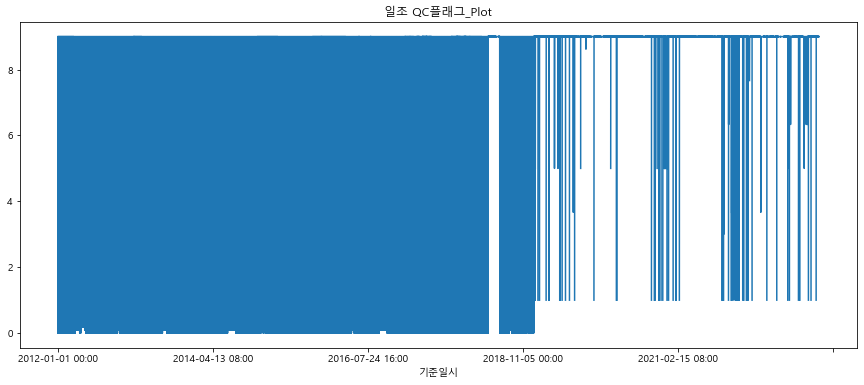

 53%|█████████████████████████████████▉                              | 18/34 [00:03<00:03,  4.02it/s]

결측치 비율(%) :  16.96

9.000000    48091
0.000000    25296
0.095745     1849
0.094737     1494
0.096774     1019
            ...  
3.387097        1
0.580645        1
4.354839        1
0.107143        1
7.666667        1
Name: 일조 QC플래그, Length: 447, dtype: int64

count    81491.000000
mean         5.452153
std          4.370563
min          0.000000
25%          0.000000
50%          9.000000
75%          9.000000
max          9.000000
Name: 일조 QC플래그, dtype: float64


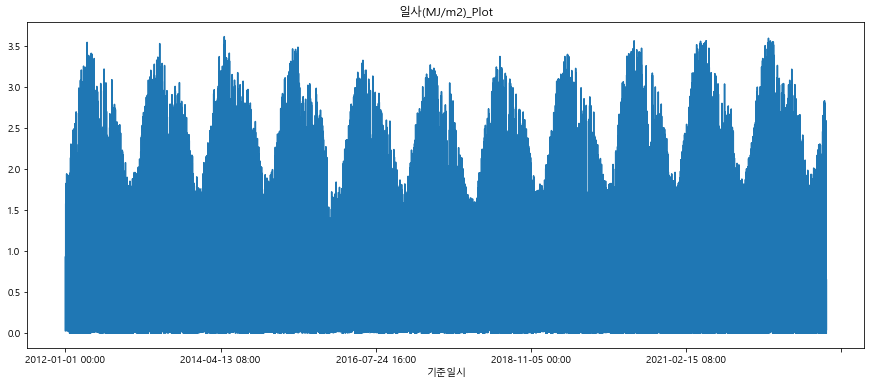

 56%|███████████████████████████████████▊                            | 19/34 [00:04<00:03,  3.96it/s]

결측치 비율(%) :  43.6

0.000000    1477
0.010000      64
0.005000      53
0.020000      39
0.002500      29
            ... 
2.122619       1
2.350238       1
2.231190       1
1.933810       1
0.044510       1
Name: 일사(MJ/m2), Length: 37663, dtype: int64

count    55346.000000
mean         1.029436
std          0.879976
min          0.000000
25%          0.223435
50%          0.860465
75%          1.673390
max          3.610263
Name: 일사(MJ/m2), dtype: float64


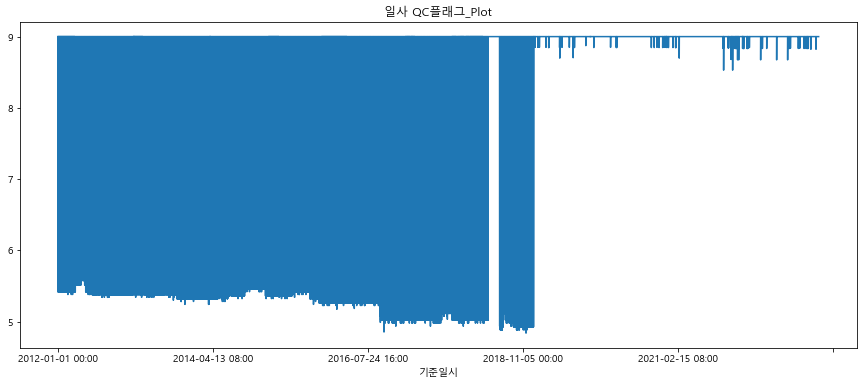

 59%|█████████████████████████████████████▋                          | 20/34 [00:04<00:03,  3.91it/s]

결측치 비율(%) :  0.0

9.000000    65411
5.021053     5723
5.380435     5649
5.361702     3775
5.265957     3736
            ...  
4.853933        1
5.184783        1
5.287234        1
5.538462        1
5.464286        1
Name: 일사 QC플래그, Length: 210, dtype: int64

count    98137.000000
mean         7.778547
std          1.747695
min          4.838710
25%          5.380435
50%          9.000000
75%          9.000000
max          9.000000
Name: 일사 QC플래그, dtype: float64


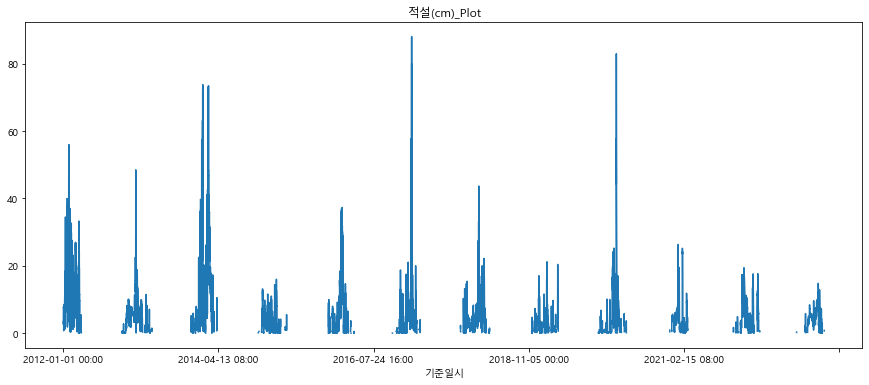

 62%|███████████████████████████████████████▌                        | 21/34 [00:04<00:02,  4.35it/s]

결측치 비율(%) :  77.09

0.500000    246
0.000000    197
1.000000    179
0.200000    168
0.400000    154
           ... 
5.280952      1
5.704348      1
6.025000      1
6.525000      1
5.671429      1
Name: 적설(cm), Length: 7913, dtype: int64

count    22488.000000
mean         7.704547
std          8.863089
min          0.000000
25%          2.644861
50%          5.065017
75%          9.166667
max         88.100000
Name: 적설(cm), dtype: float64


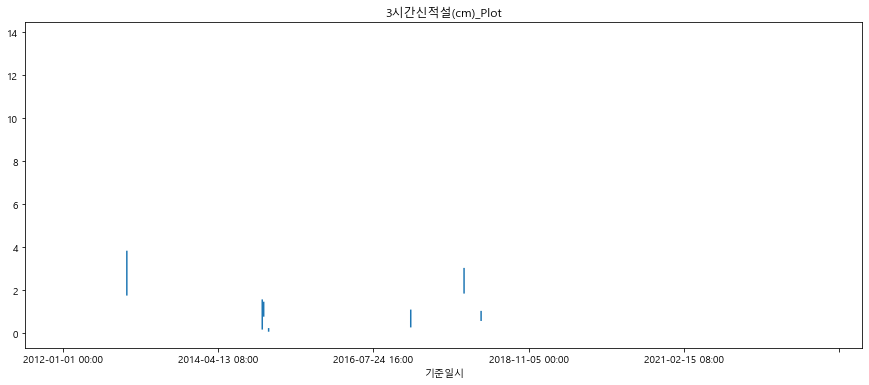

 65%|█████████████████████████████████████████▍                      | 22/34 [00:04<00:02,  4.74it/s]

결측치 비율(%) :  96.25

0.000000    577
0.100000    243
0.200000    209
0.300000    156
0.500000    122
           ... 
2.388889      1
5.280000      1
2.275000      1
3.266667      1
2.033333      1
Name: 3시간신적설(cm), Length: 754, dtype: int64

count    3679.000000
mean        0.939143
std         1.402206
min         0.000000
25%         0.100000
50%         0.500000
75%         1.200000
max        13.800000
Name: 3시간신적설(cm), dtype: float64


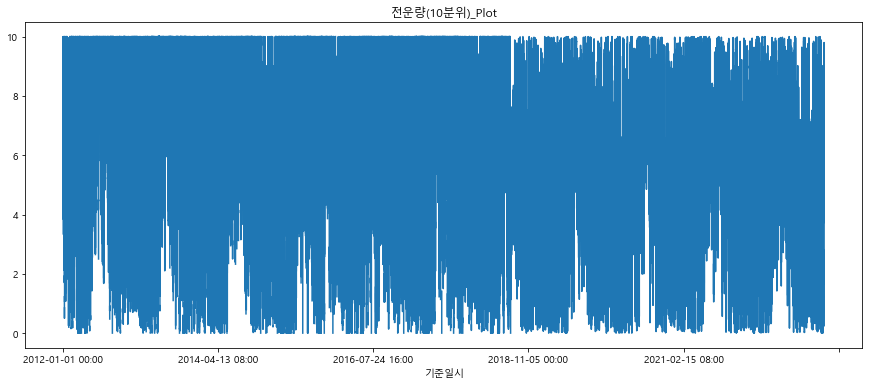

 68%|███████████████████████████████████████████▎                    | 23/34 [00:05<00:02,  4.36it/s]

결측치 비율(%) :  5.96

10.000000    5816
9.000000      793
8.000000      645
0.000000      413
9.500000      379
             ... 
2.871795        1
2.897436        1
6.942857        1
7.638889        1
2.242105        1
Name: 전운량(10분위), Length: 5232, dtype: int64

count    92284.000000
mean         5.553166
std          3.113147
min          0.000000
25%          2.850000
50%          5.723404
75%          8.382979
max         10.000000
Name: 전운량(10분위), dtype: float64


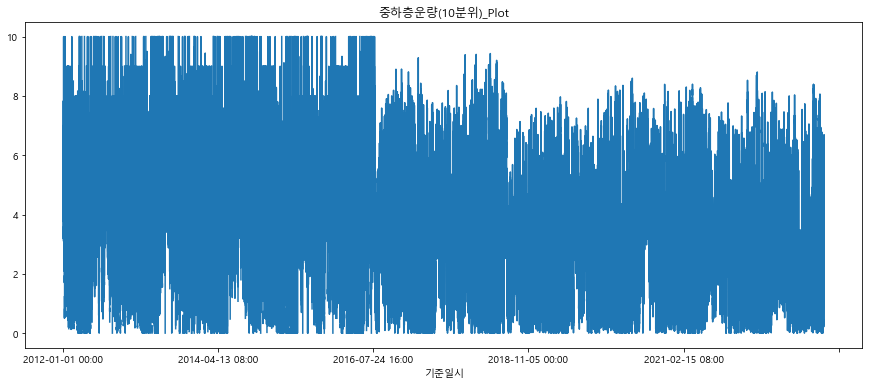

 71%|█████████████████████████████████████████████▏                  | 24/34 [00:05<00:02,  4.24it/s]

결측치 비율(%) :  4.16

0.000000     1802
7.000000      706
8.000000      581
6.000000      545
10.000000     485
             ... 
4.469388        1
2.836735        1
2.816327        1
2.918367        1
3.212766        1
Name: 중하층운량(10분위), Length: 5796, dtype: int64

count    94059.000000
mean         3.408492
std          2.357057
min          0.000000
25%          1.318182
50%          3.173913
75%          5.325000
max         10.000000
Name: 중하층운량(10분위), dtype: float64


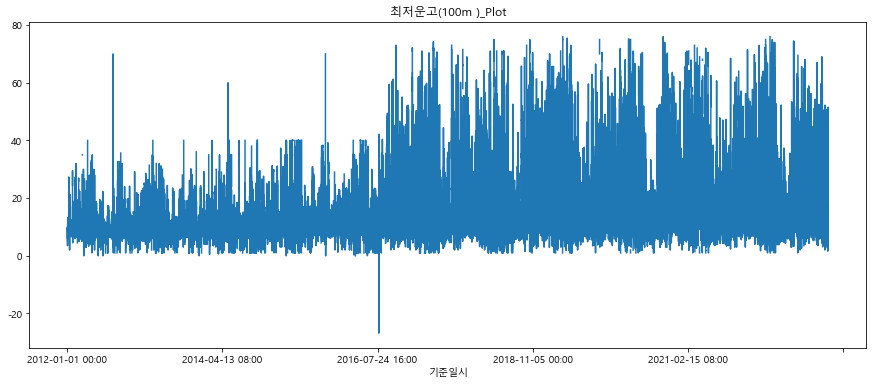

 74%|███████████████████████████████████████████████                 | 25/34 [00:05<00:02,  4.48it/s]

결측치 비율(%) :  6.48

10.000000    2894
9.000000     1243
8.000000     1153
9.500000      733
7.000000      667
             ... 
15.511628       1
15.337209       1
15.246914       1
15.945205       1
18.573529       1
Name: 최저운고(100m ), Length: 24627, dtype: int64

count    91773.000000
mean        15.014502
std         10.761716
min        -26.818182
25%          9.000000
50%         10.576923
75%         16.882353
max         76.000000
Name: 최저운고(100m ), dtype: float64


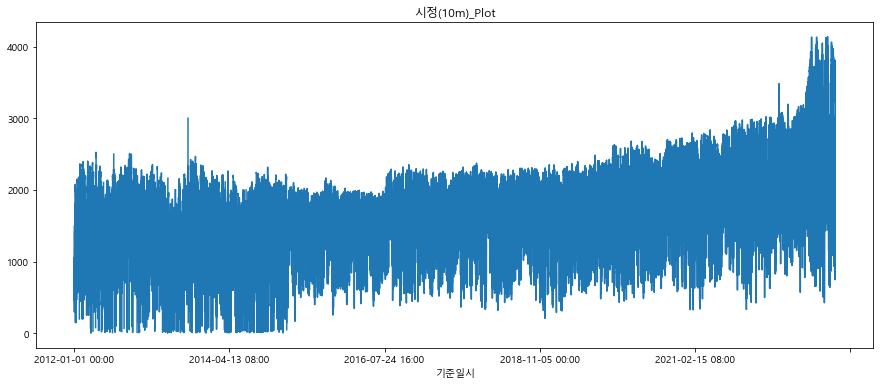

 76%|████████████████████████████████████████████████▉               | 26/34 [00:05<00:01,  4.58it/s]

결측치 비율(%) :  2.77

1500.000000    194
2000.000000    183
1200.000000    160
1800.000000    107
800.000000      86
              ... 
1702.451613      1
1520.913043      1
1417.869565      1
1310.473118      1
3777.542553      1
Name: 시정(10m), Length: 72034, dtype: int64

count    95414.000000
mean      1674.317731
std        575.783660
min          3.000000
25%       1275.754734
50%       1705.325889
75%       2037.437197
max       4139.136842
Name: 시정(10m), dtype: float64


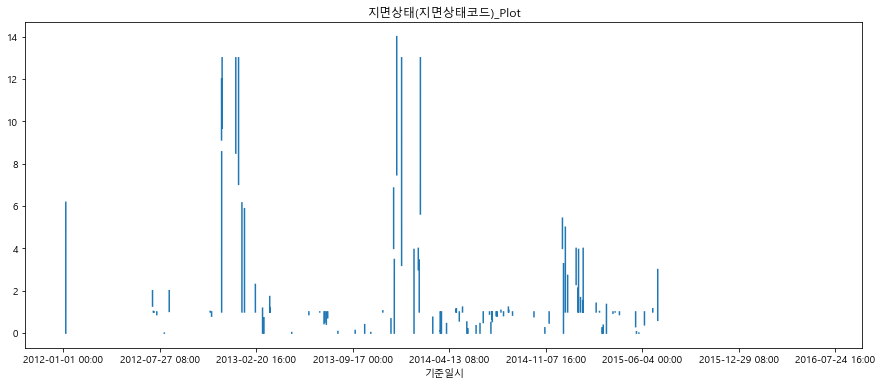

 79%|██████████████████████████████████████████████████▊             | 27/34 [00:05<00:01,  4.79it/s]

결측치 비율(%) :  93.12

1.000000    290
0.000000    258
0.500000    140
0.125000    117
0.025000    103
           ... 
1.804878      1
1.745098      1
2.380952      1
2.692308      1
0.673469      1
Name: 지면상태(지면상태코드), Length: 777, dtype: int64

count    6749.000000
mean        1.415061
std         1.927730
min         0.000000
25%         0.350000
50%         0.784314
75%         1.363636
max        14.000000
Name: 지면상태(지면상태코드), dtype: float64


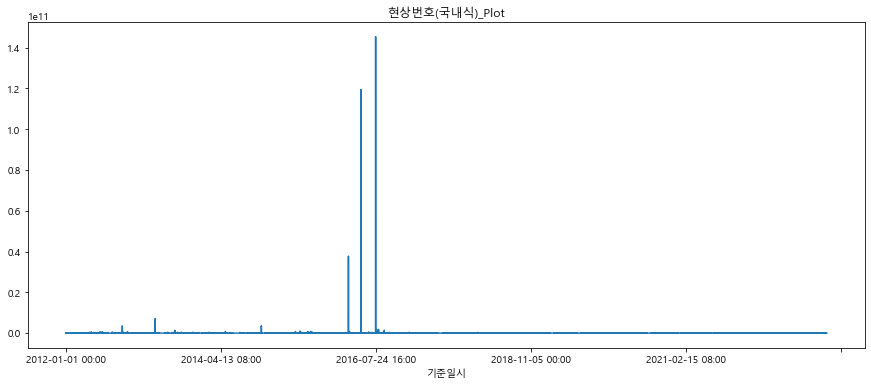

 82%|████████████████████████████████████████████████████▋           | 28/34 [00:06<00:01,  4.98it/s]

결측치 비율(%) :  14.4

1.900000e+01    8346
1.000000e+00    3880
4.000000e+01    2915
5.000000e+00    1777
8.000000e+00    1271
                ... 
1.487833e+03       1
2.504000e+03       1
8.441118e+04       1
1.027078e+07       1
1.369080e+06       1
Name: 현상번호(국내식), Length: 26354, dtype: int64

count    8.400200e+04
mean     4.451491e+06
std      6.633714e+08
min      0.000000e+00
25%      1.900000e+01
50%      2.083667e+02
75%      7.576119e+02
max      1.454340e+11
Name: 현상번호(국내식), dtype: float64


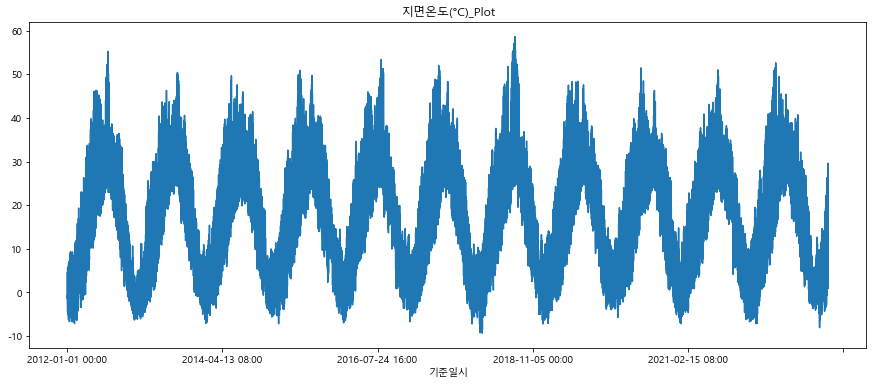

 85%|██████████████████████████████████████████████████████▌         | 29/34 [00:06<00:01,  4.69it/s]

결측치 비율(%) :  0.0

 16.827368    8
 19.300000    8
 3.088421     8
 13.878947    7
-0.203158     7
             ..
 9.965957     1
 9.828723     1
 9.632979     1
 9.354255     1
 6.726316     1
Name: 지면온도(°C), Length: 69355, dtype: int64

count    98136.000000
mean        15.040603
std         12.118407
min         -9.335106
25%          4.391557
50%         14.791534
75%         24.070731
max         58.633684
Name: 지면온도(°C), dtype: float64


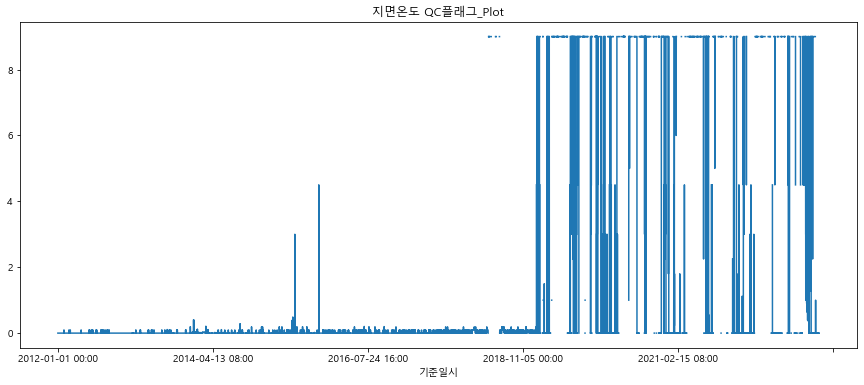

결측치 비율(%) :  28.86

0.000000    60314
9.000000     3832
0.094737     1976
0.095745      917
0.010753      582
            ...  
0.197802        1
0.117021        1
0.489130        1
0.290323        1
6.750000        1
Name: 지면온도 QC플래그, Length: 79, dtype: int64

count    69812.000000
mean         0.534663
std          2.070393
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 지면온도 QC플래그, dtype: float64


 88%|████████████████████████████████████████████████████████▍       | 30/34 [00:06<00:00,  5.06it/s]

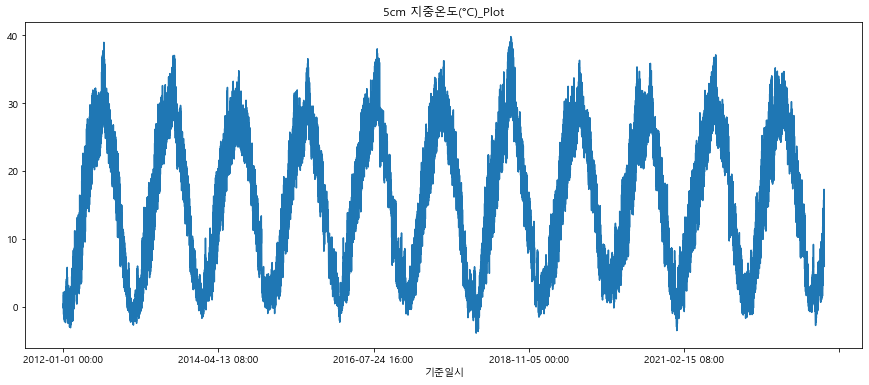

 91%|██████████████████████████████████████████████████████████▎     | 31/34 [00:06<00:00,  5.04it/s]

결측치 비율(%) :  0.0

25.500000    24
22.000000    20
0.600000     19
5.000000     19
22.250000    18
             ..
17.840741     1
16.940741     1
29.209375     1
24.578125     1
6.017241      1
Name: 5cm 지중온도(°C), Length: 41525, dtype: int64

count    98137.000000
mean        15.047269
std          9.920525
min         -3.807143
25%          5.500000
50%         15.434375
75%         23.760714
max         39.817857
Name: 5cm 지중온도(°C), dtype: float64


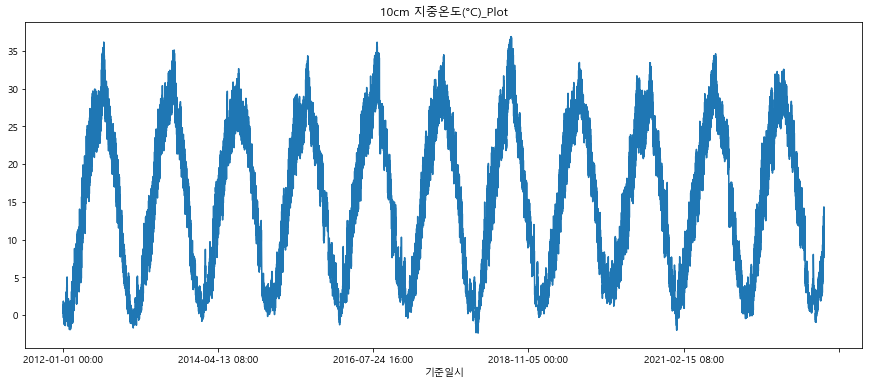

 94%|████████████████████████████████████████████████████████████▏   | 32/34 [00:06<00:00,  4.90it/s]

결측치 비율(%) :  0.0

23.500000    24
25.000000    24
2.500000     23
22.800000    21
2.400000     20
             ..
17.553125     1
17.909375     1
19.081250     1
19.515625     1
7.651724      1
Name: 10cm 지중온도(°C), Length: 39787, dtype: int64

count    98137.000000
mean        15.023566
std          9.584733
min         -2.381481
25%          5.711111
50%         15.437037
75%         23.662500
max         36.889286
Name: 10cm 지중온도(°C), dtype: float64


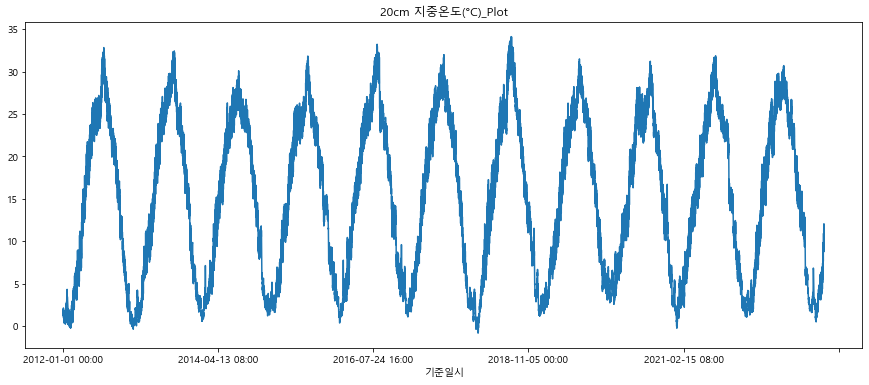

 97%|██████████████████████████████████████████████████████████████  | 33/34 [00:07<00:00,  4.71it/s]

결측치 비율(%) :  0.0

2.000000     27
3.000000     27
2.600000     25
23.500000    24
2.200000     23
             ..
23.303125     1
24.365625     1
24.115625     1
24.759375     1
9.251724      1
Name: 20cm 지중온도(°C), Length: 36640, dtype: int64

count    98137.000000
mean        15.168991
std          9.136890
min         -0.811111
25%          6.214286
50%         15.538462
75%         23.632143
max         34.110714
Name: 20cm 지중온도(°C), dtype: float64


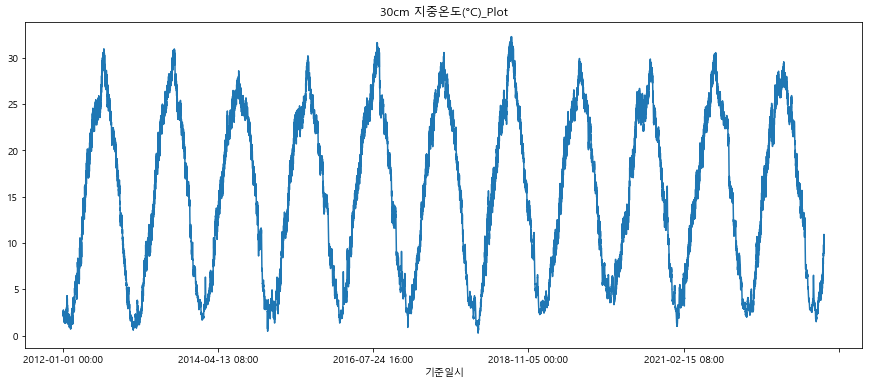

결측치 비율(%) :  0.0



100%|████████████████████████████████████████████████████████████████| 34/34 [00:07<00:00,  4.65it/s]

25.000000    25
23.500000    25
3.625000     24
3.653571     24
3.382143     23
             ..
9.448000      1
9.676000      1
8.784615      1
8.734615      1
9.768966      1
Name: 30cm 지중온도(°C), Length: 34852, dtype: int64

count    98137.000000
mean        15.226097
std          8.775796
min          0.272000
25%          6.571429
50%         15.653571
75%         23.453125
max         32.275000
Name: 30cm 지중온도(°C), dtype: float64


In [8]:
value_confirm(time)

In [ ]:
'''
=====
Time Data

전처리 방향(v1) : 의미상 유의미해 보이고, 결측치가 적은 컬럼은 최대한 살려보기

* QC플래그 : 품질검사 정보 0(정상), 1(오류), 9(결측)
=====

'기온(°C)' : 
    - 결측값이 0.05비율로 있고 기온은 이전 값과 크게 다르지 않다고 판단하여 결측치는 이전 값으로 채움
'기온 QC플래그' : 기온측정의 품질검사 데이터
    - 9(Nan)로 측정된 4000개의 데이터와 약 40% 결측치가 있지만, 
    - 시계열 데이터 특성상 일자를 40%나 제거하면 유의미한 추세나 예측이 어렵다고 판단
    - 전부 0으로 (정상 데이터로) 판단하고 진행
    
'강수량(mm)' : 
    - 결측치가 약 91%이지만, 비가 안온 날 것이라 판단하고 0으로 채우고 진행
'강수량 QC플래그' : 강수량 품질검사 데이터
    - 9(Nan)으로 측정된 데이터개 약 150만개에 결측치가 77% 이지만, 
    - 강수량 데이터와 마찬가지로 비가 안온 날 이라 가정하고 진행
    
'풍속(m/s)' : 
    - 결측치가 적어서 사용 가능해 보임
    - 특정 시기에 튀는 부분이 보이기 때문에, 단순히 근처 값을 활용하기 보다
    - 해당 시기 3일전의 평균값으로 채워서 진행
'풍속 QC플래그' : 풍속 품질검사 데이터
    - 결측치가 약 40%이고, 9(Nan)값이 약 5000개 이지만,
    - 50% 이상 정상 데이터라 풍속 데이터도 활용하는 것으로 진행
    - 2019년 부터 0(정상)값이 없는데, 
    - 앞 7년간 패턴으로 봤을 때 결측치들이 0의 값일 수 있다는 판단
    
'풍향(16방위)' : 풍향은 국제적으로 동서남북 4방위를 2번 더 나눈 16방위로 측정
    - 결측치 비율이 0.23% 로 적기 때문에 가장 값이 많은 0으로 채우고 진행
'풍향 QC플래그' : 풍향 품질검사 데이터
    - 풍속 QC플래그와 마찬가지로 19년도 데이터부터 0(정상)값이 측정이 안됐지만,
    - 이전 7년의 패턴과 비슷한 비율로 생각하고 정상데이터라 판단하여 진행
    
'습도(%)' : 
    - 결측치가 적고, 특정 패턴이 없는 것으로 판단되어 평균값으로 채우고 진행
'습도 QC플래그' : 습도 품질검사 데이터
    - 19년 하반기부터 0(정상)값이 측정되지 않았지만, 앞과 비슷한 패턴이라 판단하고 
    - 습도 값도 활용하는 것으로 진행

    '증기압(hPa)' : 대기의 전체 압력 중에서 그 대기에 함유되어 있는 수증기가 갖고 있는 분압
        - 특정한 패턴이 보이지 않고, 결측치가 0.09%로 적기 때문에
        - 평균값으로 결측치를 채우고 진행
        
    '이슬점온도(°C)' : 이슬이 형성되는 온도
        - 특정한 패턴이 보이지 않고, 결측치가 0.11%로 적기 때문에
        - 평균값으로 결측치를 채우고 진행
        
'현지기압(hPa)' : 해당 지역의 기압
    - 결측치가 적고, 패턴이 보이는 듯 하지만 정확하지 않기 때문에
    - 평균 값으로 채우고 진행
'현지기압 QC플래그' : 현지기압 품질검사 데이터
    - 앞선 QC플래그 처럼 결측치 비율이 약 40%대 이지만, 
    - 19년도 말 부터 1(비정상), 9(Nan)값은 측정됐지만 0(정상)값이 측정되지 않았으므로
    - 결측치를 정상 값으로 판단하고 현지기압 데이터도 활용
    
'해면기압(hPa)' : 정해진 장소의 평균 해수면 높이에서의 기압
    - 결측치가 적기 때문에, 평균값으로 채워서 진행
'해면기압 QC플래그' : 해면기압 품질검사 데이터
    - 앞선 현지기압 QC플래그와 마찬가지의 비율을 갖고 있기 때문에
    - 해면기압도 활용

'일조(hr)' : 태양의 직사광이 지표면에 비친 시간
    - 0과 1의 데이터가 가장 많고 이상치 처럼 보이는 데이터가 있음
    - 결측치가 45%로 꽤 많은 편이지만 
    - 0과 1 사이 평균값에서 크게 벗어나지 않을 것이라 가정하고 진행
    - 12년도 중순 ~ 13년도 초에만 관측되는 1 이상의 데이터는 이상치로 가정하고
    - 1로 변형하여 진행
'일조 QC플래그' : 일조 품질검사 데이터
    - 결측치가 22%이지만 9(Nan) 값이 0(정상) 값 보다 많은 것으로 보아
    - 데이터의 정보를 확신할 수 없음
    - 일조 데이터는 제거하는 것이 좋아보임

'일사(MJ/m2)' : 태양으로부터 지구를 향해 방사되는 에너지, 태양 복사 에너지
    - 결측치가 76%로 많은 편이고 14년 하반기 및 가끔 결측치로 판단되는 값이 보임
    - 결측치가 많아 어떤 값으로 채울지 고민됨
'일사 QC플래그' : 일사 품질검사 데이터
    - QC플래그 값 역시 9(Nan)으로 측정된 데이터가 70%이상이며, 19년 하반기 이후
    - 0(정상)값이 측정되지는 않았지만 일사 데이터를 적극적으로 활용하기는 어려워 보임

    '적설(cm)' : 
        - 절설 데이터는 활용해보면 좋을 것 같아, 결측치는 눈이 오지 않은 것으로 판단하고
        - 0으로 처리하여 사용
    '3시간신적설(cm)' : 3시간 동안 새로 쌓인 눈
        - 결측치가 너무 많아 활용하기 어려움
    '전운량(10분위)' : 전층에 있는 구름의 분포량
        - 운량의 경우 목측으로 진행하기 때문에, 사람마다 판단하는 기준이 다를 것이라 생각되므로
        - 활용하지 않는 것이 좋아 보임
    '중하층운량(10분위)' : 중층과 하층에 있는 구름의 분포량
        - 중하층운량도 마찬가지로 목측으로 진행하기 때문에
        - 객관적인 판단이 어려울 듯 하여 활용하지 않는 것이 좋아보임
    '운형(운형약어)' : 구름의 모양
        - 154가지의 카테고리 데이터로써 활용하기 어려워 보임
    '최저운고(100m )' : 구름의 최저 고도
        - 결측치가 70%로 많은 편이며, 16년도 중순 시점을 전후로 값의 전반적인 차이가 보임
        - 16년도 전후로 평균치가 달라졌는지는 아직 확인할 수 없으며
        - 운고에 대한 지식이 없어 바로 활용하기는 어려워 보임
    '시정(10m)' : 가시 거리
        - 가시거리 10m로 측정된 데이터 인데, 데이터들의 의미를 정확히 파악할 수 없어
        - 현재는 사용하지 않는 것이 좋아 보임
    '지면상태(지면상태코드)' : 
        - 결측치가 97%이고, 지면 상태에 대한 코드는 활용하지 않는것이 좋아 보임
    '현상번호(국내식)' : 
        - 결측치가 91%이고, 국내 현상 번호는 463개의 카테고리 데이터로 판단되어
        - 활용하지 않는것이 좋아 보임
    
'지면온도(°C)' : 
    - 결측치가 0.11%로 적은 편
    - 평균치로 결측치 처리 후 활용
'지면온도 QC플래그' : 지면온도 품질검사 데이터
    - 결측치가 39% 이지만, 측정된 값 중 0(정상) 데이터가 많은 비율을 차지하므로
    - 지면온도 데이터는 활용 해볼 수 있다고 판단됨

    '5cm 지중온도(°C)' : 땅 속 5cm 온도
        - 결측치가 약 70%로 많은 편이지만, 
        - 온도 데이터 이기 때문에 급변하지는 않을 것이라 판단됨
        - 이전 값들의 평균으로 결측치 처리 후 활용해 볼만 함
    '10cm 지중온도(°C)' : 땅 속 10cm 온도
        - 5cm 지중온도 처럼 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 값들은 따로 처리한 다음,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용
    '20cm 지중온도(°C)' : 땅 속 20cm 온도
        - 마찬가지로 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 이상치들을 처리한 다음,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용
    '30cm 지중온도(°C)' : 땅 속 30cm 온도
        - 30cm 지중온도 데이터 또한 마찬가지로 결측치가 꽤 있지만
        - 그래프 상 이상치로 보이는 이상치들을 10,20cm 데이터보다는 적어 보임,
        - 특정 시점 이전 값들의 평균으로 결측치 처리 후 활용

'''

In [27]:
# EDA 후 drop 할 컬럼 정리

time_drop = ['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
            '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
            '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '3시간신적설(cm)',
            '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
            '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도 QC플래그']

time.drop(columns = time_drop, axis=1, inplace=True)

KeyError: "['기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도 QC플래그'] not found in axis"

In [28]:
lgbm_test.drop(columns=time_drop, axis=1, inplace=True)

In [37]:
lgbm_test

기온(°C)  강수량(mm)   풍속(m/s)    풍향(16방위)      습도(%)  \
기준일시                                                                    
2023-03-13 00:00   1.540000   0.4875  4.997895  288.842105  45.505263   
2023-03-13 01:00   1.068421      NaN  4.723158  284.947368  43.357895   
2023-03-13 02:00   0.686316      NaN  4.297895  285.263158  41.863158   
2023-03-13 03:00   0.346316   1.4250  3.932632  286.000000  40.800000   
2023-03-13 04:00  -0.026316      NaN  3.500000  273.263158  40.368421   
...                     ...      ...       ...         ...        ...   
2023-03-19 19:00  10.875789      NaN  1.647368  212.736842  45.989474   
2023-03-19 20:00   9.151579      NaN  1.197895  170.947368  52.631579   
2023-03-19 21:00   7.706316      NaN  1.071579  152.736842  58.294737   
2023-03-19 22:00   6.527368      NaN  0.894737  120.736842  62.094737   
2023-03-19 23:00   5.481053      NaN  0.849474  127.473684  66.294737   

                  증기압(hPa)  이슬점온도(°C)    현지기압(hPa)    해면기압(hPa)    적설(cm)  \
기준일시                                                                        
2023-03-13 00:00  3.140000  -9.144211  1010.333684  1023.246316  0.650000   
2023-03-13 01:00  2.893684 -10.160000  1010.587368  1023.528421  0.466667   
2023-03-13 02:00  2.712632 -10.933684  1010.752632  1023.715789  0.950000   
2023-03-13 03:00  2.589474 -11.567368  1010.708421  1023.693684  1.350000   
2023-03-13 04:00  2.500000 -12.045263  1010.712632  1023.718947  1.350000   
...                    ...        ...          ...          ...       ...   
2023-03-19 19:00  5.801053  -1.307368  1005.680000  1018.027368       NaN   
2023-03-19 20:00  5.968421  -0.777895  1005.962105  1018.415789       NaN   
2023-03-19 21:00  6.038947  -0.545263  1006.192632  1018.723158       NaN   
2023-03-19 22:00  5.968421  -0.680000  1006.310526  1018.906316       NaN   
2023-03-19 23:00  5.940000  -0.705263  1006.310526  1018.981053       NaN   

                  지면온도(°C)  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
기준일시                                                                     
2023-03-13 00:00  0.937895      6.017241       7.651724       9.251724   
2023-03-13 01:00  0.427368      5.444828       7.217241       8.979310   
2023-03-13 02:00  0.075789      5.037931       6.817241       8.734483   
2023-03-13 03:00 -0.278947      4.668966       6.468966       8.458621   
2023-03-13 04:00 -0.638947      4.351724       6.141379       8.206897   
...                    ...           ...            ...            ...   
2023-03-19 19:00  9.264211     12.558621      12.579310      11.379310   
2023-03-19 20:00  7.334737     11.417241      11.937931      11.337931   
2023-03-19 21:00  6.031579     10.468966      11.313793      11.196552   
2023-03-19 22:00  4.961053      9.734483      10.758621      11.003448   
2023-03-19 23:00  4.141053      9.117241      10.234483      10.765517   

                  30cm 지중온도(°C)  
기준일시                             
2023-03-13 00:00       9.768966  
2023-03-13 01:00       9.617241  
2023-03-13 02:00       9.472414  
2023-03-13 03:00       9.320690  
2023-03-13 04:00       9.148276  
...                         ...  
2023-03-19 19:00      10.237931  
2023-03-19 20:00      10.362069  
2023-03-19 21:00      10.444828  
2023-03-19 22:00      10.468966  
2023-03-19 23:00      10.451724  

[168 rows x 15 columns]

In [29]:
lgbm_test.to_csv('lgbm_test.csv')

기온(°C)  강수량(mm)  풍속(m/s)  풍향(16방위)  습도(%)  증기압(hPa)  \
기준일시                                                                    
2023-03-13 00:00     0.5      0.0      3.8       270   43.0       2.7   
2023-03-13 01:00     0.0      NaN      4.2       320   32.0       2.0   
2023-03-13 02:00    -0.3      NaN      5.9       290   31.0       1.8   
2023-03-13 03:00    -0.6      NaN      5.0       320   31.0       1.8   
2023-03-13 04:00    -1.0      NaN      3.4       340   31.0       1.8   
...                  ...      ...      ...       ...    ...       ...   
2023-03-19 19:00    11.7      NaN      0.8       200   50.0       6.9   
2023-03-19 20:00    10.0      NaN      0.7       270   49.0       6.0   
2023-03-19 21:00     8.7      NaN      1.1       270   54.0       6.1   
2023-03-19 22:00     8.2      NaN      0.9       230   54.0       5.9   
2023-03-19 23:00     8.3      NaN      0.7       250   58.0       6.3   

                  이슬점온도(°C)  현지기압(hPa)  해면기압(hPa)  적설(cm)  지면온도(°C)  \
기준일시                                                                  
2023-03-13 00:00      -10.6     1015.3     1017.5     NaN       1.1   
2023-03-13 01:00      -14.7     1016.6     1018.8     NaN       0.6   
2023-03-13 02:00      -15.4     1016.7     1018.9     NaN       0.0   
2023-03-13 03:00      -15.6     1016.4     1018.6     NaN      -0.3   
2023-03-13 04:00      -16.0     1016.9     1019.1     NaN      -0.5   
...                     ...        ...        ...     ...       ...   
2023-03-19 19:00        1.6     1012.7     1018.2     NaN       8.8   
2023-03-19 20:00       -0.2     1012.9     1018.5     NaN       6.3   
2023-03-19 21:00       -0.1     1013.3     1018.9     NaN       5.3   
2023-03-19 22:00       -0.5     1013.4     1019.0     NaN       4.6   
2023-03-19 23:00        0.5     1013.3     1018.9     NaN       4.4   

                  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                                                         
2023-03-13 00:00           NaN            NaN            NaN            NaN  
2023-03-13 01:00           NaN            NaN            NaN            NaN  
2023-03-13 02:00           NaN            NaN            NaN            NaN  
2023-03-13 03:00           NaN            NaN            NaN            NaN  
2023-03-13 04:00           NaN            NaN            NaN            NaN  
...                        ...            ...            ...            ...  
2023-03-19 19:00           NaN            NaN            NaN            NaN  
2023-03-19 20:00           NaN            NaN            NaN            NaN  
2023-03-19 21:00           NaN            NaN            NaN            NaN  
2023-03-19 22:00           NaN            NaN            NaN            NaN  
2023-03-19 23:00           NaN            NaN            NaN            NaN  

[15960 rows x 15 columns]

In [7]:
time

기온(°C)  강수량(mm)   풍속(m/s)    풍향(16방위)      습도(%)  \
기준일시                                                                   
2012-01-01 00:00  0.389247      NaN  1.607527  173.225806  64.236559   
2012-01-01 01:00  0.332258      NaN  1.674194  179.354839  65.645161   
2012-01-01 02:00  0.278495      NaN  1.584946  181.290323  66.666667   
2012-01-01 03:00  0.235484   0.0000  1.616129  174.193548  67.881720   
2012-01-01 04:00  0.158065      NaN  1.586022  200.860215  68.774194   
...                    ...      ...       ...         ...        ...   
2023-03-12 20:00  4.382105      NaN  5.033684  280.842105  55.200000   
2023-03-12 21:00  3.596842   0.1900  5.066316  281.894737  51.852632   
2023-03-12 22:00  2.877895      NaN  5.234737  285.263158  49.642105   
2023-03-12 23:00  2.080000      NaN  5.155789  283.684211  47.126316   
2023-03-13 00:00  1.540000   0.4875  4.997895  288.842105  45.505263   

                  증기압(hPa)  이슬점온도(°C)    현지기압(hPa)    해면기압(hPa)  적설(cm)  \
기준일시                                                                      
2012-01-01 00:00  4.060215  -5.712903  1011.343011  1024.901075    7.75   
2012-01-01 01:00  4.139785  -5.472043  1010.998925  1024.550538     NaN   
2012-01-01 02:00  4.182796  -5.317204  1010.753763  1024.302151     NaN   
2012-01-01 03:00  4.236559  -5.121505  1010.583871  1024.126882    7.75   
2012-01-01 04:00  4.264516  -5.043011  1010.344086  1023.886022    7.75   
...                    ...        ...          ...          ...     ...   
2023-03-12 20:00  4.704211  -3.923158  1008.040000  1020.760000     NaN   
2023-03-12 21:00  4.141053  -5.497895  1008.938947  1021.712632     NaN   
2023-03-12 22:00  3.772632  -6.726316  1009.696842  1022.521053     NaN   
2023-03-12 23:00  3.382105  -8.191579  1010.196842  1023.077895    0.80   
2023-03-13 00:00  3.140000  -9.144211  1010.333684  1023.246316    0.65   

                  지면온도(°C)  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
기준일시                                                                     
2012-01-01 00:00 -0.776344      0.278125       0.493750       1.459375   
2012-01-01 01:00 -0.787097      0.200000       0.446875       1.437500   
2012-01-01 02:00 -0.900000      0.168750       0.400000       1.406250   
2012-01-01 03:00 -0.904301      0.511765       0.788235       1.823529   
2012-01-01 04:00 -1.102151      0.121875       0.381250       1.393750   
...                    ...           ...            ...            ...   
2023-03-12 20:00  3.787368      8.293103       9.396552      10.151724   
2023-03-12 21:00  2.909474      7.703448       8.962069       9.958621   
2023-03-12 22:00  2.131579      7.141379       8.524138       9.727586   
2023-03-12 23:00  1.409474      6.558621       8.082759       9.510345   
2023-03-13 00:00  0.937895      6.017241       7.651724       9.251724   

                  30cm 지중온도(°C)  
기준일시                             
2012-01-01 00:00       2.200000  
2012-01-01 01:00       2.200000  
2012-01-01 02:00       2.184375  
2012-01-01 03:00       2.602941  
2012-01-01 04:00       2.193750  
...                         ...  
2023-03-12 20:00      10.155172  
2023-03-12 21:00      10.093103  
2023-03-12 22:00      10.010345  
2023-03-12 23:00       9.882759  
2023-03-13 00:00       9.768966  

[98137 rows x 15 columns]

## 결측치 채우기

### 0, 통계값

  0%|                                                                         | 0/15 [00:00<?, ?it/s]

기온(°C)        기온(°C)
count  98136.000000  98137.000000
mean      12.983530     12.983374
std        9.997446      9.997515
min      -15.128421    -15.128421
25%        4.586095      4.585870
50%       13.651579     13.651579
75%       21.583202     21.583158
max       35.211579     35.211579

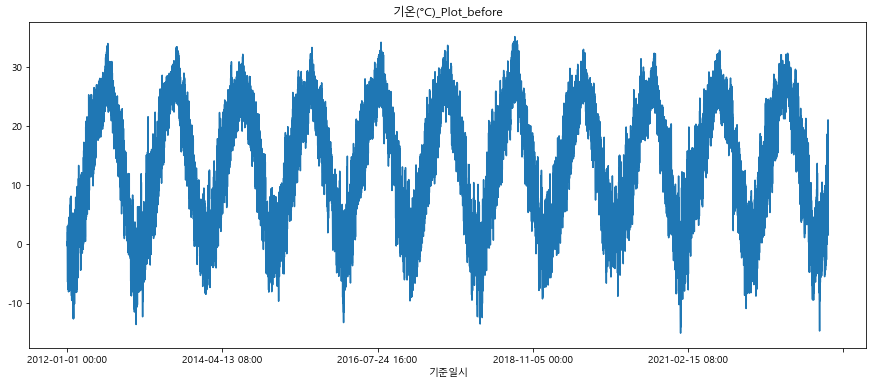

결측치 비율(%) :  0.0



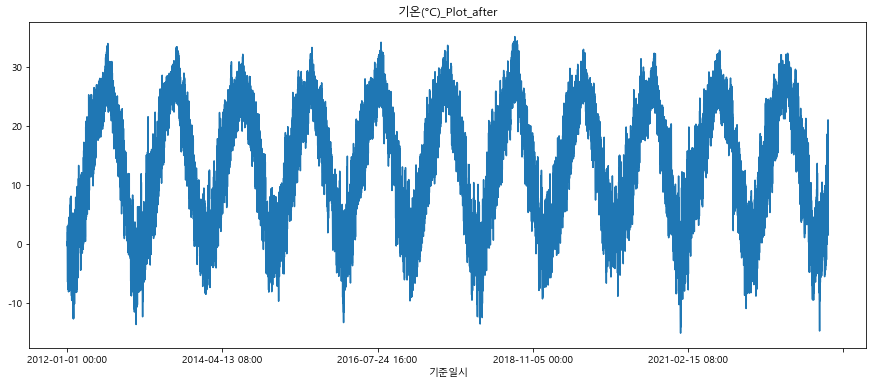

  7%|████▎                                                            | 1/15 [00:00<00:04,  2.80it/s]

결측치 비율(%) :  0.0



강수량(mm)       강수량(mm)
count  42936.000000  98137.000000
mean       0.928127      0.406066
std        1.672670      1.198356
min        0.000000      0.000000
25%        0.055556      0.000000
50%        0.352705      0.000000
75%        1.147276      0.244186
max       74.600000     74.600000

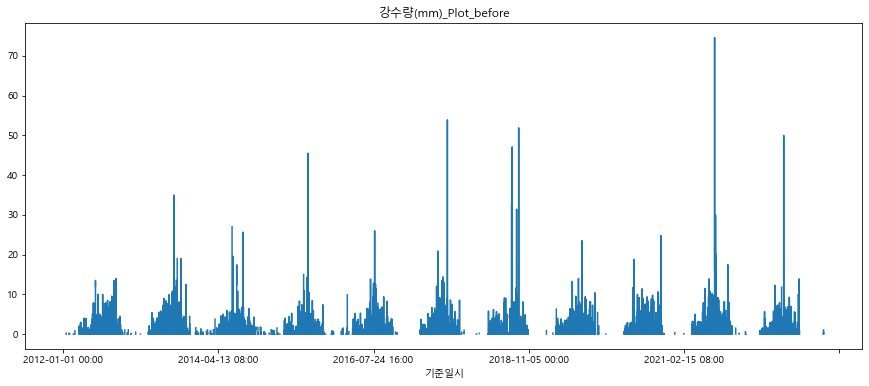

결측치 비율(%) :  56.25



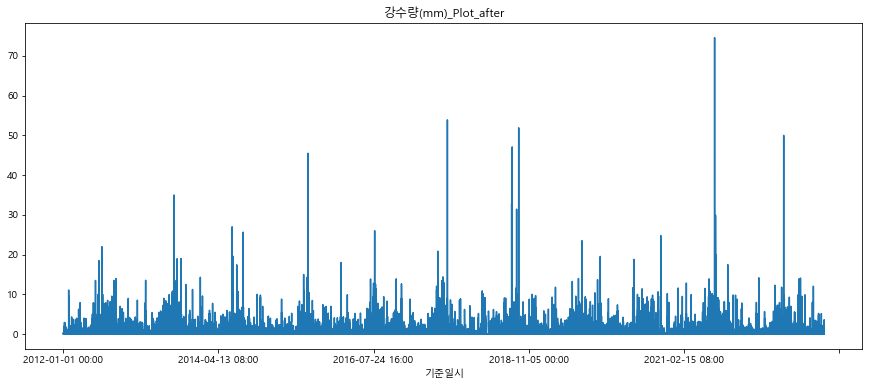

 13%|████████▋                                                        | 2/15 [00:00<00:04,  2.75it/s]

결측치 비율(%) :  0.0



풍속(m/s)       풍속(m/s)
count  98137.000000  98137.000000
mean       2.036400      2.036400
std        0.989062      0.989062
min        0.462766      0.462766
25%        1.254737      1.254737
50%        1.828421      1.828421
75%        2.577660      2.577660
max        9.378261      9.378261

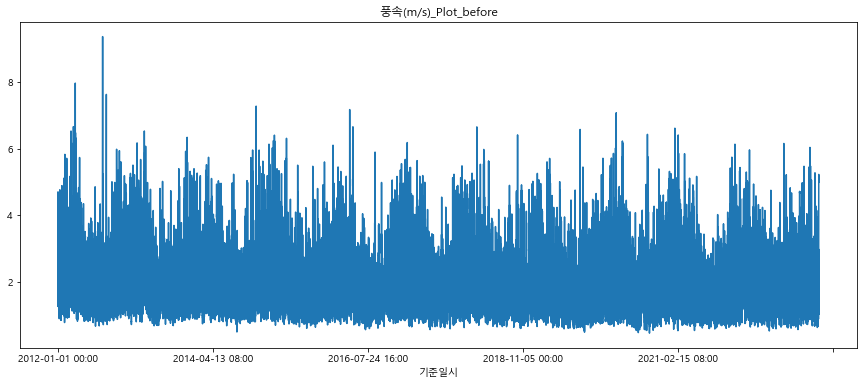

결측치 비율(%) :  0.0



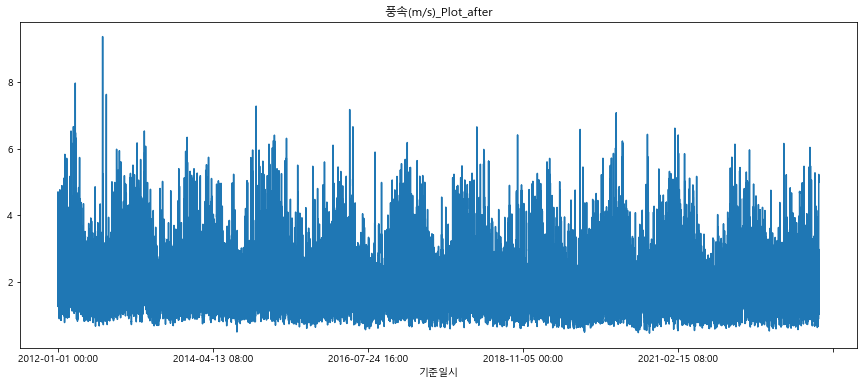

 20%|█████████████                                                    | 3/15 [00:01<00:04,  2.44it/s]

결측치 비율(%) :  0.0



풍향(16방위)      풍향(16방위)
count  98137.000000  98137.000000
mean     175.966462    175.966462
std       52.004118     52.004118
min       54.842105     54.842105
25%      133.723404    133.723404
50%      167.608696    167.608696
75%      214.105263    214.105263
max      306.105263    306.105263

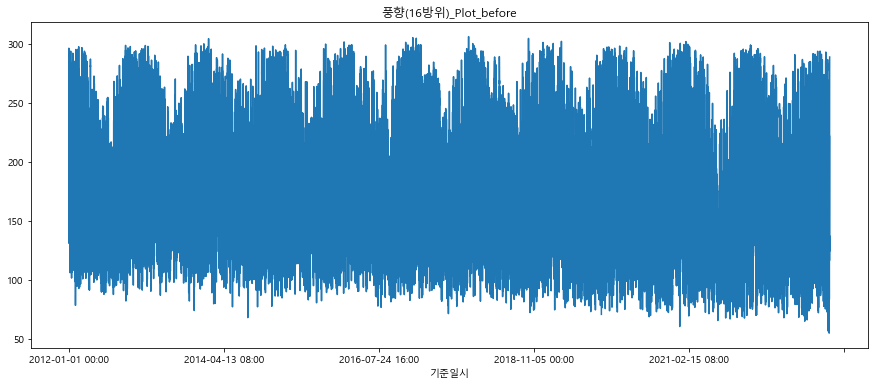

결측치 비율(%) :  0.0



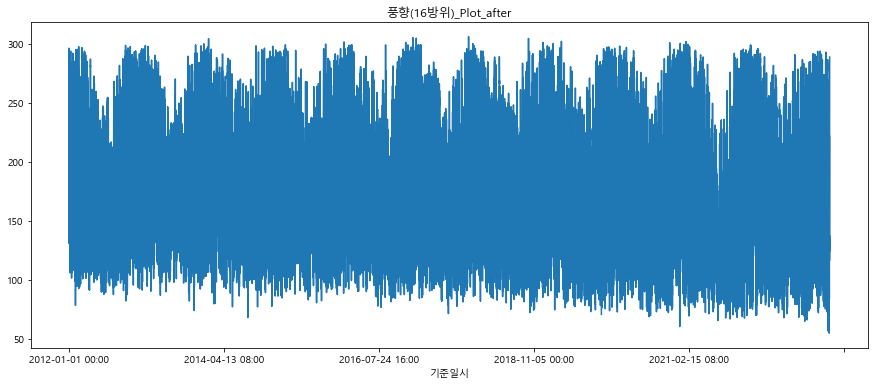

 27%|█████████████████▎                                               | 4/15 [00:01<00:05,  2.08it/s]

결측치 비율(%) :  0.0



습도(%)         습도(%)
count  98136.000000  98136.000000
mean      68.705023     68.705023
std       17.612178     17.612178
min       17.365591     17.365591
25%       56.200000     56.200000
50%       70.865645     70.865645
75%       83.694737     83.694737
max       97.968421     97.968421

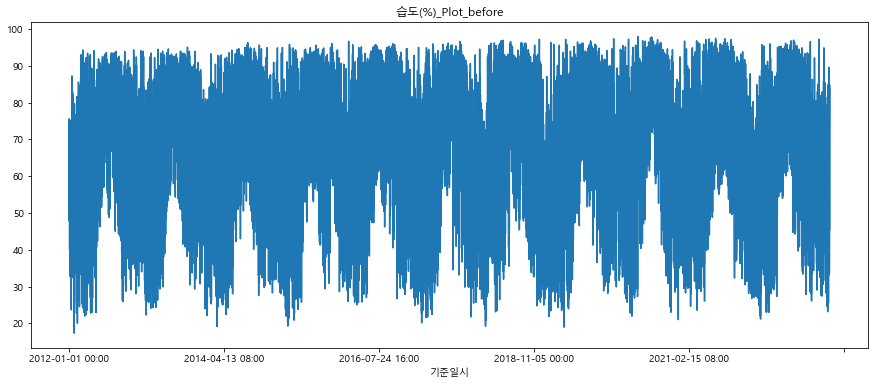

결측치 비율(%) :  0.0



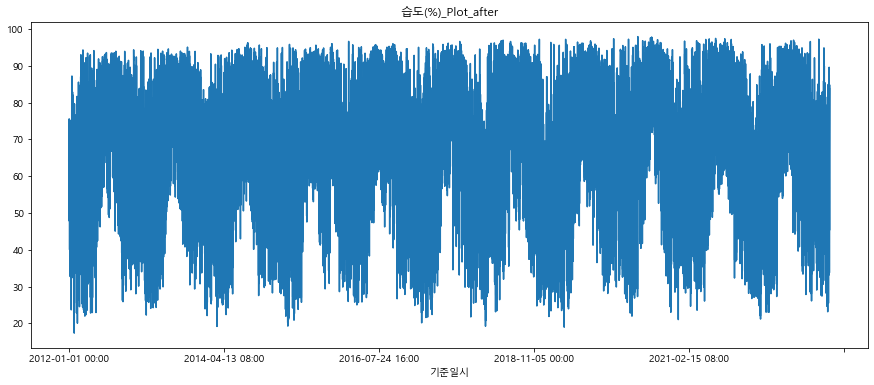

 33%|█████████████████████▋                                           | 5/15 [00:02<00:04,  2.01it/s]

결측치 비율(%) :  0.0



증기압(hPa)      증기압(hPa)
count  98136.000000  98136.000000
mean      12.470213     12.470213
std        8.363478      8.363478
min        1.055789      1.055789
25%        5.195789      5.195789
50%       10.100000     10.100000
75%       18.999211     18.999211
max       32.728421     32.728421

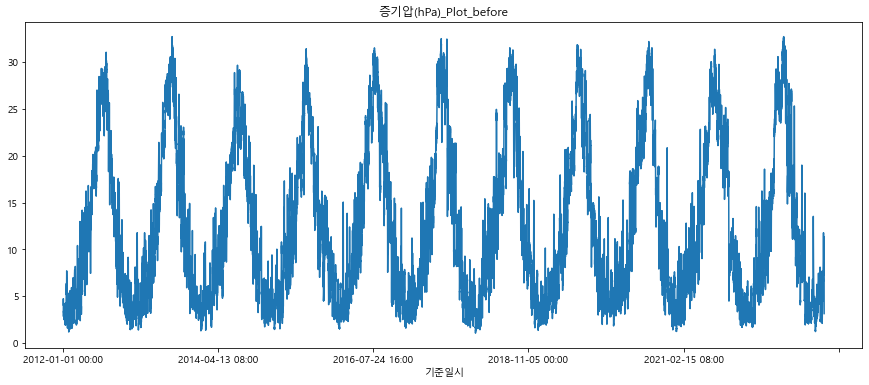

결측치 비율(%) :  0.0



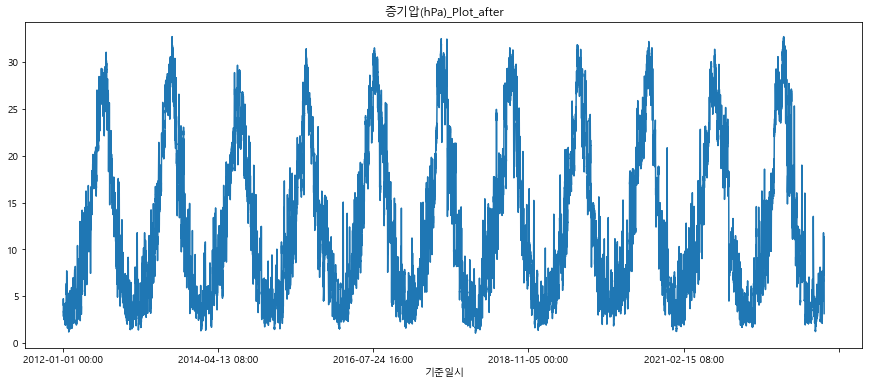

 40%|██████████████████████████                                       | 6/15 [00:02<00:04,  2.14it/s]

결측치 비율(%) :  0.0



이슬점온도(°C)     이슬점온도(°C)
count  98136.000000  98136.000000
mean       6.537621      6.537621
std       11.264279     11.264279
min      -24.132632    -24.132632
25%       -2.627368     -2.627368
50%        6.837095      6.837095
75%       16.568817     16.568817
max       25.510526     25.510526

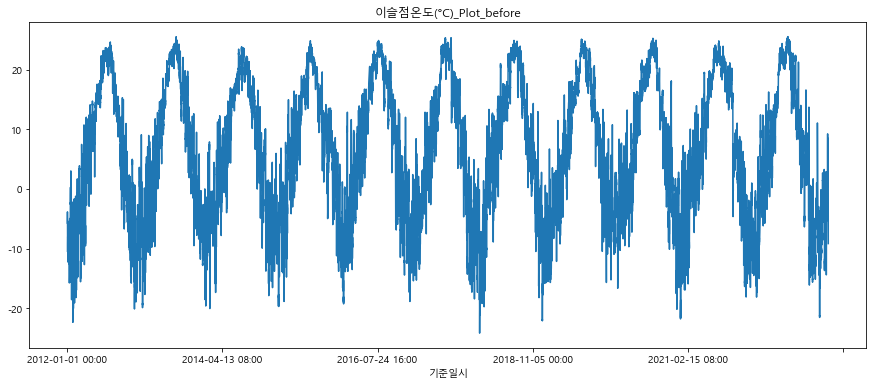

결측치 비율(%) :  0.0



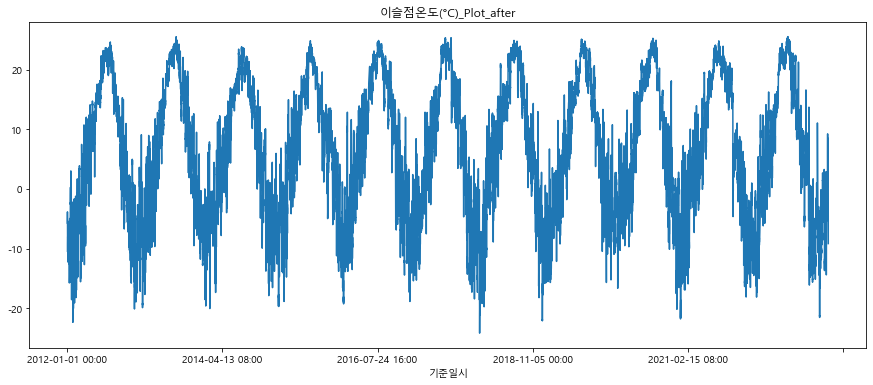

 47%|██████████████████████████████▎                                  | 7/15 [00:03<00:03,  2.33it/s]

결측치 비율(%) :  0.0



현지기압(hPa)     현지기압(hPa)
count  98100.000000  98100.000000
mean    1003.835490   1003.835490
std        7.672712      7.672712
min      970.706316    970.706316
25%      997.838888    997.838888
50%     1004.081053   1004.081053
75%     1009.750529   1009.750529
max     1025.016842   1025.016842

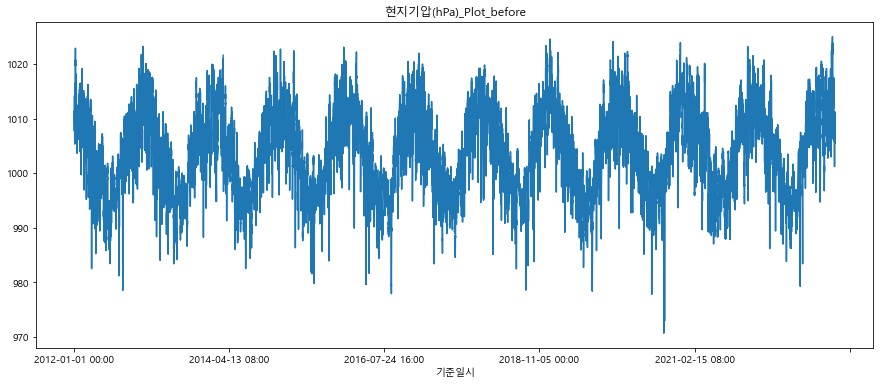

결측치 비율(%) :  0.04



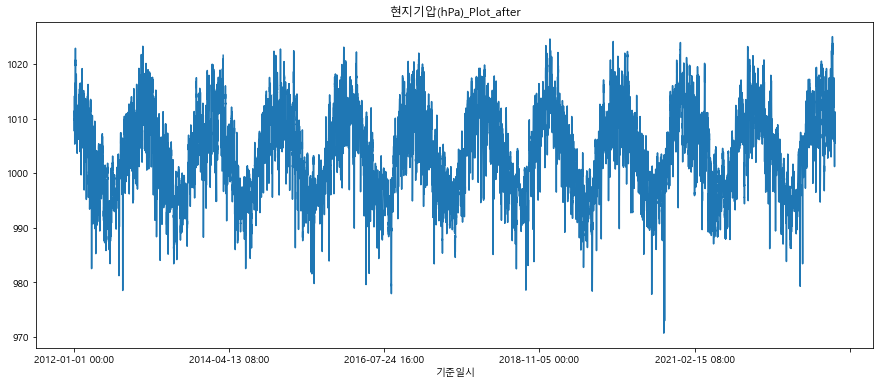

 53%|██████████████████████████████████▋                              | 8/15 [00:03<00:02,  2.42it/s]

결측치 비율(%) :  0.04



해면기압(hPa)     해면기압(hPa)
count  98136.000000  98136.000000
mean    1016.468815   1016.468815
std        8.139511      8.139511
min      982.045263    982.045263
25%     1010.027368   1010.027368
50%     1016.716932   1016.716932
75%     1022.789712   1022.789712
max     1038.693684   1038.693684

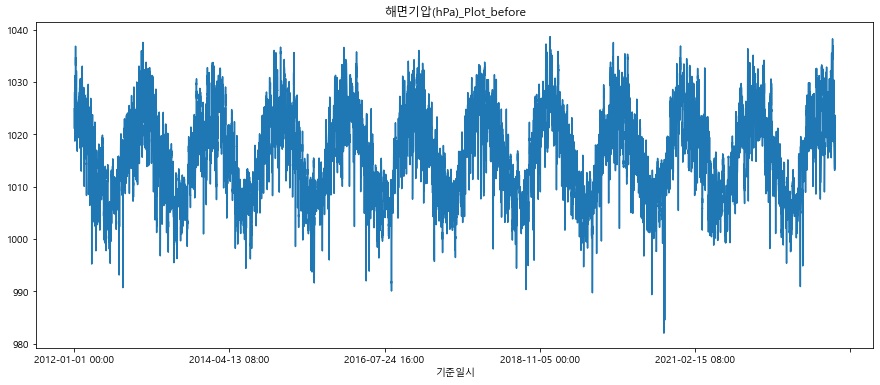

결측치 비율(%) :  0.0



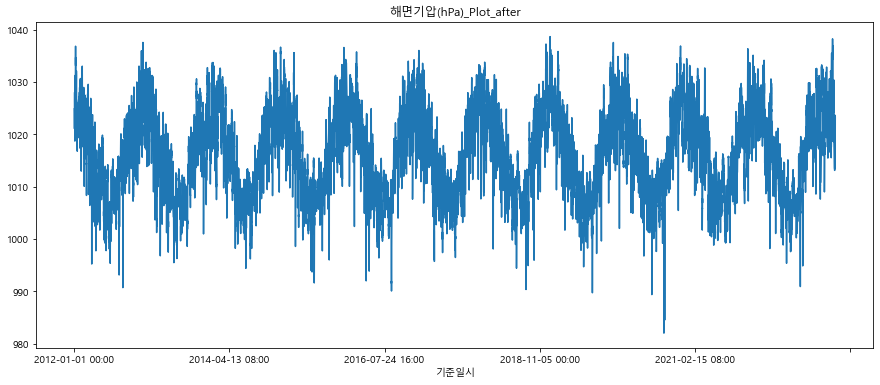

 60%|███████████████████████████████████████                          | 9/15 [00:03<00:02,  2.48it/s]

결측치 비율(%) :  0.0



적설(cm)       적설(cm)
count  22488.000000  98137.00000
mean       7.704547      1.76549
std        8.863089      5.33718
min        0.000000      0.00000
25%        2.644861      0.00000
50%        5.065017      0.00000
75%        9.166667      0.00000
max       88.100000     88.10000

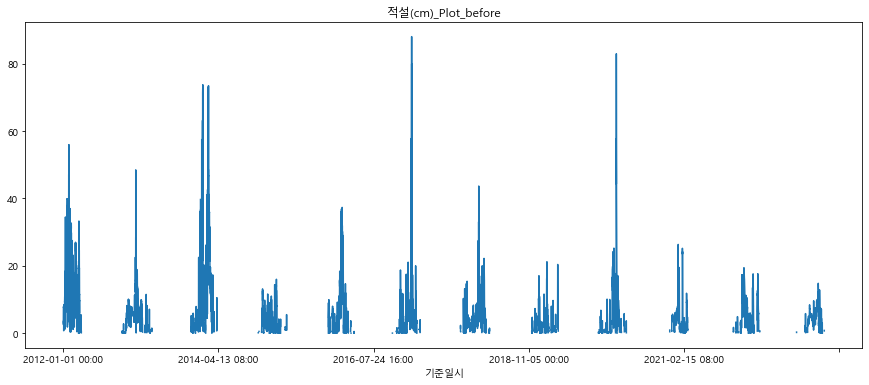

결측치 비율(%) :  77.09



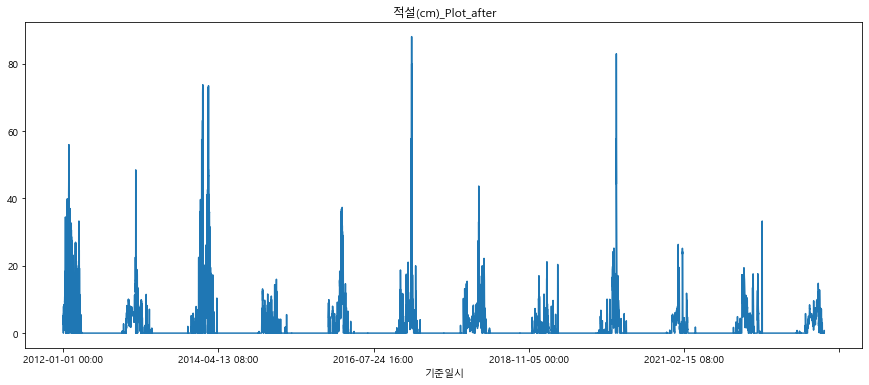

 67%|██████████████████████████████████████████▋                     | 10/15 [00:04<00:01,  2.58it/s]

결측치 비율(%) :  0.0



지면온도(°C)      지면온도(°C)
count  98136.000000  98136.000000
mean      15.040603     15.040603
std       12.118407     12.118407
min       -9.335106     -9.335106
25%        4.391557      4.391557
50%       14.791534     14.791534
75%       24.070731     24.070731
max       58.633684     58.633684

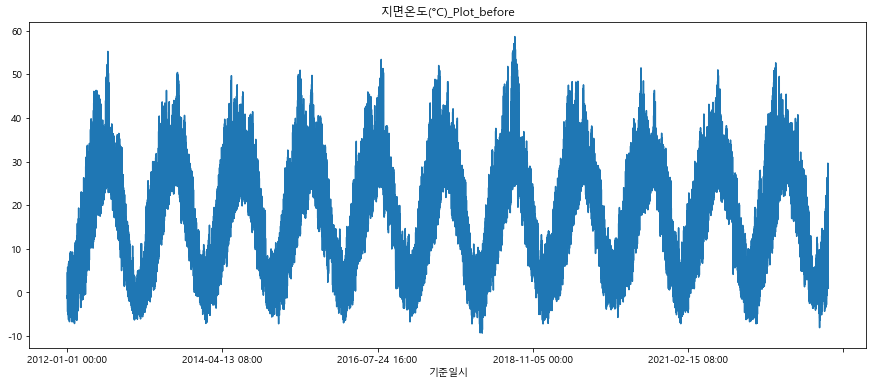

결측치 비율(%) :  0.0



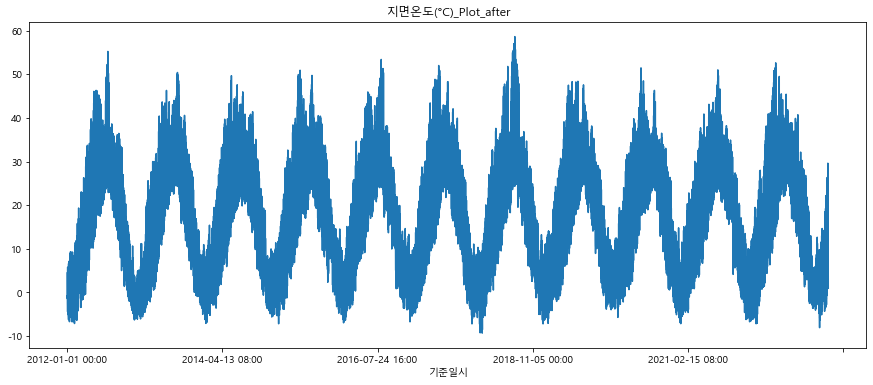

 73%|██████████████████████████████████████████████▉                 | 11/15 [00:04<00:01,  2.26it/s]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count  98137.000000  98137.000000
mean      15.047269     15.047269
std        9.920525      9.920525
min       -3.807143     -3.807143
25%        5.500000      5.500000
50%       15.434375     15.434375
75%       23.760714     23.760714
max       39.817857     39.817857

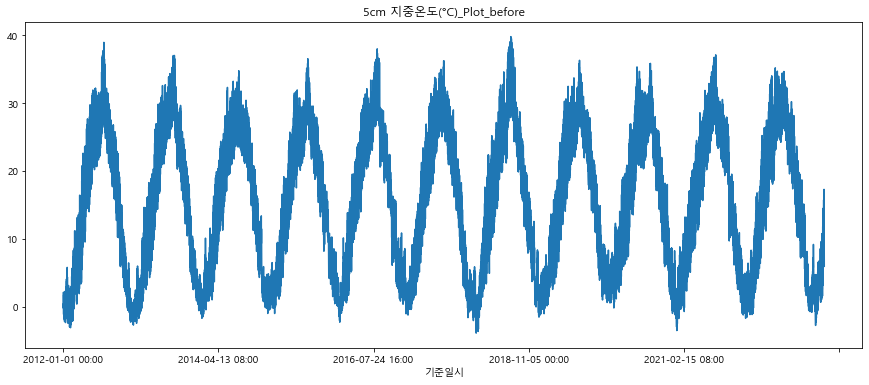

결측치 비율(%) :  0.0



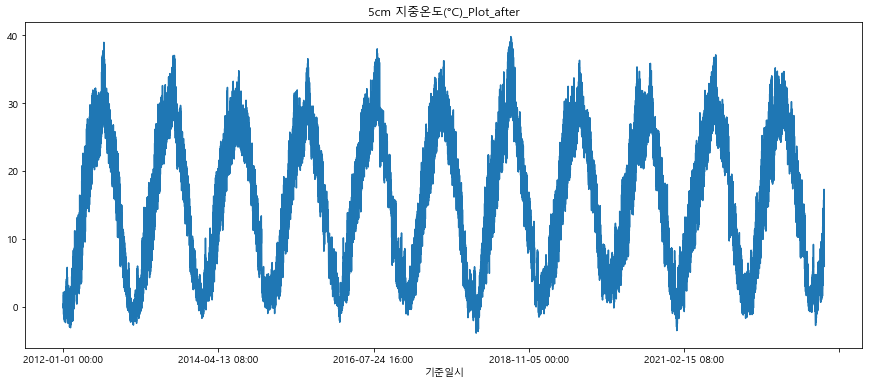

 80%|███████████████████████████████████████████████████▏            | 12/15 [00:05<00:01,  2.34it/s]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.023566      15.023566
std         9.584733       9.584733
min        -2.381481      -2.381481
25%         5.711111       5.711111
50%        15.437037      15.437037
75%        23.662500      23.662500
max        36.889286      36.889286

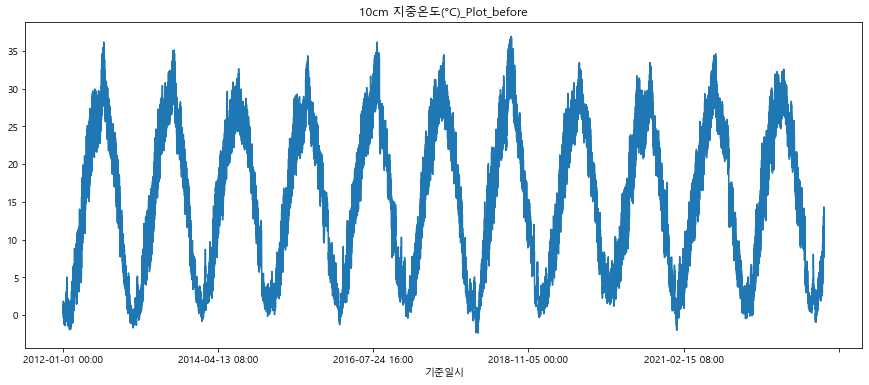

결측치 비율(%) :  0.0



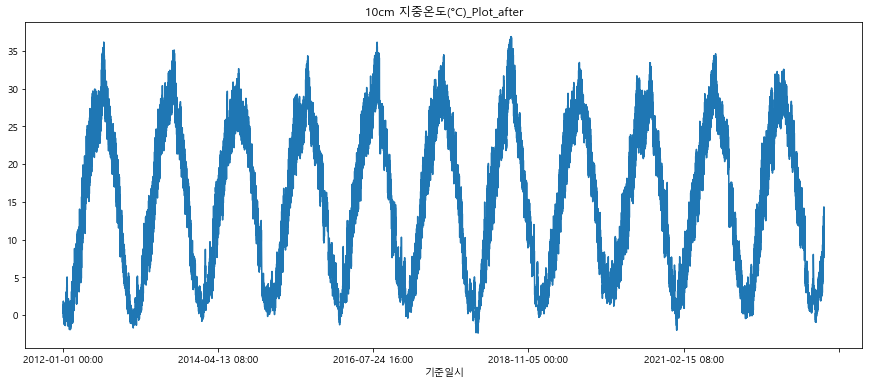

 87%|███████████████████████████████████████████████████████▍        | 13/15 [00:05<00:00,  2.37it/s]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.168991      15.168991
std         9.136890       9.136890
min        -0.811111      -0.811111
25%         6.214286       6.214286
50%        15.538462      15.538462
75%        23.632143      23.632143
max        34.110714      34.110714

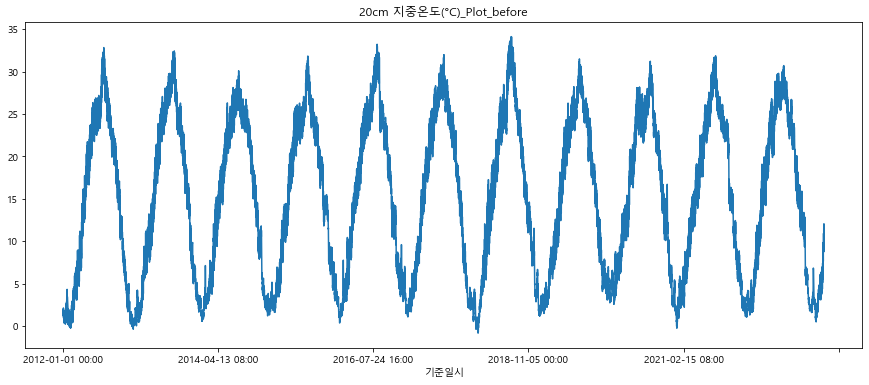

결측치 비율(%) :  0.0



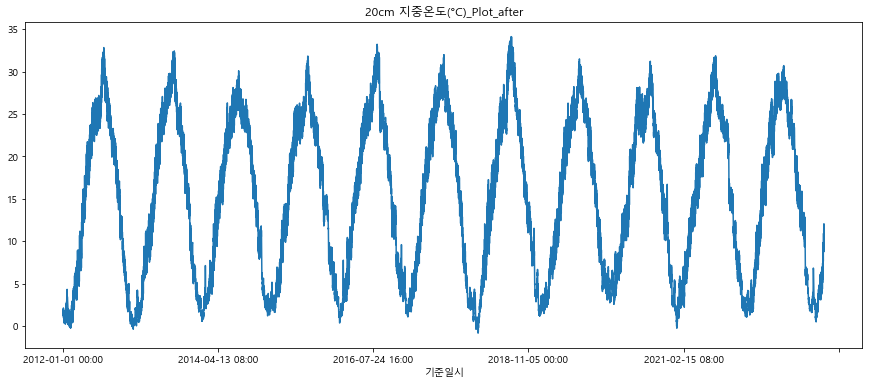

 93%|███████████████████████████████████████████████████████████▋    | 14/15 [00:05<00:00,  2.39it/s]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.226097      15.226097
std         8.775796       8.775796
min         0.272000       0.272000
25%         6.571429       6.571429
50%        15.653571      15.653571
75%        23.453125      23.453125
max        32.275000      32.275000

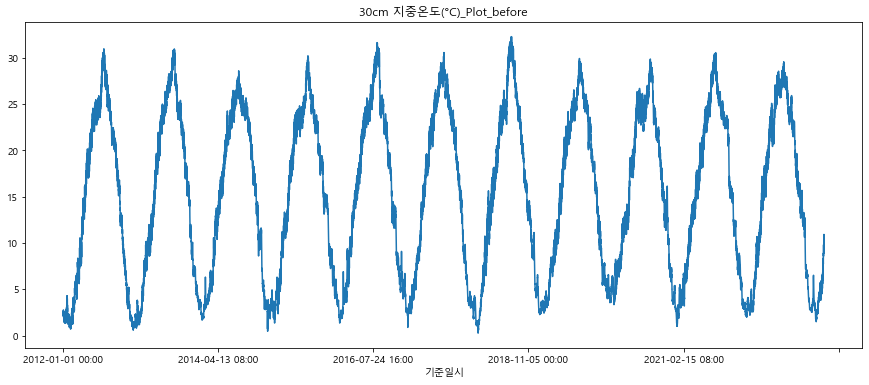

결측치 비율(%) :  0.0



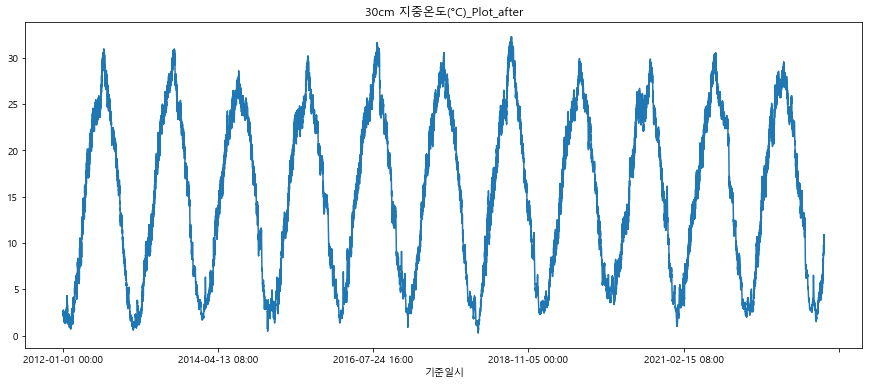

100%|████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.37it/s]

결측치 비율(%) :  0.0



In [10]:
# 이전 값, Nan 값이 포함된 데이터의 평균으로 결측치를 처리한 결과 확인

time_fill = time.copy()

time_fill['기온(°C)'].fillna(method='ffill', inplace=True)
time_fill['강수량(mm)'].fillna(0, inplace=True)
time_fill['풍속(m/s)'].fillna(time.groupby(time.index)['풍속(m/s)'].transform('mean'), inplace=True)
time_fill['풍향(16방위)'].fillna(0, inplace=True)
time_fill['습도(%)'].fillna(time.groupby(time.index)['습도(%)'].transform('mean'), inplace=True)
time_fill['증기압(hPa)'].fillna(time.groupby(time.index)['증기압(hPa)'].transform('mean'), inplace=True)
time_fill['이슬점온도(°C)'].fillna(time.groupby(time.index)['이슬점온도(°C)'].transform('mean'), inplace=True)
time_fill['현지기압(hPa)'].fillna(time.groupby(time.index)['현지기압(hPa)'].transform('mean'), inplace=True)
time_fill['해면기압(hPa)'].fillna(time.groupby(time.index)['해면기압(hPa)'].transform('mean'), inplace=True)
time_fill['적설(cm)'].fillna(0, inplace=True)
time_fill['지면온도(°C)'].fillna(time.groupby(time.index)['지면온도(°C)'].transform('mean'), inplace=True)
time_fill['5cm 지중온도(°C)'].fillna(time.groupby(time.index)['5cm 지중온도(°C)'].transform('mean'), inplace=True)
time_fill['10cm 지중온도(°C)'].fillna(time.groupby(time.index)['10cm 지중온도(°C)'].transform('mean'), inplace=True)
time_fill['20cm 지중온도(°C)'].fillna(time.groupby(time.index)['20cm 지중온도(°C)'].transform('mean'), inplace=True)
time_fill['30cm 지중온도(°C)'].fillna(time.groupby(time.index)['30cm 지중온도(°C)'].transform('mean'), inplace=True)

compare_describe(time, time_fill)

### 선형 보간

  0%|                                                                         | 0/15 [00:00<?, ?it/s]

기온(°C)        기온(°C)
count  98136.000000  98137.000000
mean      12.983530     12.983367
std        9.997446      9.997526
min      -15.128421    -15.128421
25%        4.586095      4.585870
50%       13.651579     13.651579
75%       21.583202     21.583158
max       35.211579     35.211579

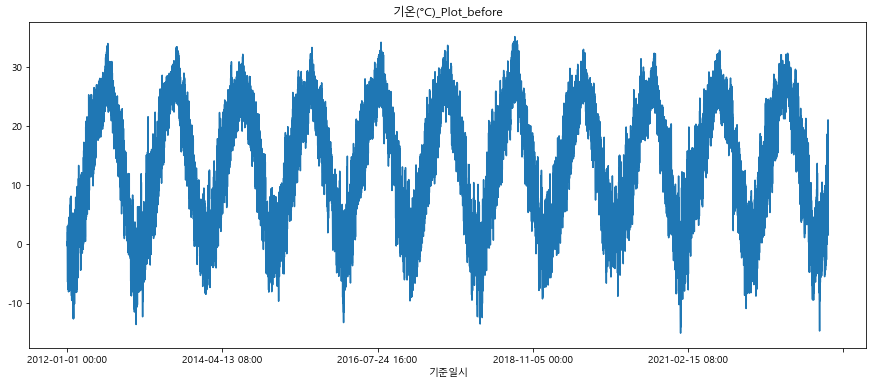

결측치 비율(%) :  0.0



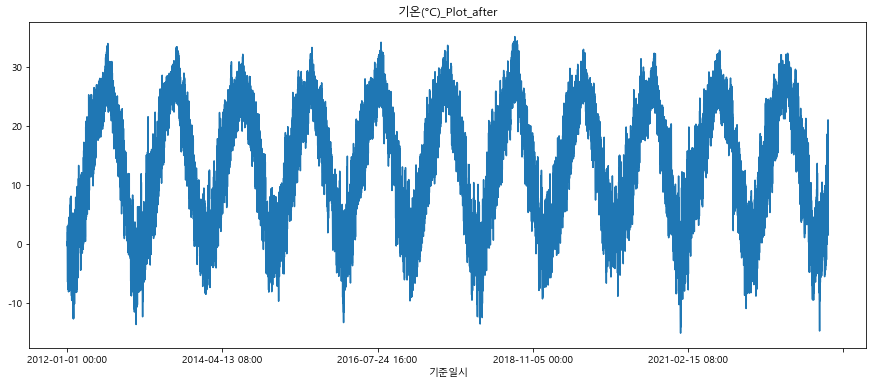

  7%|████▎                                                            | 1/15 [00:00<00:05,  2.61it/s]

결측치 비율(%) :  0.0



강수량(mm)       강수량(mm)
count  42936.000000  98134.000000
mean       0.928127      0.597381
std        1.672670      1.351874
min        0.000000      0.000000
25%        0.055556      0.000000
50%        0.352705      0.125000
75%        1.147276      0.590888
max       74.600000     74.600000

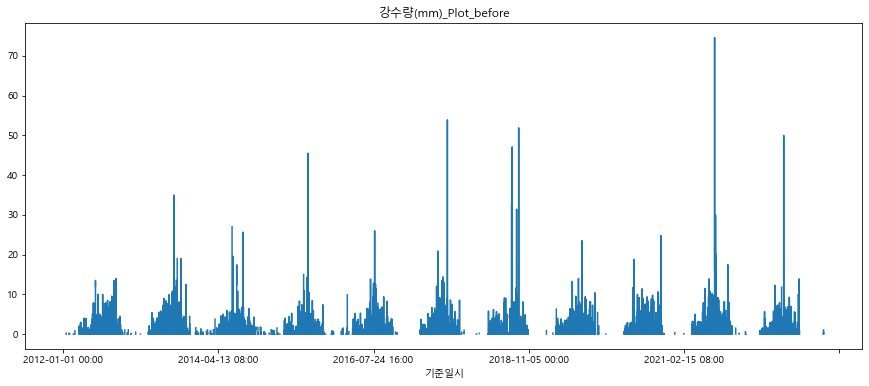

결측치 비율(%) :  56.25



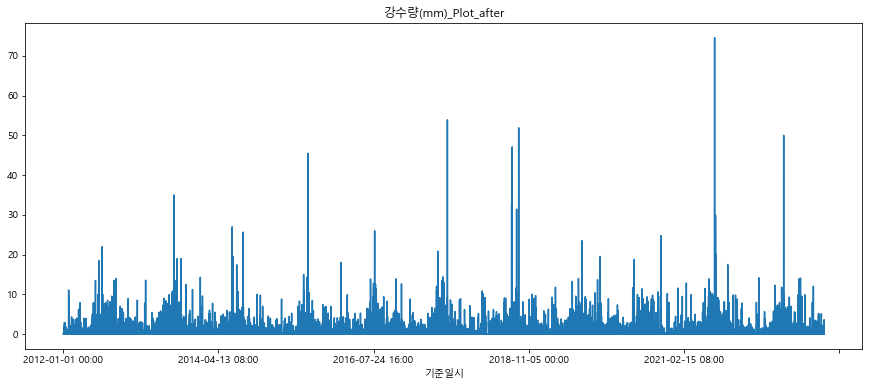

 13%|████████▋                                                        | 2/15 [00:00<00:04,  2.61it/s]

결측치 비율(%) :  0.0



풍속(m/s)       풍속(m/s)
count  98137.000000  98137.000000
mean       2.036400      2.036400
std        0.989062      0.989062
min        0.462766      0.462766
25%        1.254737      1.254737
50%        1.828421      1.828421
75%        2.577660      2.577660
max        9.378261      9.378261

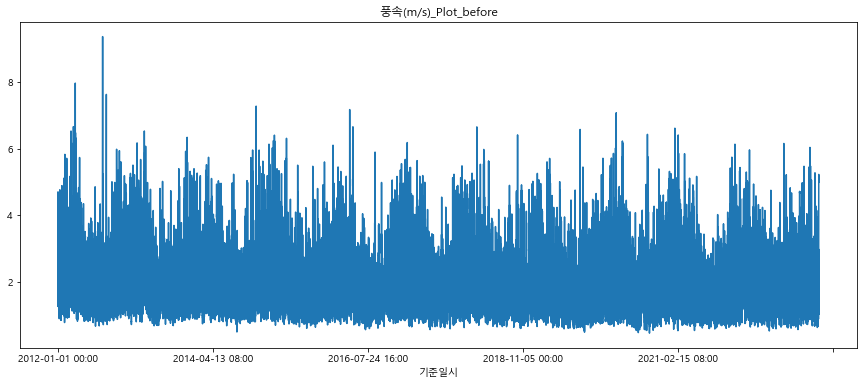

결측치 비율(%) :  0.0



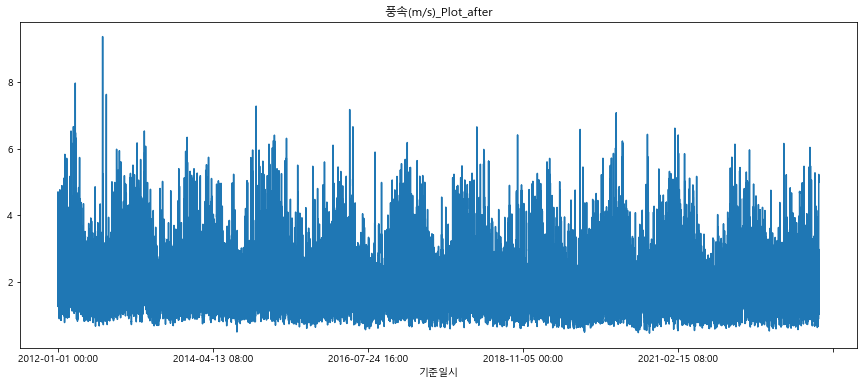

 20%|█████████████                                                    | 3/15 [00:01<00:05,  2.38it/s]

결측치 비율(%) :  0.0



풍향(16방위)      풍향(16방위)
count  98137.000000  98137.000000
mean     175.966462    175.966462
std       52.004118     52.004118
min       54.842105     54.842105
25%      133.723404    133.723404
50%      167.608696    167.608696
75%      214.105263    214.105263
max      306.105263    306.105263

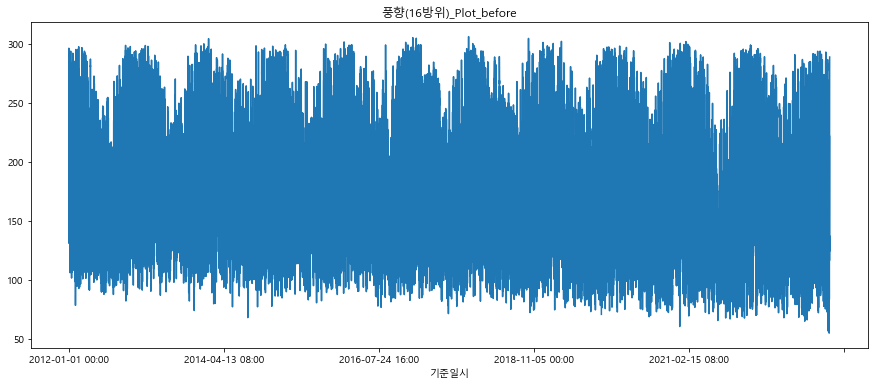

결측치 비율(%) :  0.0



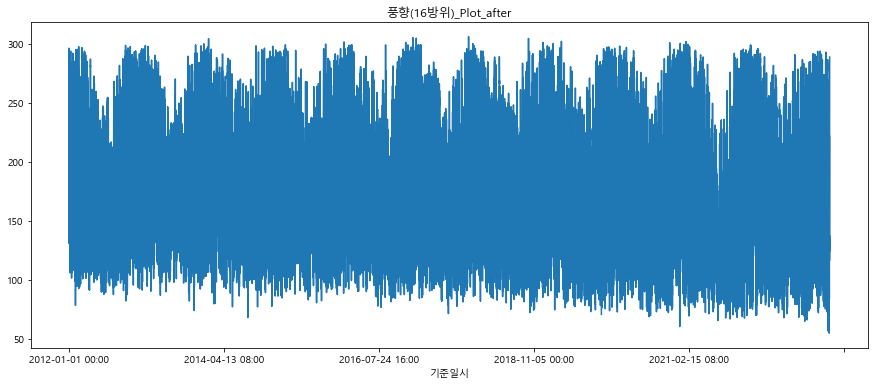

 27%|█████████████████▎                                               | 4/15 [00:01<00:04,  2.21it/s]

결측치 비율(%) :  0.0



습도(%)         습도(%)
count  98136.000000  98137.000000
mean      68.705023     68.704858
std       17.612178     17.612165
min       17.365591     17.365591
25%       56.200000     56.200000
50%       70.865645     70.863158
75%       83.694737     83.694737
max       97.968421     97.968421

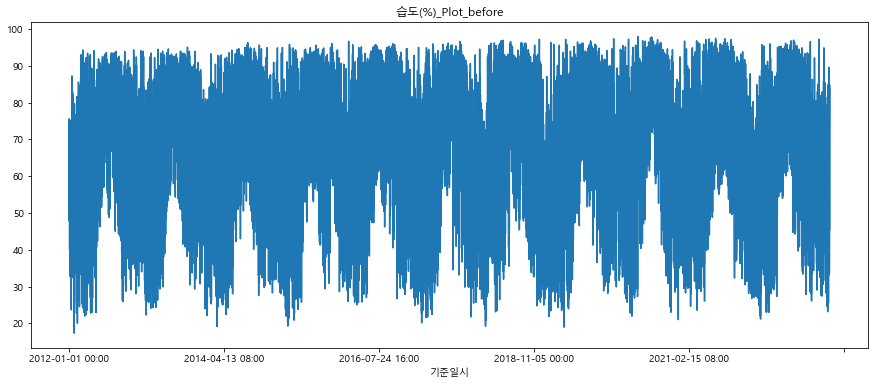

결측치 비율(%) :  0.0



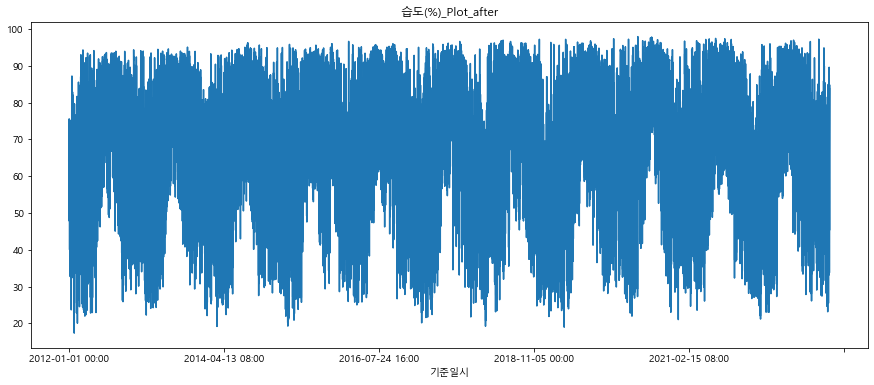

 33%|█████████████████████▋                                           | 5/15 [00:02<00:04,  2.06it/s]

결측치 비율(%) :  0.0



증기압(hPa)      증기압(hPa)
count  98136.000000  98137.000000
mean      12.470213     12.470114
std        8.363478      8.363493
min        1.055789      1.055789
25%        5.195789      5.195789
50%       10.100000     10.100000
75%       18.999211     18.998947
max       32.728421     32.728421

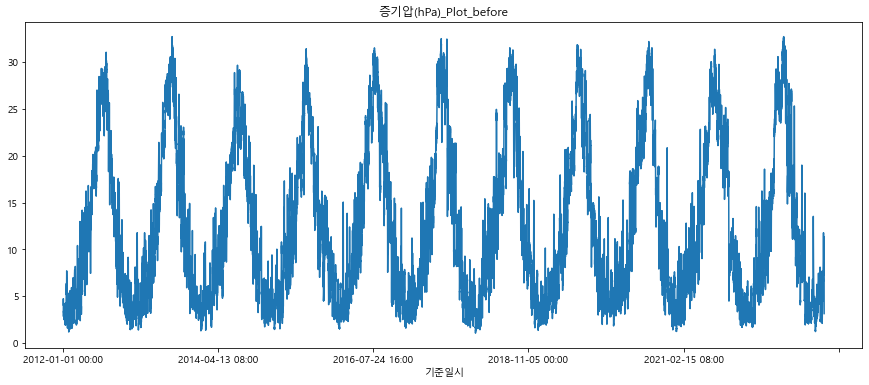

결측치 비율(%) :  0.0



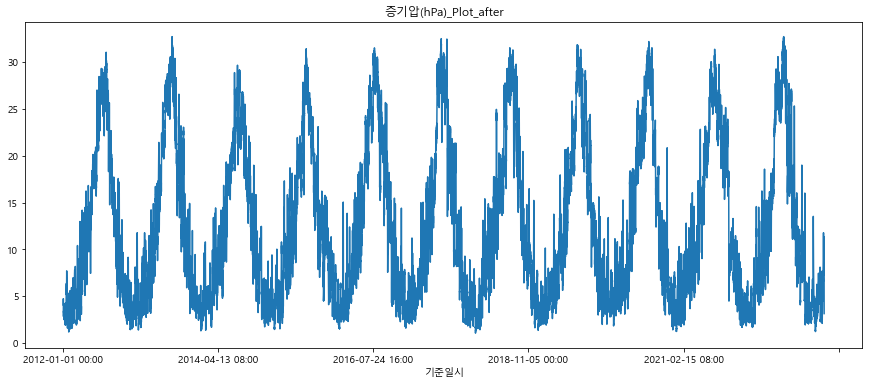

 40%|██████████████████████████                                       | 6/15 [00:02<00:04,  2.25it/s]

결측치 비율(%) :  0.0



이슬점온도(°C)     이슬점온도(°C)
count  98136.000000  98137.000000
mean       6.537621      6.537433
std       11.264279     11.264376
min      -24.132632    -24.132632
25%       -2.627368     -2.627368
50%        6.837095      6.836957
75%       16.568817     16.568817
max       25.510526     25.510526

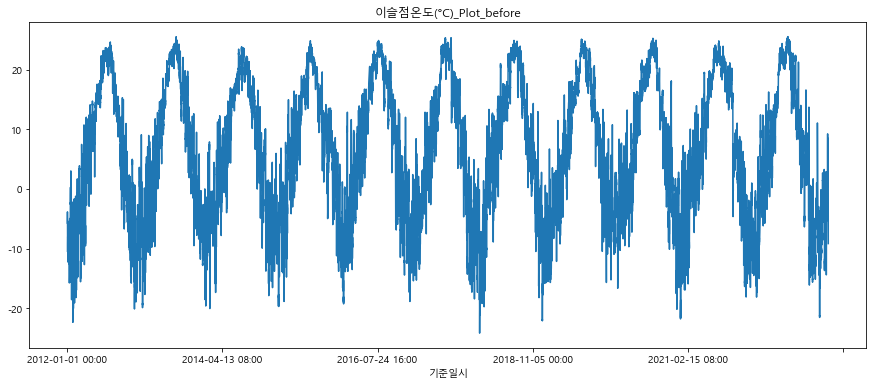

결측치 비율(%) :  0.0



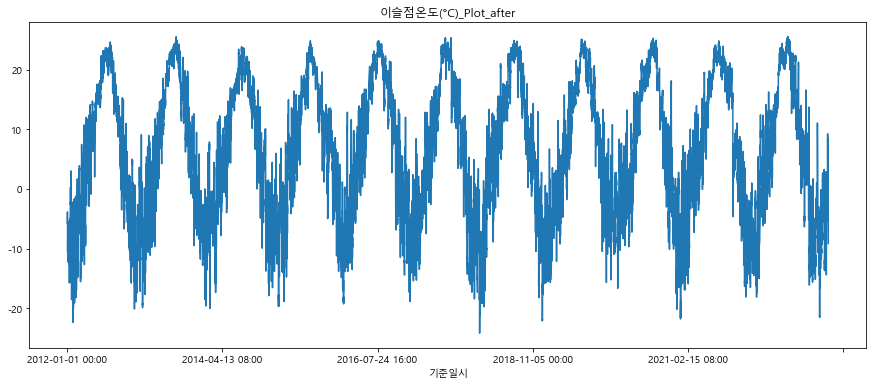

 47%|██████████████████████████████▎                                  | 7/15 [00:02<00:03,  2.40it/s]

결측치 비율(%) :  0.0



현지기압(hPa)     현지기압(hPa)
count  98100.000000  98137.000000
mean    1003.835490   1003.839868
std        7.672712      7.675131
min      970.706316    970.706316
25%      997.838888    997.842105
50%     1004.081053   1004.085263
75%     1009.750529   1009.755789
max     1025.016842   1025.016842

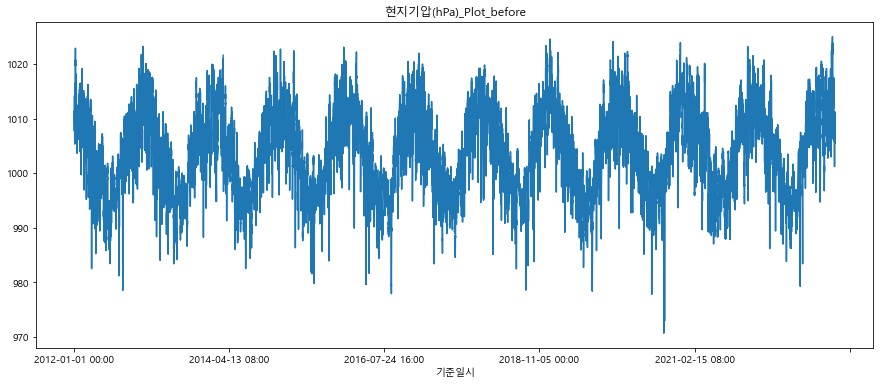

결측치 비율(%) :  0.04



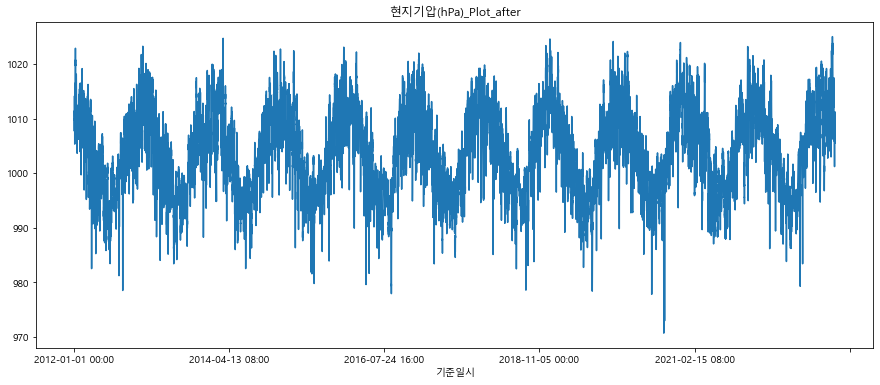

 53%|██████████████████████████████████▋                              | 8/15 [00:03<00:02,  2.56it/s]

결측치 비율(%) :  0.0



해면기압(hPa)     해면기압(hPa)
count  98136.000000  98137.000000
mean    1016.468815   1016.468858
std        8.139511      8.139481
min      982.045263    982.045263
25%     1010.027368   1010.027368
50%     1016.716932   1016.717021
75%     1022.789712   1022.789474
max     1038.693684   1038.693684

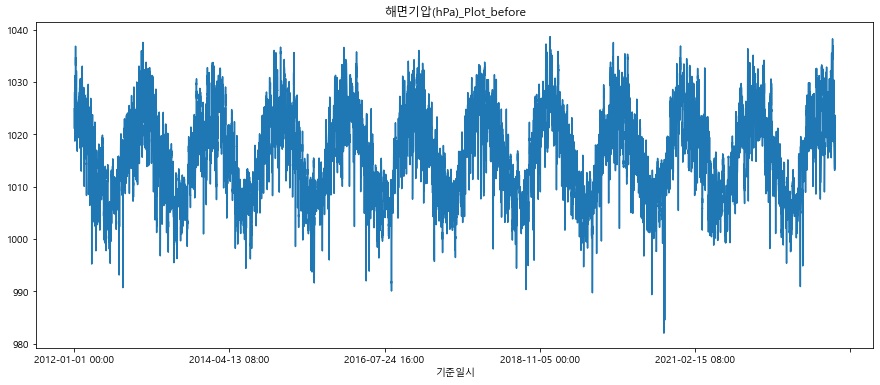

결측치 비율(%) :  0.0



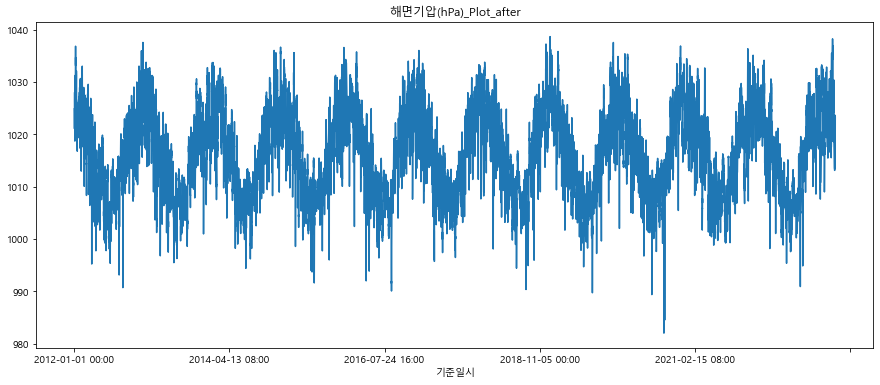

 60%|███████████████████████████████████████                          | 9/15 [00:03<00:02,  2.58it/s]

결측치 비율(%) :  0.0



적설(cm)        적설(cm)
count  22488.000000  98137.000000
mean       7.704547      3.076288
std        8.863089      6.492635
min        0.000000      0.000000
25%        2.644861      0.290872
50%        5.065017      0.741777
75%        9.166667      1.882747
max       88.100000     88.100000

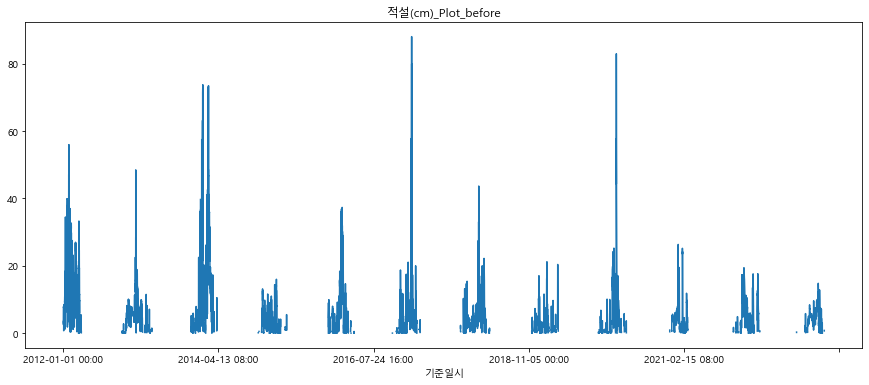

결측치 비율(%) :  77.09



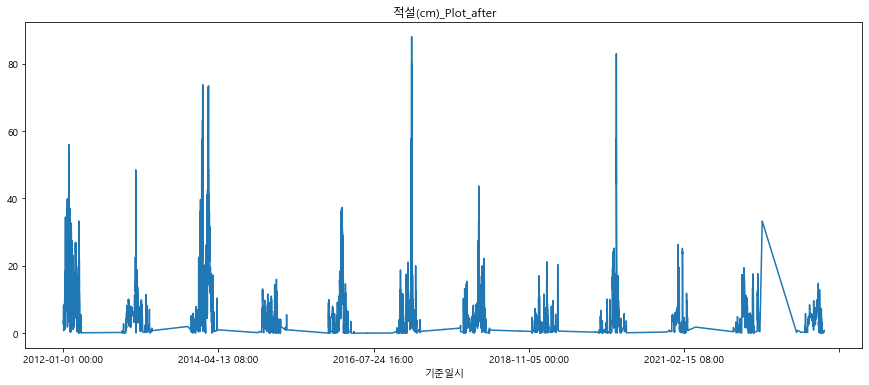

 67%|██████████████████████████████████████████▋                     | 10/15 [00:04<00:01,  2.54it/s]

결측치 비율(%) :  0.0



지면온도(°C)      지면온도(°C)
count  98136.000000  98137.000000
mean      15.040603     15.040428
std       12.118407     12.118470
min       -9.335106     -9.335106
25%        4.391557      4.391489
50%       14.791534     14.791489
75%       24.070731     24.070652
max       58.633684     58.633684

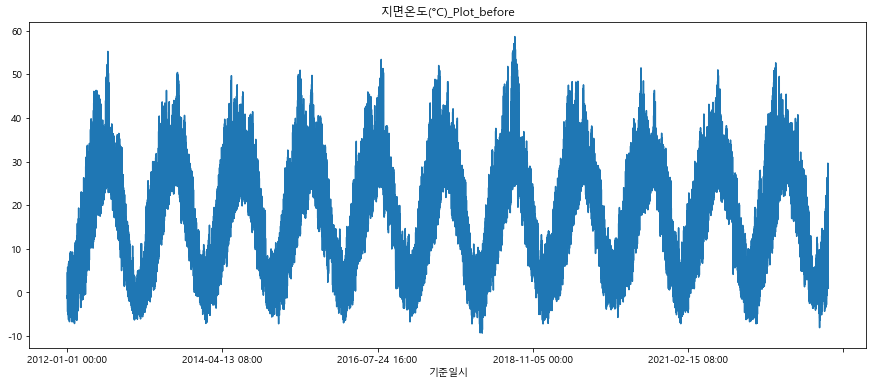

결측치 비율(%) :  0.0



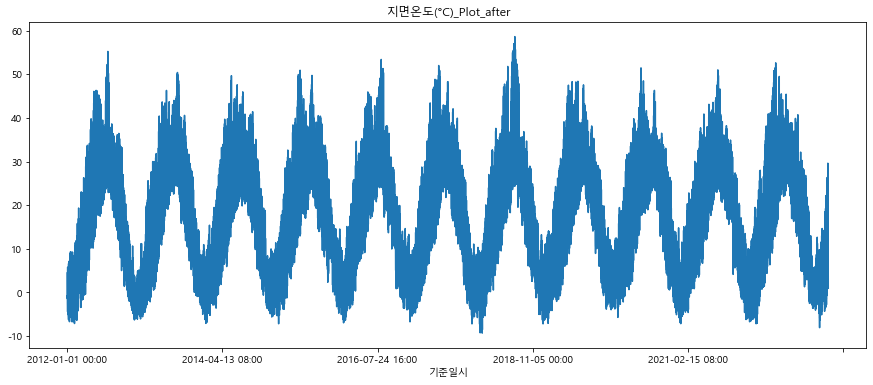

 73%|██████████████████████████████████████████████▉                 | 11/15 [00:04<00:01,  2.48it/s]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count  98137.000000  98137.000000
mean      15.047269     15.047269
std        9.920525      9.920525
min       -3.807143     -3.807143
25%        5.500000      5.500000
50%       15.434375     15.434375
75%       23.760714     23.760714
max       39.817857     39.817857

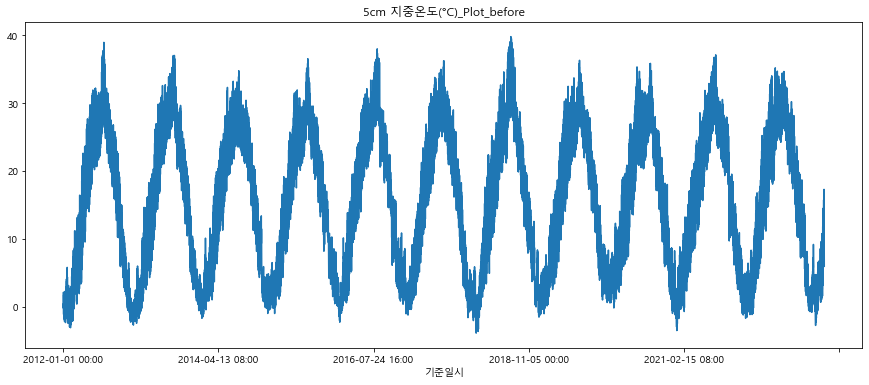

결측치 비율(%) :  0.0



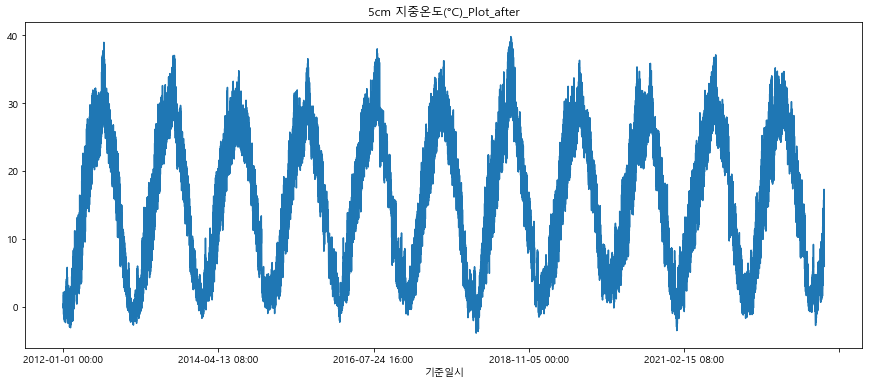

 80%|███████████████████████████████████████████████████▏            | 12/15 [00:04<00:01,  2.50it/s]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.023566      15.023566
std         9.584733       9.584733
min        -2.381481      -2.381481
25%         5.711111       5.711111
50%        15.437037      15.437037
75%        23.662500      23.662500
max        36.889286      36.889286

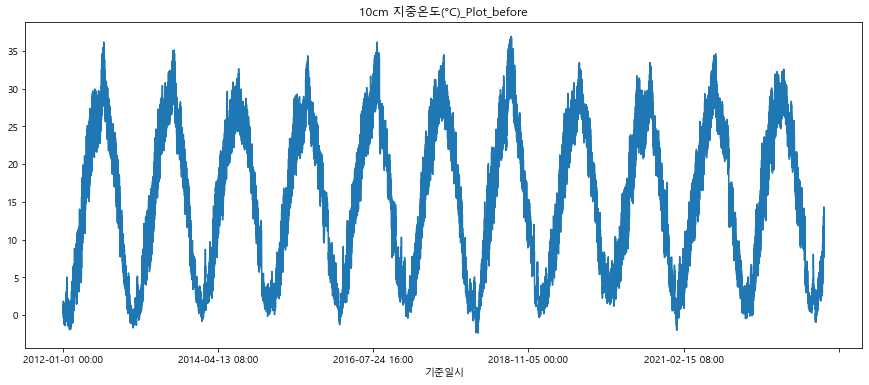

결측치 비율(%) :  0.0



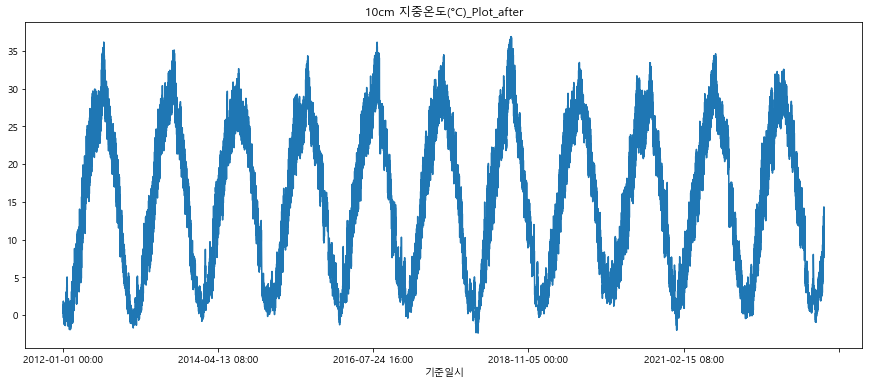

 87%|███████████████████████████████████████████████████████▍        | 13/15 [00:05<00:00,  2.54it/s]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.168991      15.168991
std         9.136890       9.136890
min        -0.811111      -0.811111
25%         6.214286       6.214286
50%        15.538462      15.538462
75%        23.632143      23.632143
max        34.110714      34.110714

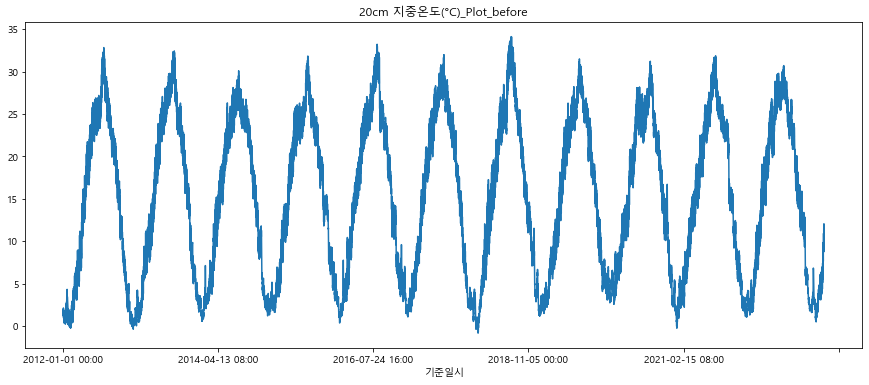

결측치 비율(%) :  0.0



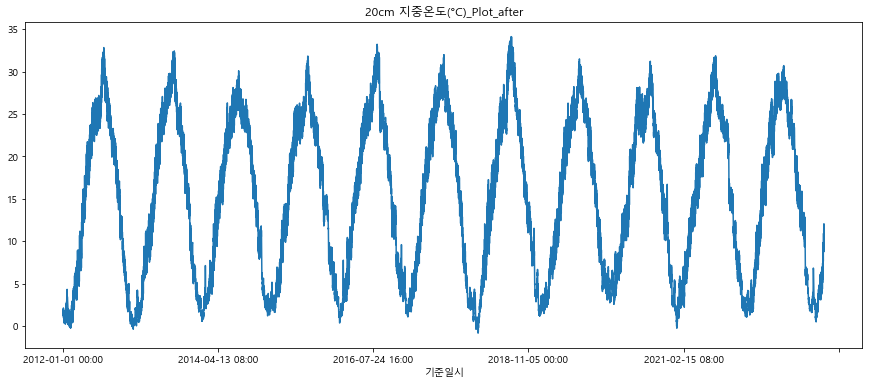

 93%|███████████████████████████████████████████████████████████▋    | 14/15 [00:05<00:00,  2.54it/s]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.226097      15.226097
std         8.775796       8.775796
min         0.272000       0.272000
25%         6.571429       6.571429
50%        15.653571      15.653571
75%        23.453125      23.453125
max        32.275000      32.275000

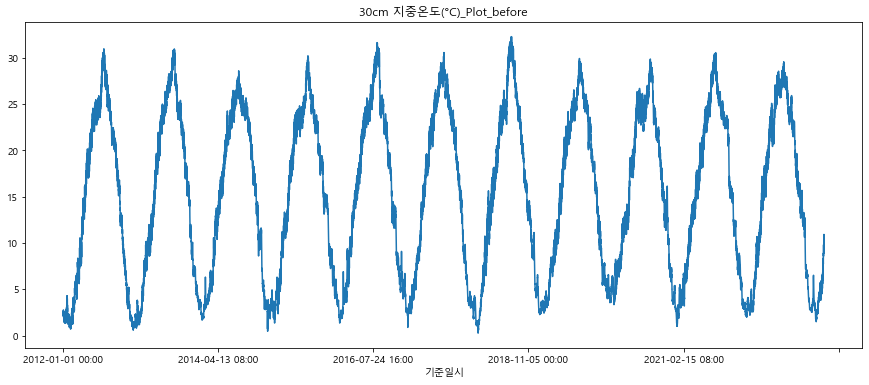

결측치 비율(%) :  0.0



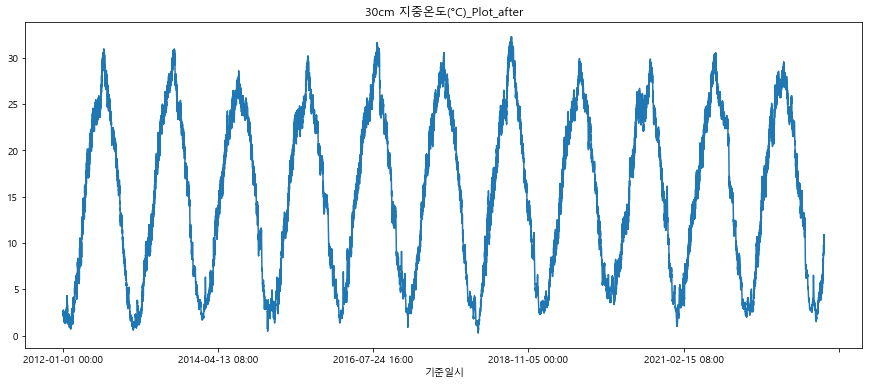

100%|████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.47it/s]

결측치 비율(%) :  0.0



In [11]:
# 선형 보간을 활용해 결측치를 처리한 결과 확인

time_linear_interpolate = time.copy()

time_linear_interpolate = time_linear_interpolate.interpolate()

compare_describe(time, time_linear_interpolate)



### ARIMA

In [40]:
# 결측치를 ARIMA 모델을 활용하여 채우는 함수

import statsmodels.api as sm

def fill_missing_values_arima(data):
    for column in tqdm(data.columns):
        # 결측치가 있는 인덱스 확인
        missing_indices = data[data[column].isnull()].index

        # ARIMA 모델에 입력할 데이터 생성
        values = data[column].values
        filled_values = values.copy()

        for index in missing_indices:
            # 결측치 이전의 관측값 인덱스 범위
            start_index = max(index - 5, 0)
            end_index = index

            # 결측치 이전의 관측값 데이터 추출
            history = values[start_index:end_index]

            # ARIMA 모델 학습 및 예측
            model = sm.tsa.ARIMA(history, order=(1, 0, 0))
            model_fit = model.fit()
            predicted_value = model_fit.forecast()[0]

            # 예측된 값을 결측치에 대입
            filled_values[index] = predicted_value

        # 결측치가 채워진 시계열 데이터 반환
        filled_data = data.copy()
        filled_data[column] = filled_values
        
    return filled_data


In [20]:
# 결측치를 ARIMA 모델을 활용하여 채우기

time_arima_fill = time.copy()
time_arima_fill['강수량(mm)'].fillna(0, inplace=True)
time_arima_fill['적설(cm)'].fillna(0, inplace=True)

time_arima_fill.index = pd.to_datetime(time_arima_fill.index)
time_arima_fill.reset_index(inplace=True)

time_arima_fill = fill_missing_values_arima(time_arima_fill)

 44%|████████████████████████████▍                                    | 7/16 [00:00<00:00, 66.21it/s]c:\python38-64\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python38-64\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python38-64\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python38-64\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python38-64\lib\site-packages\statsm

  0%|                                                                         | 0/15 [00:00<?, ?it/s]

기온(°C)        기온(°C)
count  98137.000000  98136.000000
mean      12.983374     12.983530
std        9.997515      9.997446
min      -15.128421    -15.128421
25%        4.585870      4.586095
50%       13.651579     13.651579
75%       21.583158     21.583202
max       35.211579     35.211579

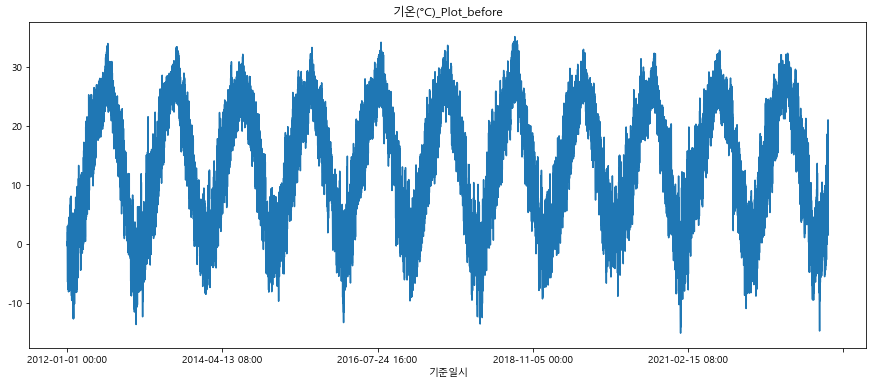

결측치 비율(%) :  0.0



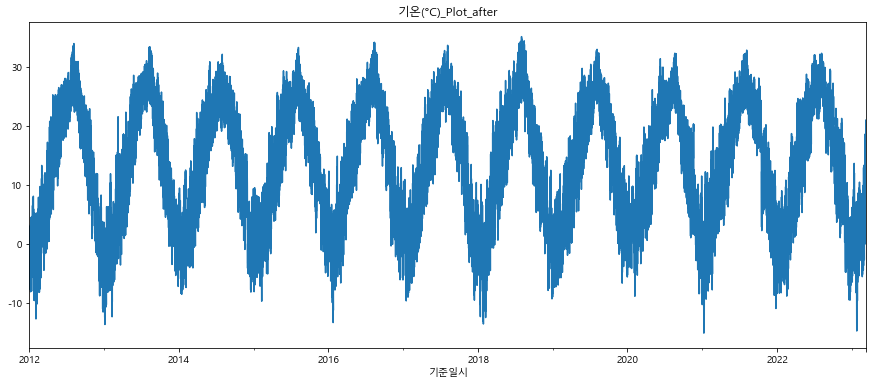

  7%|████▎                                                            | 1/15 [00:00<00:08,  1.67it/s]

결측치 비율(%) :  0.0



강수량(mm)       강수량(mm)
count  98137.000000  98137.000000
mean       0.406066      0.406066
std        1.198356      1.198356
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.244186      0.244186
max       74.600000     74.600000

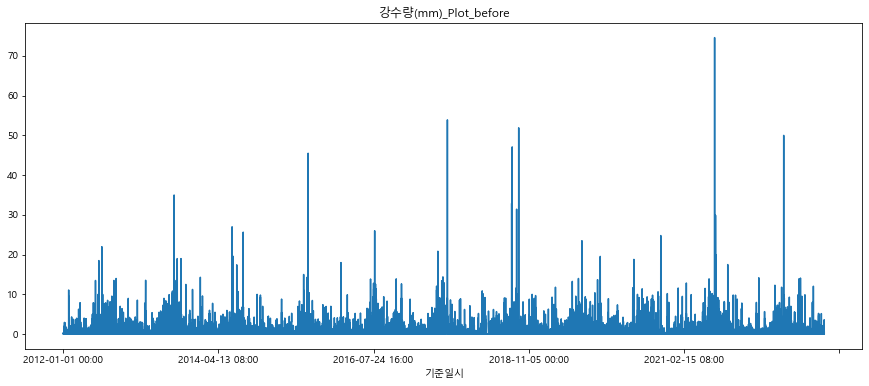

결측치 비율(%) :  0.0



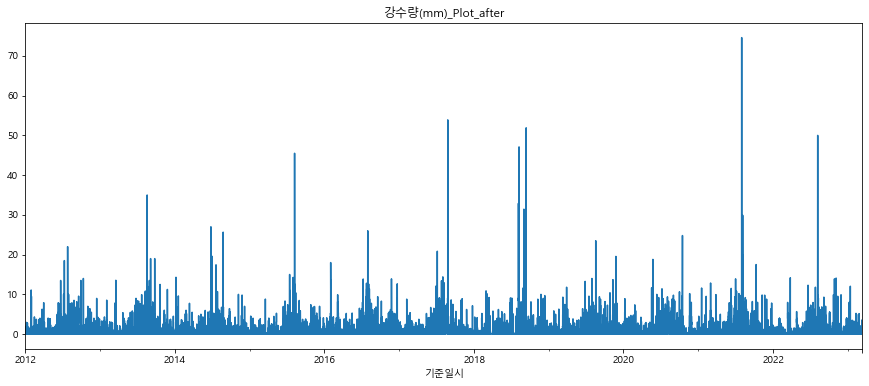

 13%|████████▋                                                        | 2/15 [00:01<00:08,  1.49it/s]

결측치 비율(%) :  0.0



풍속(m/s)       풍속(m/s)
count  98137.000000  98137.000000
mean       2.036400      2.036400
std        0.989062      0.989062
min        0.462766      0.462766
25%        1.254737      1.254737
50%        1.828421      1.828421
75%        2.577660      2.577660
max        9.378261      9.378261

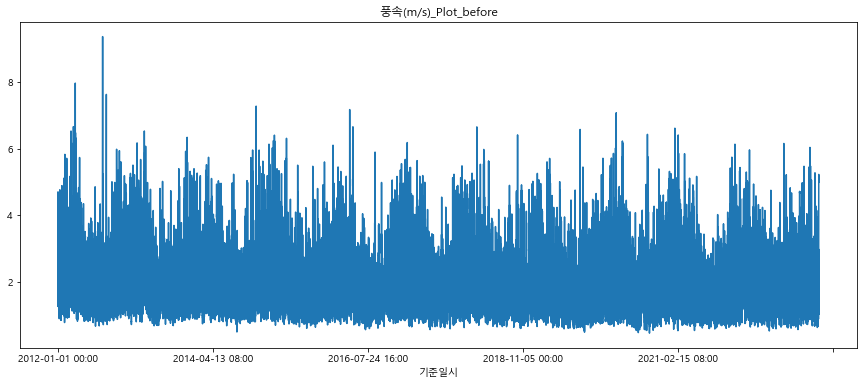

결측치 비율(%) :  0.0



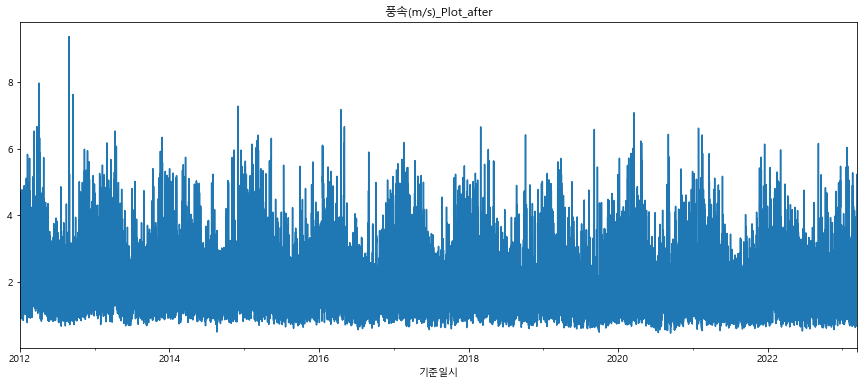

 20%|█████████████                                                    | 3/15 [00:01<00:07,  1.55it/s]

결측치 비율(%) :  0.0



풍향(16방위)      풍향(16방위)
count  98137.000000  98137.000000
mean     175.966462    175.966462
std       52.004118     52.004118
min       54.842105     54.842105
25%      133.723404    133.723404
50%      167.608696    167.608696
75%      214.105263    214.105263
max      306.105263    306.105263

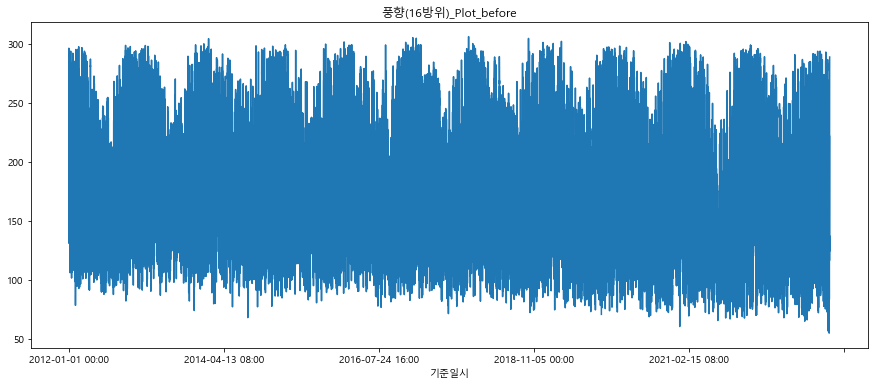

결측치 비율(%) :  0.0



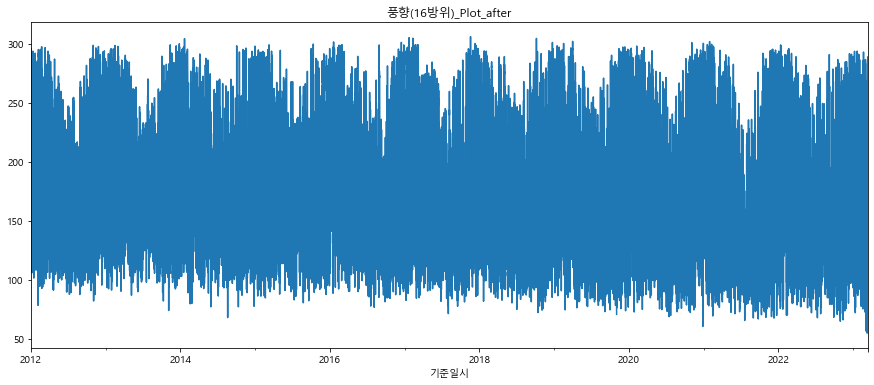

 27%|█████████████████▎                                               | 4/15 [00:02<00:08,  1.31it/s]

결측치 비율(%) :  0.0



습도(%)         습도(%)
count  98136.000000  98136.000000
mean      68.705023     68.705023
std       17.612178     17.612178
min       17.365591     17.365591
25%       56.200000     56.200000
50%       70.865645     70.865645
75%       83.694737     83.694737
max       97.968421     97.968421

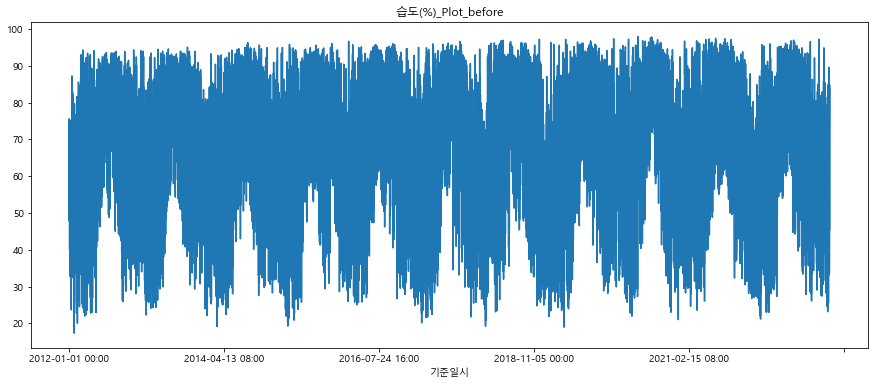

결측치 비율(%) :  0.0



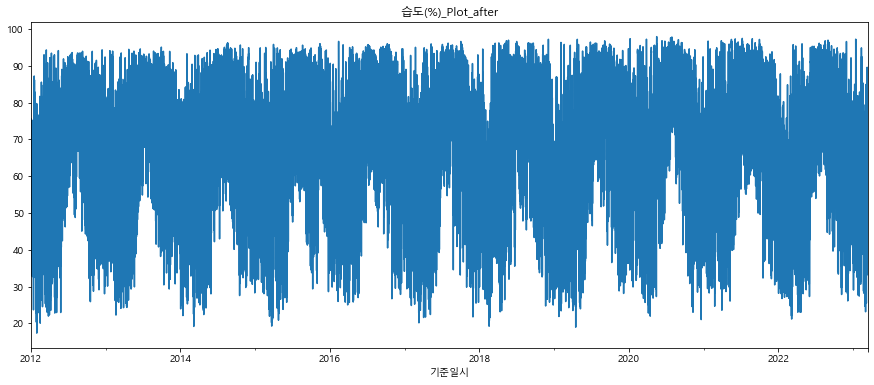

 33%|█████████████████████▋                                           | 5/15 [00:03<00:07,  1.34it/s]

결측치 비율(%) :  0.0



증기압(hPa)      증기압(hPa)
count  98136.000000  98136.000000
mean      12.470213     12.470213
std        8.363478      8.363478
min        1.055789      1.055789
25%        5.195789      5.195789
50%       10.100000     10.100000
75%       18.999211     18.999211
max       32.728421     32.728421

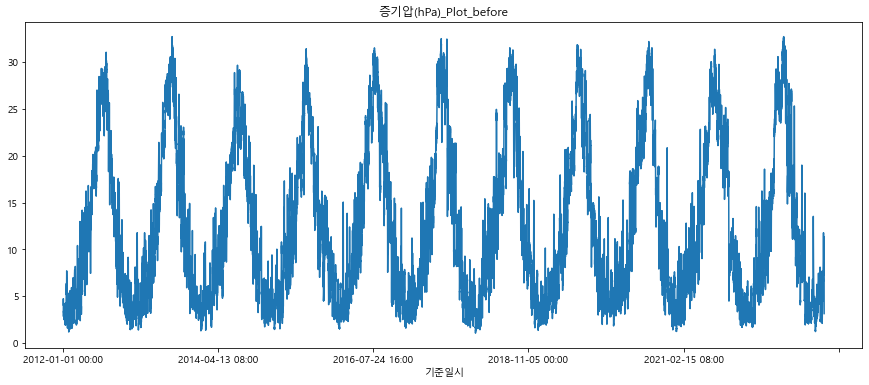

결측치 비율(%) :  0.0



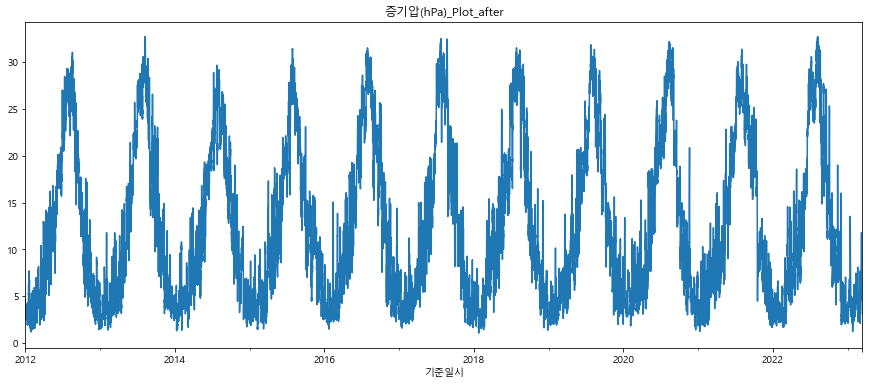

 40%|██████████████████████████                                       | 6/15 [00:04<00:06,  1.34it/s]

결측치 비율(%) :  0.0



이슬점온도(°C)     이슬점온도(°C)
count  98136.000000  98136.000000
mean       6.537621      6.537621
std       11.264279     11.264279
min      -24.132632    -24.132632
25%       -2.627368     -2.627368
50%        6.837095      6.837095
75%       16.568817     16.568817
max       25.510526     25.510526

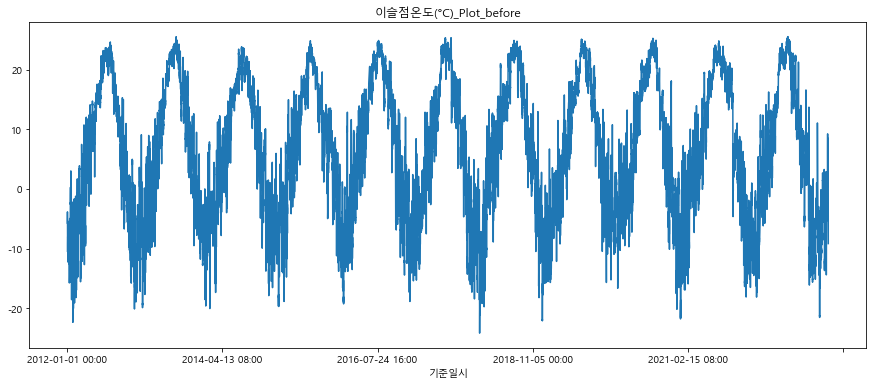

결측치 비율(%) :  0.0



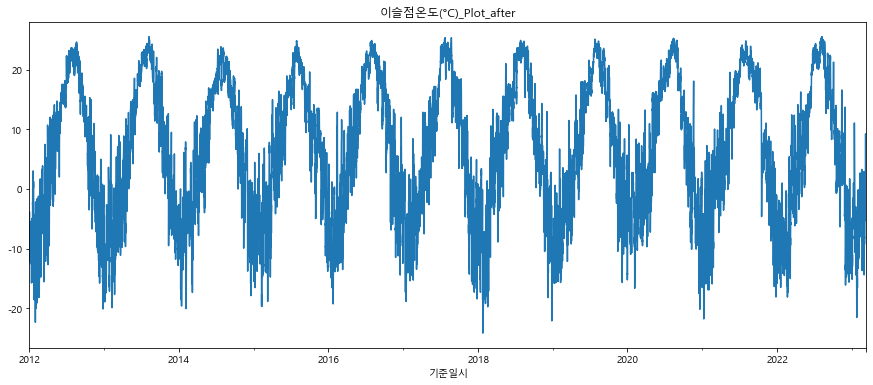

 47%|██████████████████████████████▎                                  | 7/15 [00:04<00:05,  1.46it/s]

결측치 비율(%) :  0.0



현지기압(hPa)     현지기압(hPa)
count  98100.000000  98100.000000
mean    1003.835490   1003.835490
std        7.672712      7.672712
min      970.706316    970.706316
25%      997.838888    997.838888
50%     1004.081053   1004.081053
75%     1009.750529   1009.750529
max     1025.016842   1025.016842

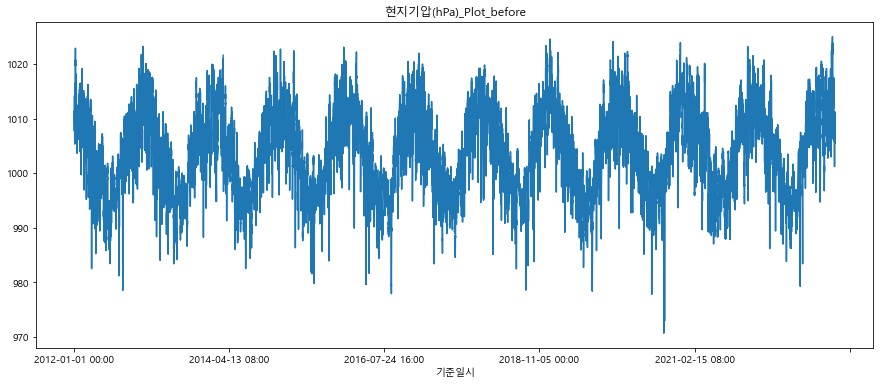

결측치 비율(%) :  0.04



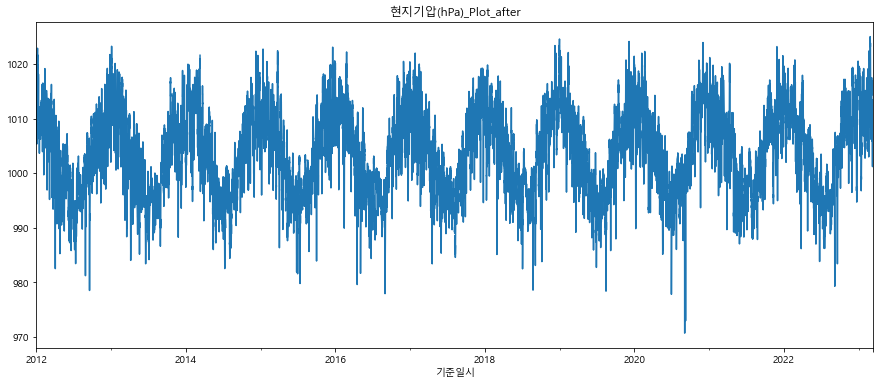

 53%|██████████████████████████████████▋                              | 8/15 [00:05<00:05,  1.39it/s]

결측치 비율(%) :  0.04



해면기압(hPa)     해면기압(hPa)
count  98136.000000  98136.000000
mean    1016.468815   1016.468815
std        8.139511      8.139511
min      982.045263    982.045263
25%     1010.027368   1010.027368
50%     1016.716932   1016.716932
75%     1022.789712   1022.789712
max     1038.693684   1038.693684

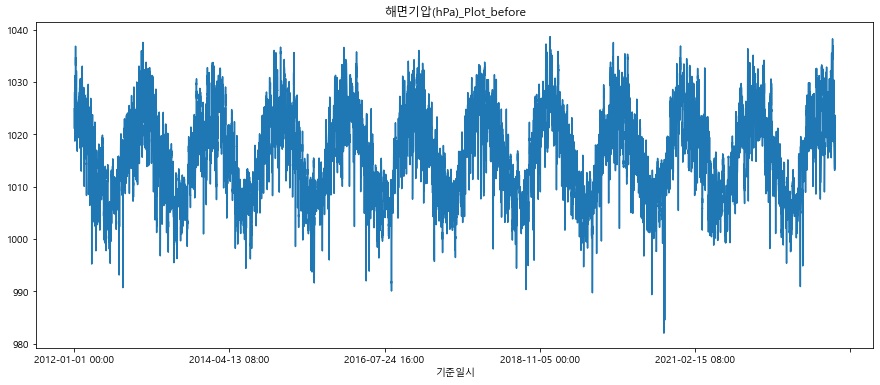

결측치 비율(%) :  0.0



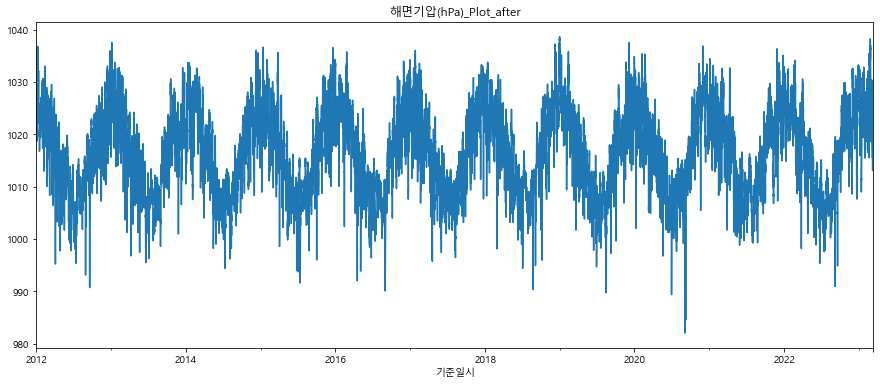

 60%|███████████████████████████████████████                          | 9/15 [00:06<00:04,  1.47it/s]

결측치 비율(%) :  0.0



적설(cm)       적설(cm)
count  98137.00000  98137.00000
mean       1.76549      1.76549
std        5.33718      5.33718
min        0.00000      0.00000
25%        0.00000      0.00000
50%        0.00000      0.00000
75%        0.00000      0.00000
max       88.10000     88.10000

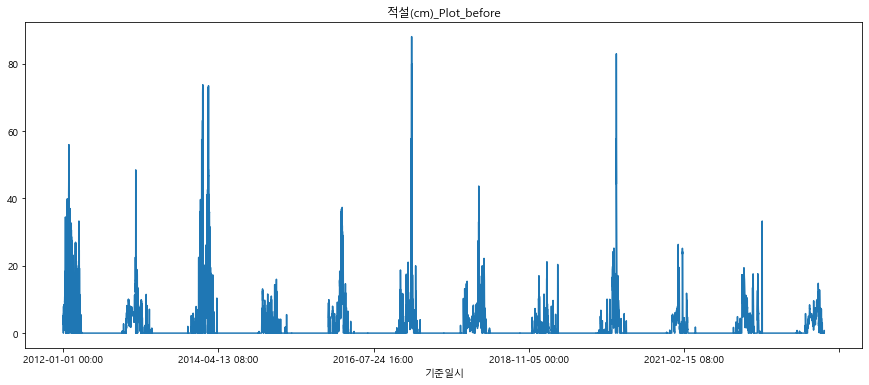

결측치 비율(%) :  0.0



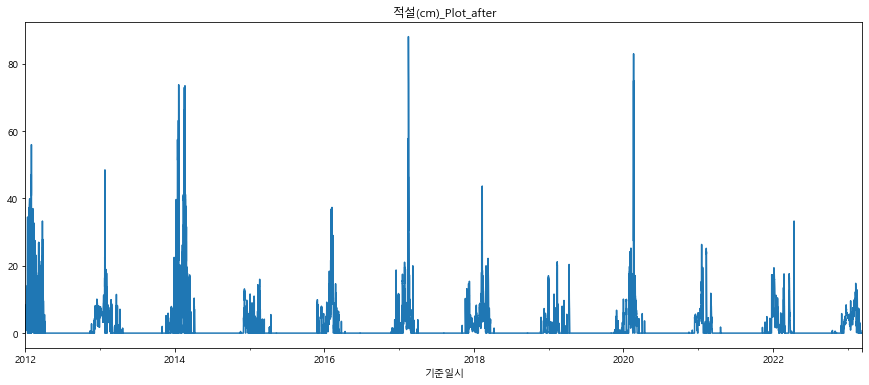

 67%|██████████████████████████████████████████▋                     | 10/15 [00:06<00:03,  1.59it/s]

결측치 비율(%) :  0.0



지면온도(°C)      지면온도(°C)
count  98136.000000  98136.000000
mean      15.040603     15.040603
std       12.118407     12.118407
min       -9.335106     -9.335106
25%        4.391557      4.391557
50%       14.791534     14.791534
75%       24.070731     24.070731
max       58.633684     58.633684

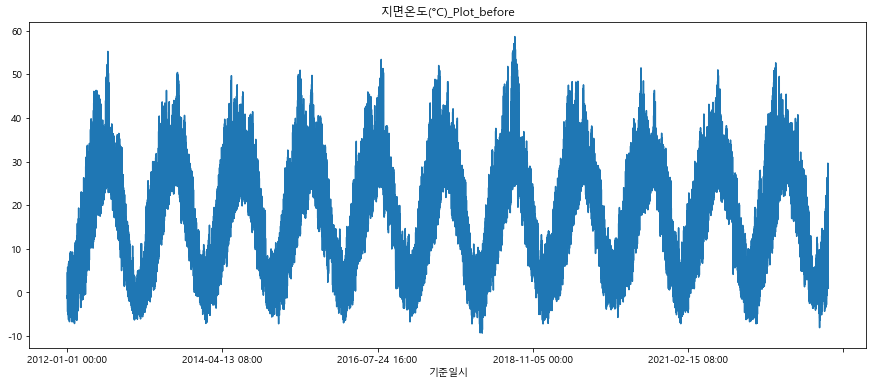

결측치 비율(%) :  0.0



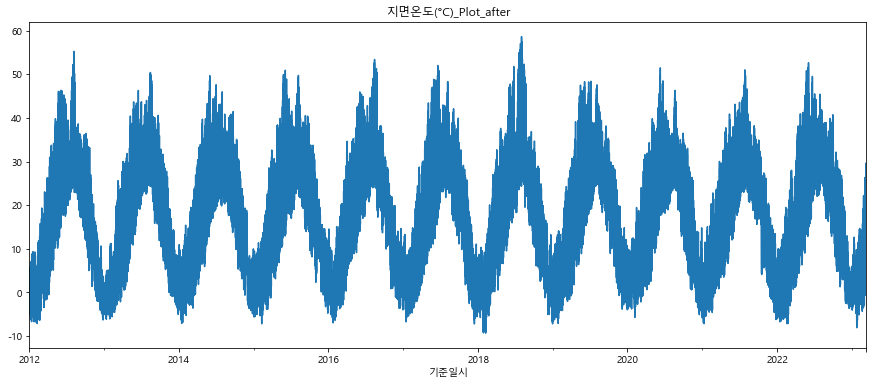

 73%|██████████████████████████████████████████████▉                 | 11/15 [00:07<00:02,  1.47it/s]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count  98137.000000  98137.000000
mean      15.047269     15.047269
std        9.920525      9.920525
min       -3.807143     -3.807143
25%        5.500000      5.500000
50%       15.434375     15.434375
75%       23.760714     23.760714
max       39.817857     39.817857

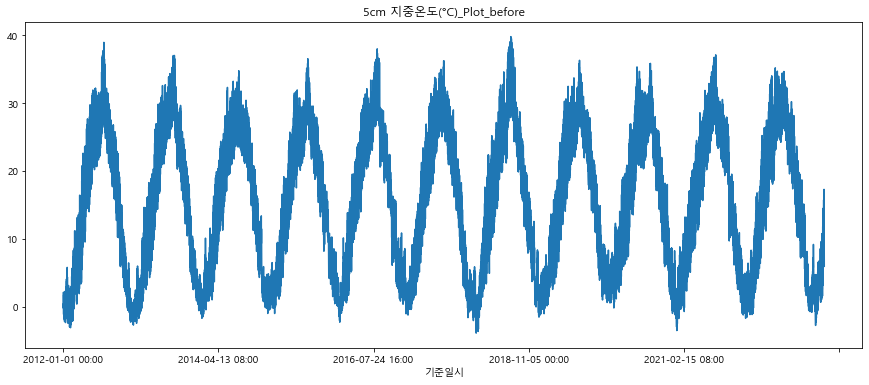

결측치 비율(%) :  0.0



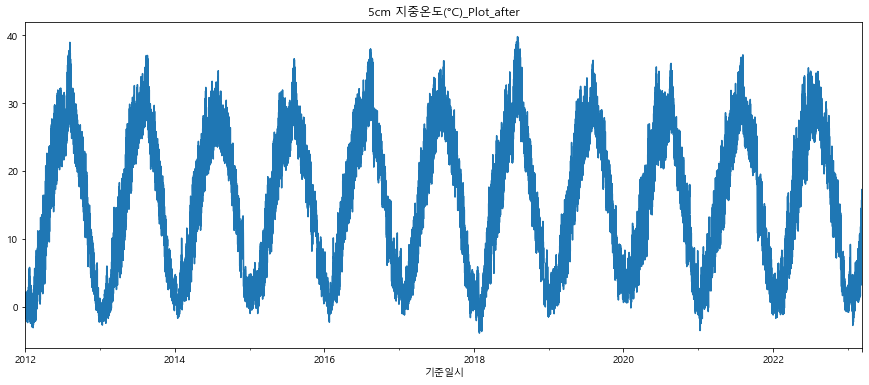

 80%|███████████████████████████████████████████████████▏            | 12/15 [00:08<00:01,  1.57it/s]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.023566      15.023566
std         9.584733       9.584733
min        -2.381481      -2.381481
25%         5.711111       5.711111
50%        15.437037      15.437037
75%        23.662500      23.662500
max        36.889286      36.889286

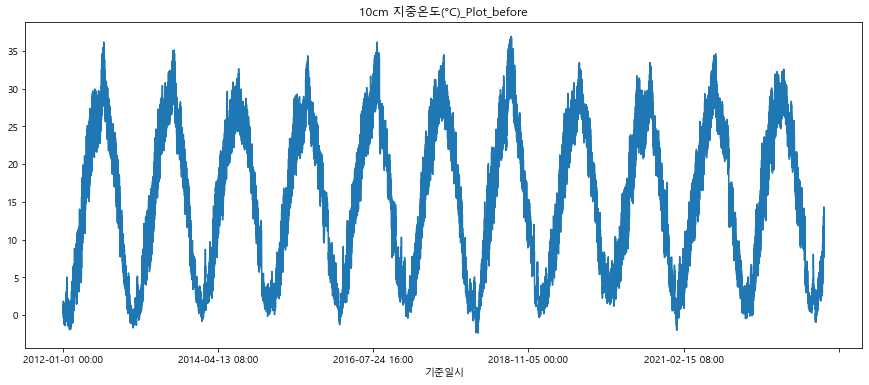

결측치 비율(%) :  0.0



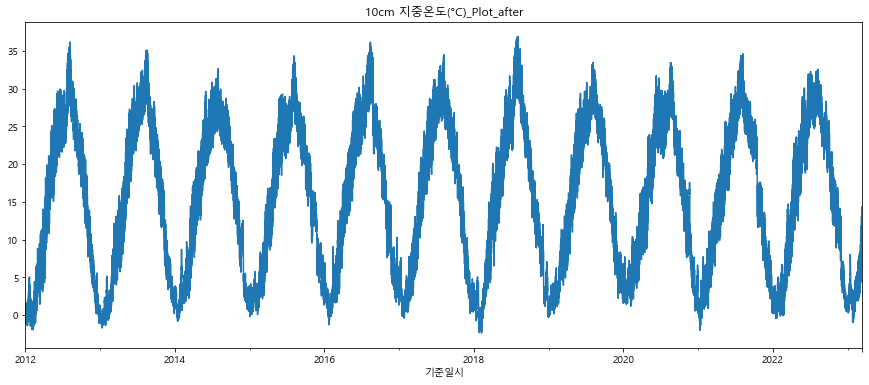

 87%|███████████████████████████████████████████████████████▍        | 13/15 [00:08<00:01,  1.50it/s]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.168991      15.168991
std         9.136890       9.136890
min        -0.811111      -0.811111
25%         6.214286       6.214286
50%        15.538462      15.538462
75%        23.632143      23.632143
max        34.110714      34.110714

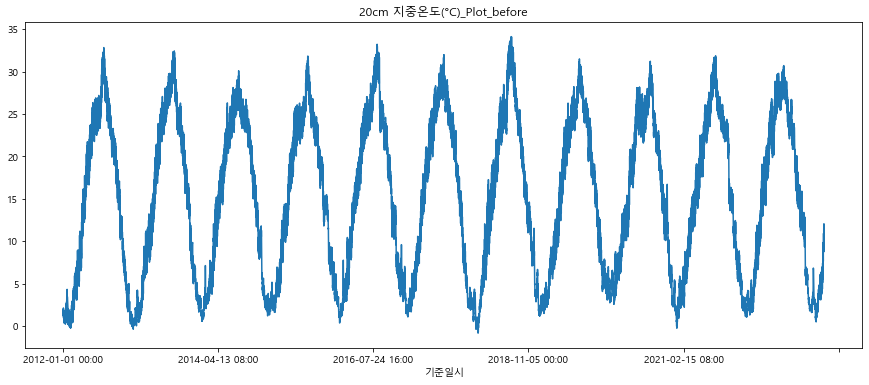

결측치 비율(%) :  0.0



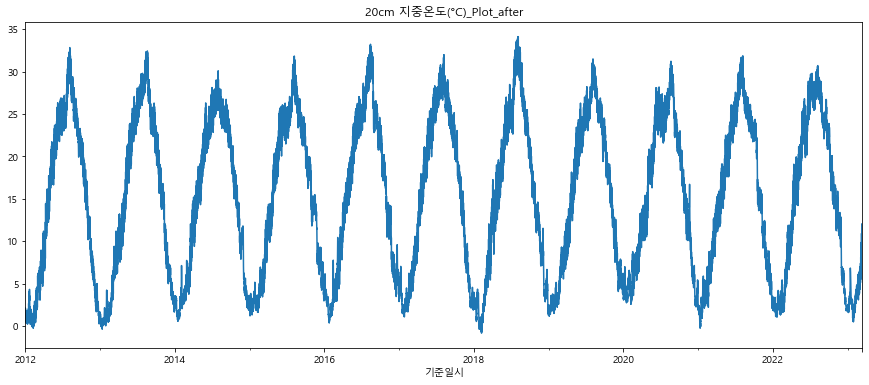

 93%|███████████████████████████████████████████████████████████▋    | 14/15 [00:09<00:00,  1.54it/s]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count   98137.000000   98137.000000
mean       15.226097      15.226097
std         8.775796       8.775796
min         0.272000       0.272000
25%         6.571429       6.571429
50%        15.653571      15.653571
75%        23.453125      23.453125
max        32.275000      32.275000

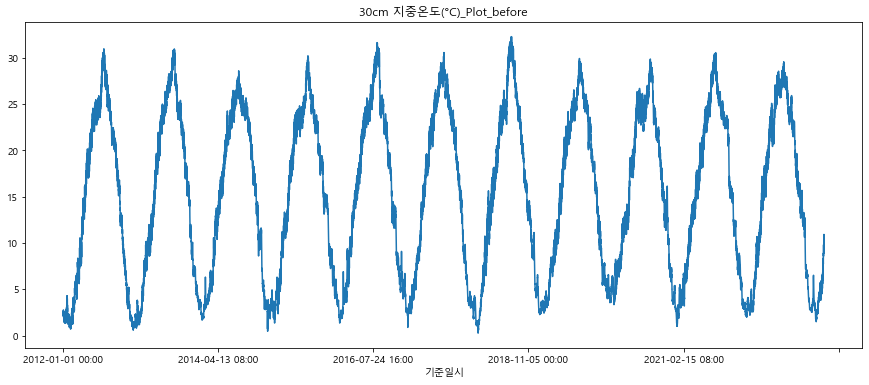

결측치 비율(%) :  0.0



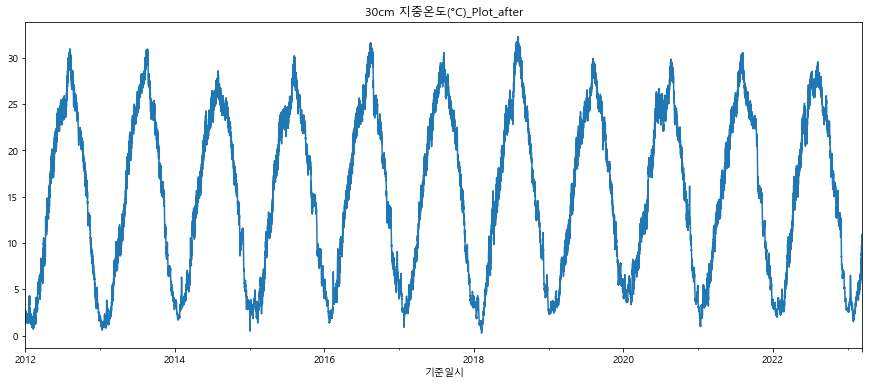

100%|████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.47it/s]

결측치 비율(%) :  0.0



In [21]:
compare_describe(time_fill, time_arima_fill.set_index('기준일시'))

### LSTM

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

In [ ]:
# GPU 환경 설정

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [17]:

def fill_missing_values_lstm(df):
    for column in tqdm(df.columns):
        missing_indexes = df[df[column].isnull()].index
        
        for idx in missing_indexes:
            # LSTM 모델 학습 데이터 준비
            X_train = df.loc[:idx-1, column].values
            y_train = df.loc[1:idx, column].values

            # LSTM 모델 구성
            model = Sequential()
            model.add(LSTM(10, input_shape=(1, 1)))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')

            # LSTM 모델 학습
            X_train = X_train.reshape((X_train.shape[0], 1, 1))
            model.fit(X_train, y_train, epochs=100, verbose=0)

            # 결측치 예측
            X_test = np.array([[df.loc[idx-1, column]]])
            X_test = X_test.reshape((1, 1, 1))
            y_pred = model.predict(X_test)

            # 결측치 채우기
            df.loc[idx, column] = y_pred[0][0]
        
    return df


In [18]:
time_lstm_fill = time.copy()
time_lstm_fill['강수량(mm)'].fillna(0, inplace=True)
time_lstm_fill['적설(cm)'].fillna(0, inplace=True)

time_lstm_fill.index = pd.to_datetime(time_lstm_fill.index)
time_lstm_fill.reset_index(inplace=True)

time_lstm_fill = fill_missing_values_lstm(time_lstm_fill)

  6%|████                                                             | 1/16 [01:16<19:04, 76.32s/it]


KeyboardInterrupt: 

In [ ]:
display(time_arima_fill)
display(missing_per(time_arima_fill).style.applymap(highlight_cells))

In [ ]:
value_confirm(time_arima_fill)

# Data Concat

In [25]:
merged_df = pd.merge(elec, time_fill, on='기준일시', how='left')

In [28]:
display(missing_per(merged_df).style.applymap(highlight_cells))

  0%|                                                                         | 0/16 [00:00<?, ?it/s]

현재수요(MW)      현재수요(MW)
count  1.131812e+06  1.132418e+06
mean   6.223510e+04  6.223537e+04
std    8.492229e+03  8.493711e+03
min    3.660735e+04  3.660735e+04
25%    5.593460e+04  5.593242e+04
50%    6.171670e+04  6.171529e+04
75%    6.752673e+04  6.752753e+04
max    9.485300e+04  9.485300e+04

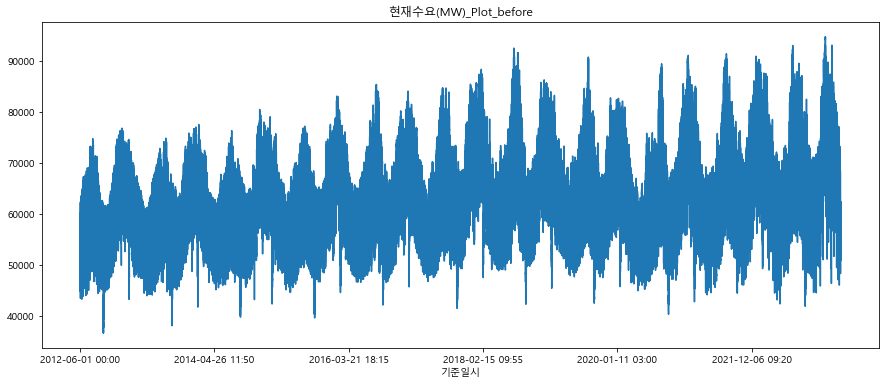

결측치 비율(%) :  0.05



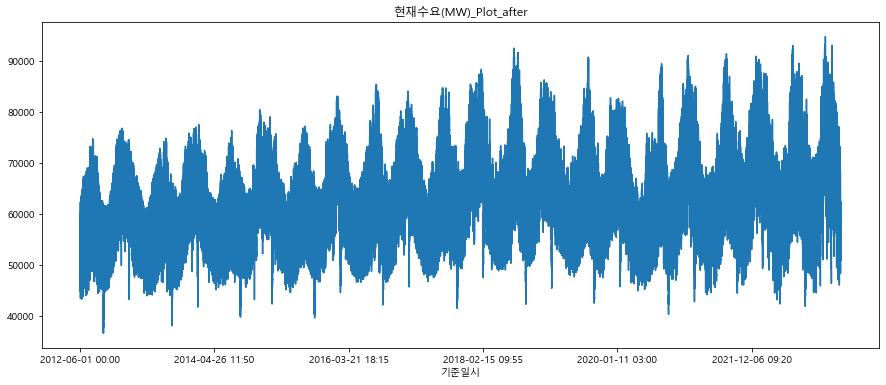

  6%|████                                                             | 1/16 [00:00<00:14,  1.06it/s]

결측치 비율(%) :  0.0



기온(°C)        기온(°C)
count  94381.000000  1.132418e+06
mean      13.212786  1.321419e+01
std        9.974574  9.968548e+00
min      -15.128421 -1.512842e+01
25%        4.843158  4.848772e+00
50%       13.996842  1.399189e+01
75%       21.785106  2.179149e+01
max       35.211579  3.521158e+01

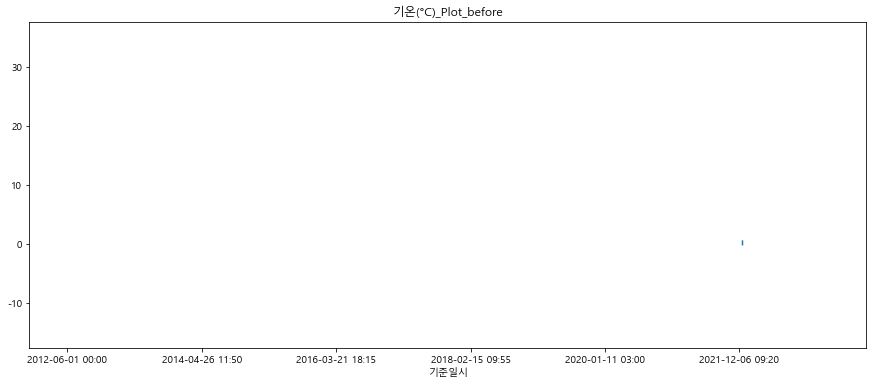

결측치 비율(%) :  91.67



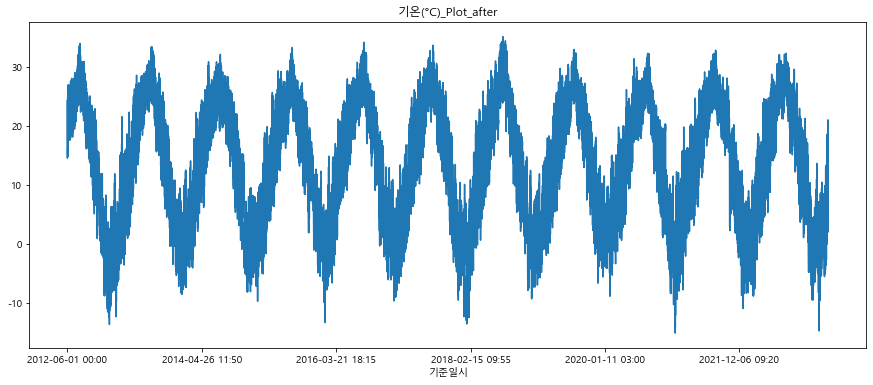

 12%|████████▏                                                        | 2/16 [00:01<00:11,  1.18it/s]

결측치 비율(%) :  0.0



강수량(mm)       강수량(mm)
count  94381.000000  1.132418e+06
mean       0.413766  4.138321e-01
std        1.214152  1.116701e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.250000  3.000000e-01
max       74.600000  7.460000e+01

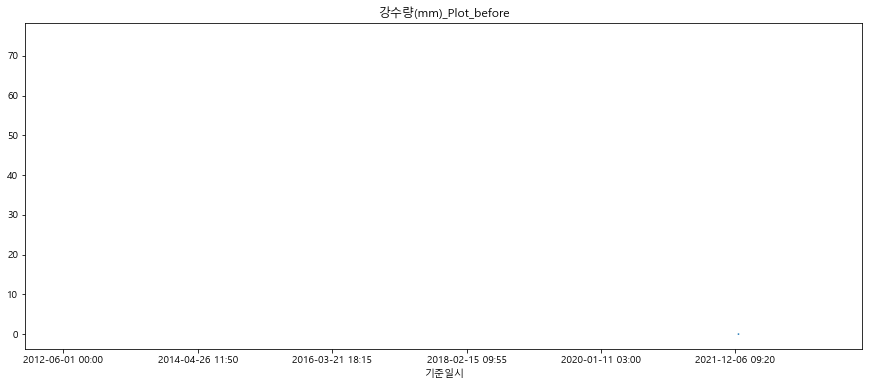

결측치 비율(%) :  91.67



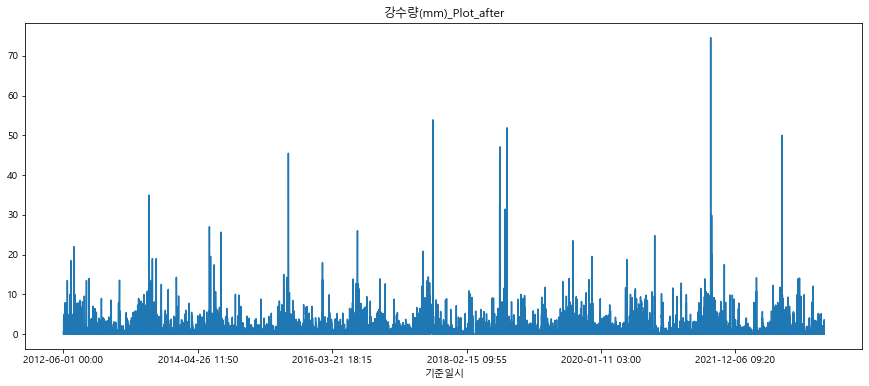

 19%|████████████▏                                                    | 3/16 [00:02<00:11,  1.17it/s]

결측치 비율(%) :  0.0



풍속(m/s)       풍속(m/s)
count  94381.000000  1.132418e+06
mean       2.020782  2.020931e+00
std        0.980229  9.760728e-01
min        0.462766  4.627660e-01
25%        1.244211  1.247895e+00
50%        1.815957  1.817199e+00
75%        2.554737  2.551418e+00
max        9.378261  9.378261e+00

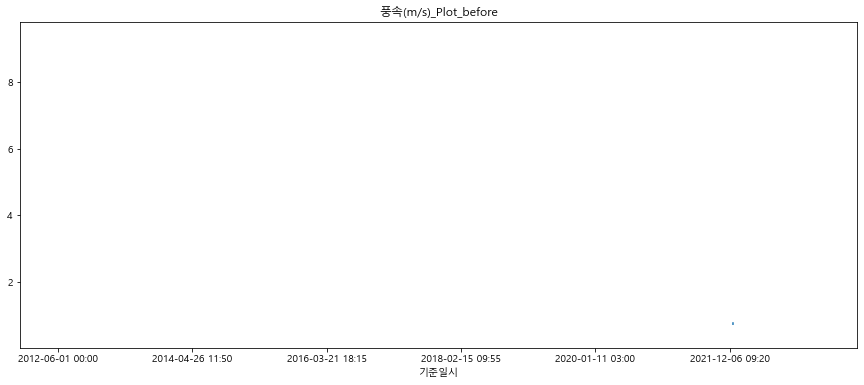

결측치 비율(%) :  91.67



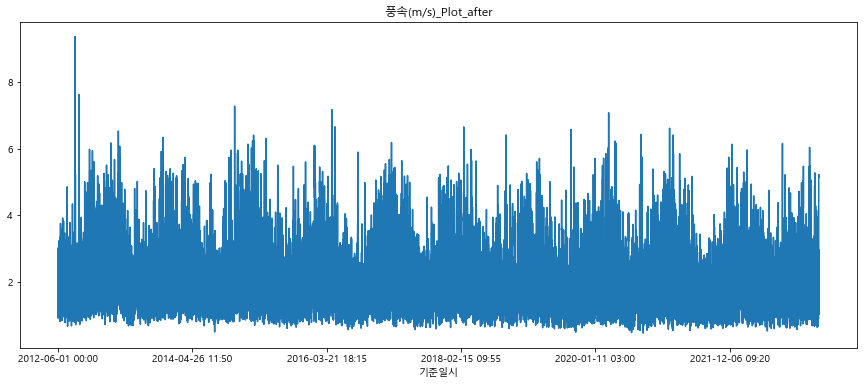

 25%|████████████████▎                                                | 4/16 [00:03<00:09,  1.20it/s]

결측치 비율(%) :  0.0



풍향(16방위)      풍향(16방위)
count  94381.000000  1.132418e+06
mean     175.366060  1.753754e+02
std       51.886951  5.147716e+01
min       54.842105  5.484211e+01
25%      133.297872  1.334409e+02
50%      166.914894  1.668715e+02
75%      213.157895  2.128763e+02
max      306.105263  3.061053e+02

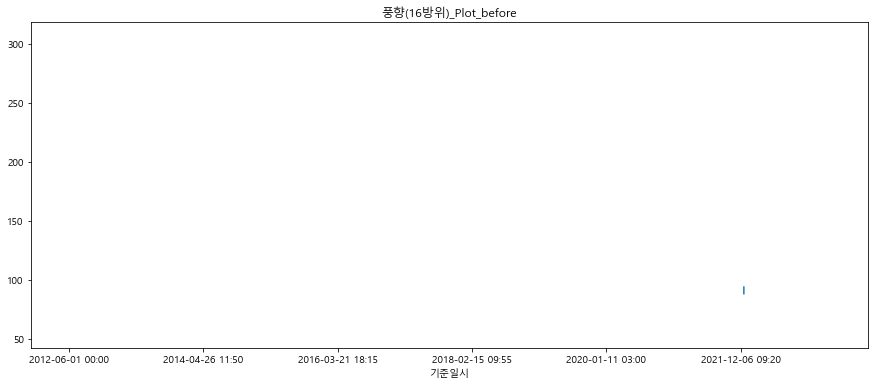

결측치 비율(%) :  91.67



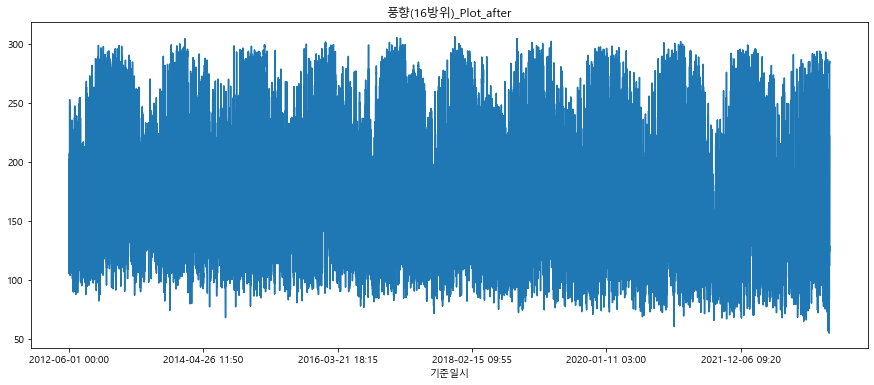

 31%|████████████████████▎                                            | 5/16 [00:04<00:09,  1.17it/s]

결측치 비율(%) :  0.0



습도(%)         습도(%)
count  94380.000000  1.132418e+06
mean      69.059467  6.905689e+01
std       17.530522  1.746907e+01
min       18.978947  1.897895e+01
25%       56.631579  5.665821e+01
50%       71.308511  7.126359e+01
75%       84.075269  8.398936e+01
max       97.968421  9.796842e+01

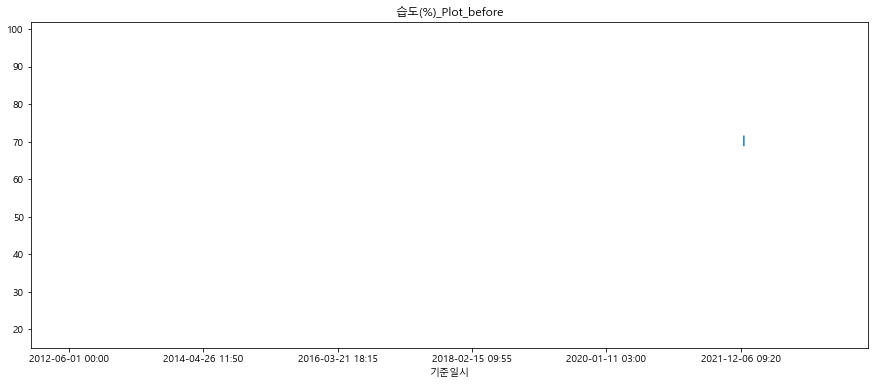

결측치 비율(%) :  91.67



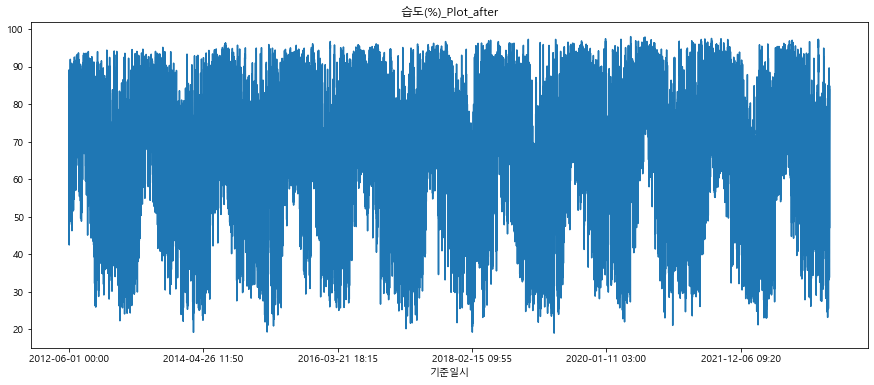

 38%|████████████████████████▍                                        | 6/16 [00:05<00:08,  1.16it/s]

결측치 비율(%) :  0.0



증기압(hPa)      증기압(hPa)
count  94380.000000  1.132418e+06
mean      12.690413  1.269124e+01
std        8.408114  8.408077e+00
min        1.055789  1.055789e+00
25%        5.315789  5.316491e+00
50%       10.350263  1.035307e+01
75%       19.349597  1.935288e+01
max       32.728421  3.272842e+01

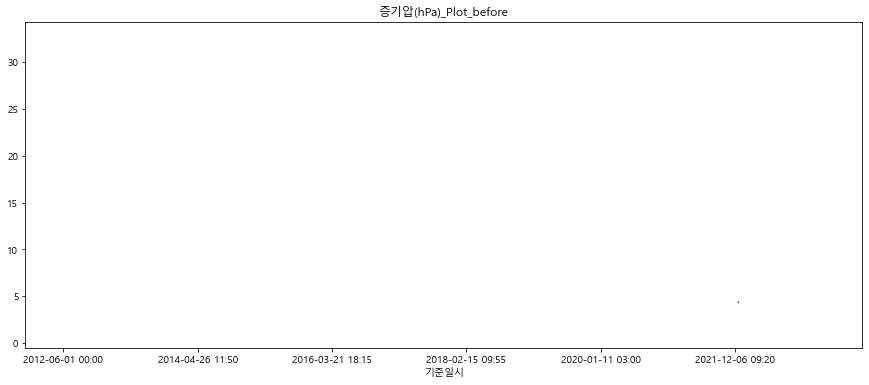

결측치 비율(%) :  91.67



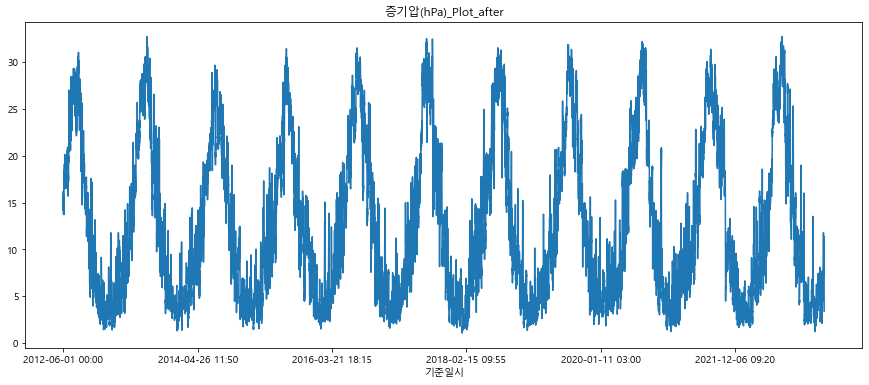

 44%|████████████████████████████▍                                    | 7/16 [00:05<00:07,  1.17it/s]

결측치 비율(%) :  0.0



이슬점온도(°C)     이슬점온도(°C)
count  94380.000000  1.132418e+06
mean       6.845961  6.846484e+00
std       11.227563  1.122745e+01
min      -24.132632 -2.413263e+01
25%       -2.303158 -2.309211e+00
50%        7.185484  7.191579e+00
75%       16.859054  1.686064e+01
max       25.510526  2.551053e+01

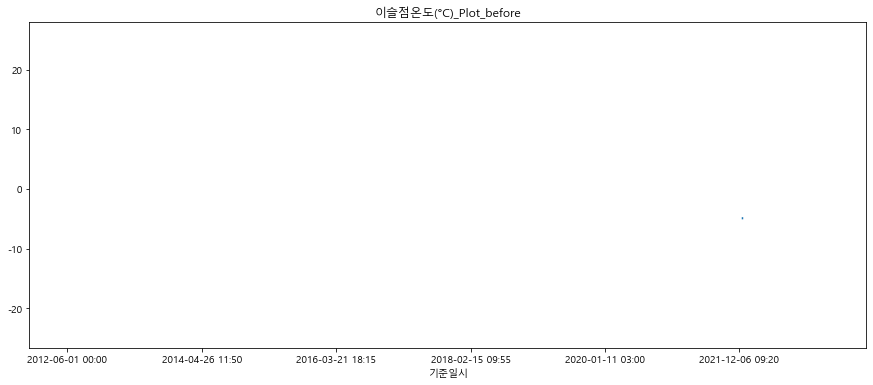

결측치 비율(%) :  91.67



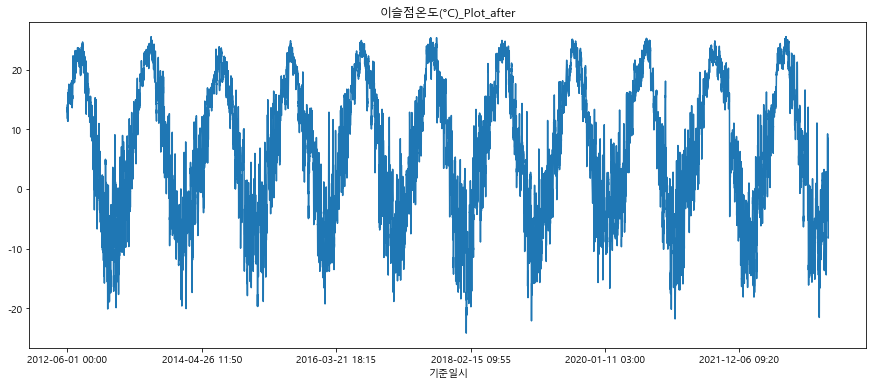

 50%|████████████████████████████████▌                                | 8/16 [00:06<00:06,  1.21it/s]

결측치 비율(%) :  0.0



현지기압(hPa)     현지기압(hPa)
count  94344.000000  1.132418e+06
mean    1003.776326  1.003780e+03
std        7.697686  7.699049e+00
min      970.706316  9.707063e+02
25%      997.734737  9.977409e+02
50%     1003.992632  1.003993e+03
75%     1009.716842  1.009720e+03
max     1025.016842  1.025017e+03

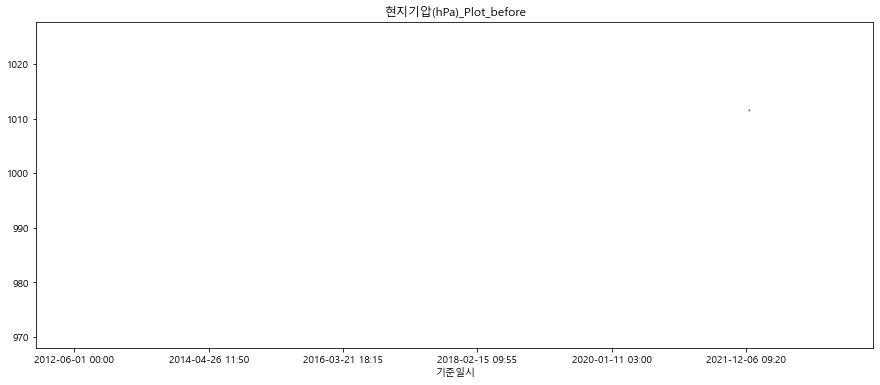

결측치 비율(%) :  91.67



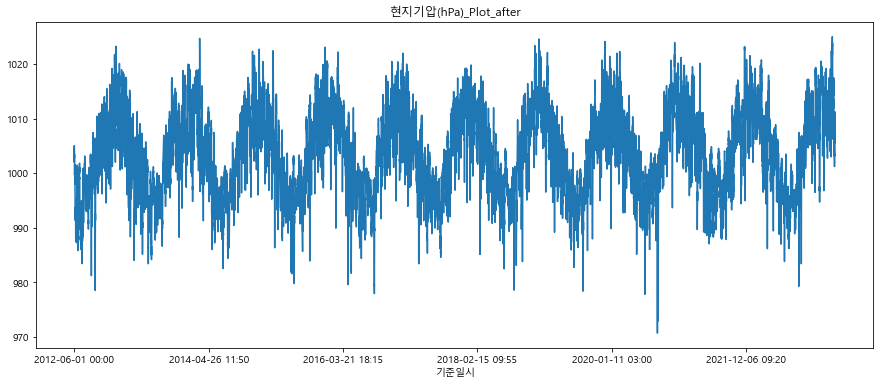

 56%|████████████████████████████████████▌                            | 9/16 [00:07<00:05,  1.24it/s]

결측치 비율(%) :  0.0



해면기압(hPa)     해면기압(hPa)
count  94380.000000  1.132418e+06
mean    1016.390263  1.016389e+03
std        8.161818  8.160733e+00
min      982.045263  9.820453e+02
25%     1009.911796  1.009910e+03
50%     1016.604233  1.016604e+03
75%     1022.735945  1.022735e+03
max     1038.693684  1.038694e+03

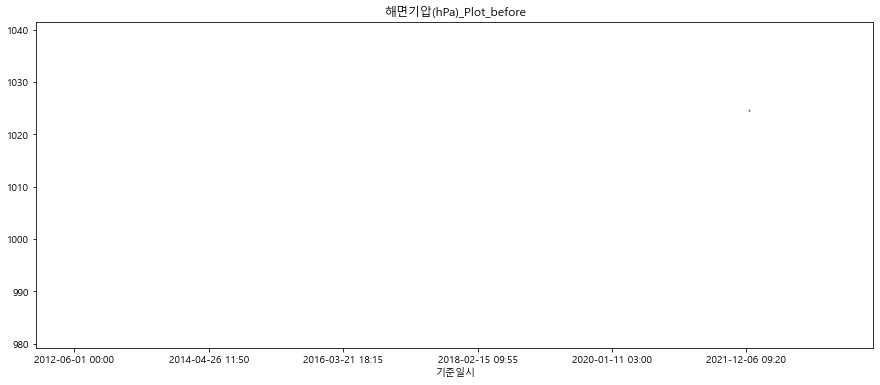

결측치 비율(%) :  91.67



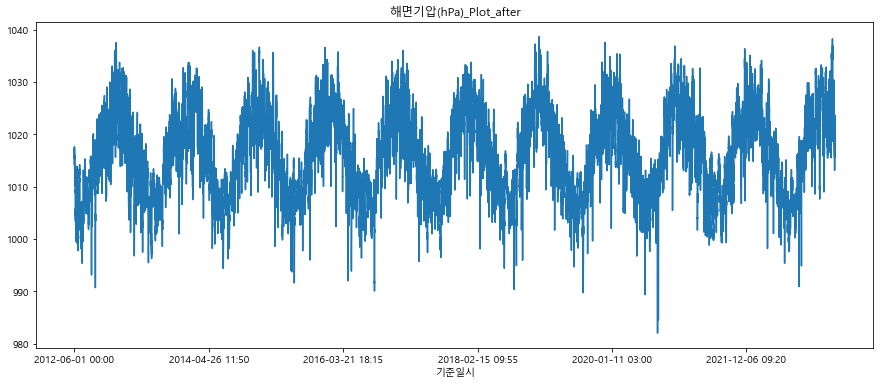

 62%|████████████████████████████████████████                        | 10/16 [00:08<00:04,  1.24it/s]

결측치 비율(%) :  0.0



적설(cm)        적설(cm)
count  94381.000000  1.132418e+06
mean       1.550671  1.550603e+00
std        4.969556  4.927298e+00
min        0.000000  0.000000e+00
25%        0.000000  0.000000e+00
50%        0.000000  0.000000e+00
75%        0.000000  0.000000e+00
max       88.100000  8.810000e+01

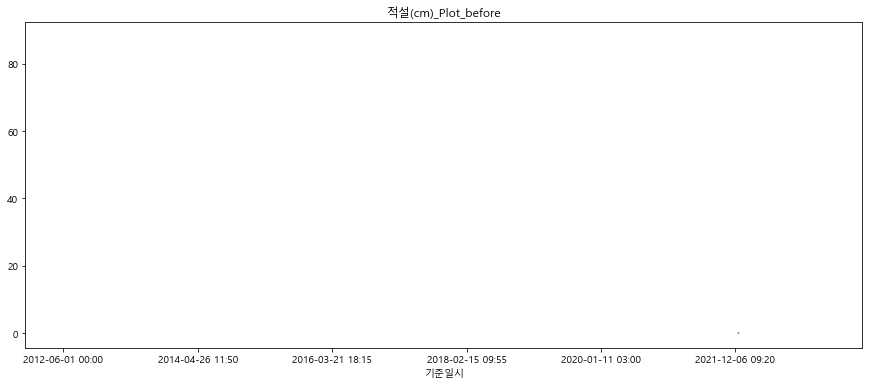

결측치 비율(%) :  91.67



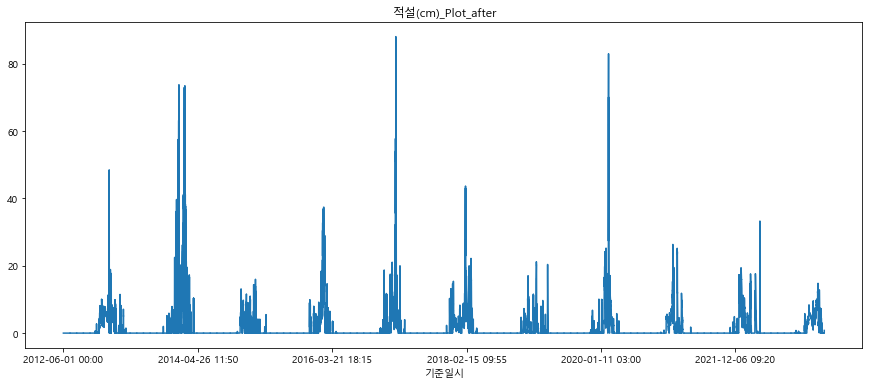

 69%|████████████████████████████████████████████                    | 11/16 [00:09<00:04,  1.23it/s]

결측치 비율(%) :  0.0



지면온도(°C)      지면온도(°C)
count  94380.000000  1.132418e+06
mean      15.279047  1.528112e+01
std       12.103961  1.208054e+01
min       -9.335106 -9.335106e+00
25%        4.658511  4.679089e+00
50%       15.216316  1.522930e+01
75%       24.245263  2.425127e+01
max       58.633684  5.863368e+01

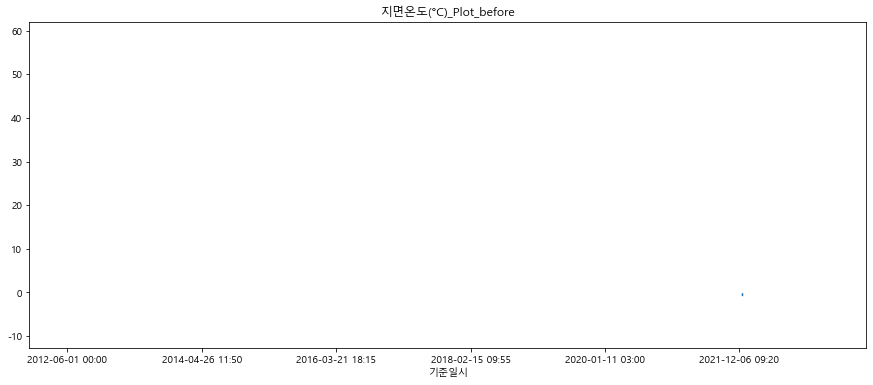

결측치 비율(%) :  91.67



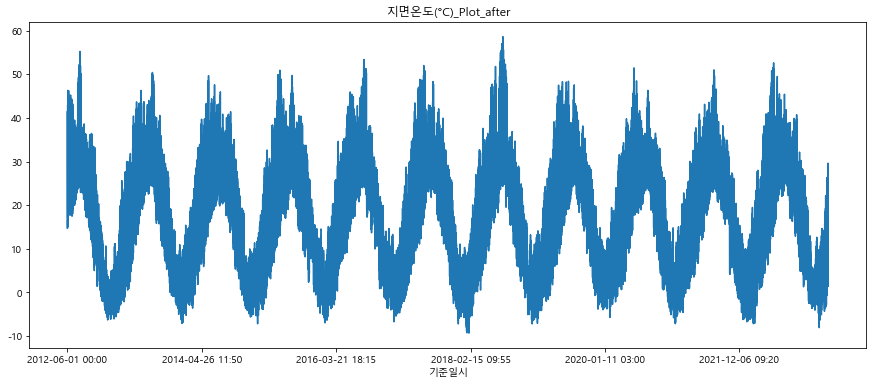

 75%|████████████████████████████████████████████████                | 12/16 [00:10<00:03,  1.10it/s]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count  94381.000000  1.132418e+06
mean      15.298403  1.529968e+01
std        9.891409  9.888414e+00
min       -3.807143 -3.807143e+00
25%        5.810714  5.808696e+00
50%       15.807692  1.581466e+01
75%       23.946154  2.394898e+01
max       39.817857  3.981786e+01

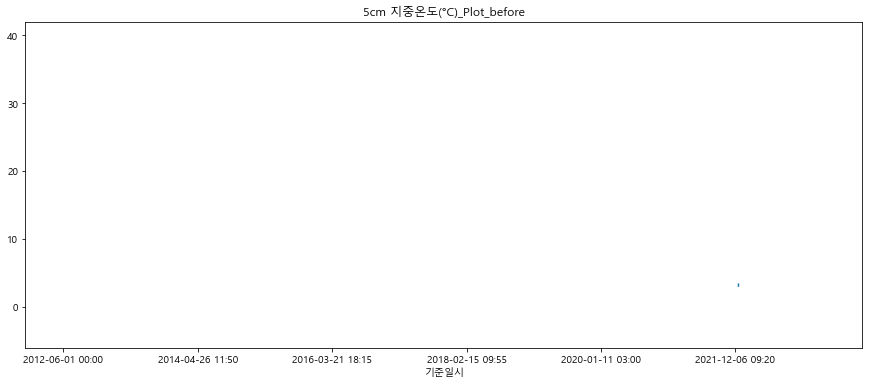

결측치 비율(%) :  91.67



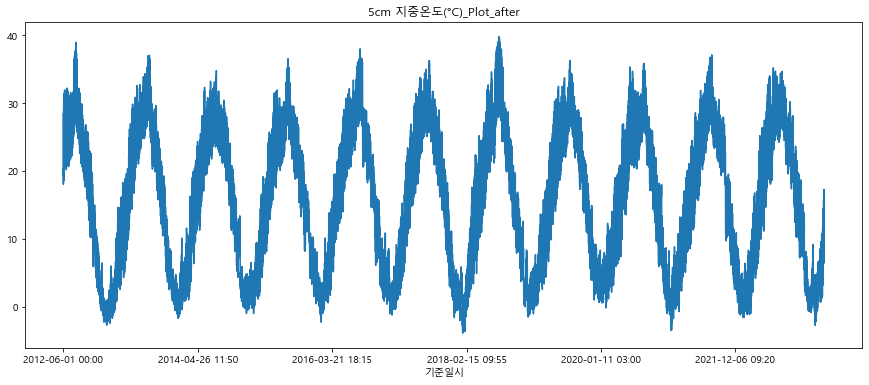

 81%|████████████████████████████████████████████████████            | 13/16 [00:11<00:02,  1.17it/s]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count   94381.000000   1.132418e+06
mean       15.275756   1.527685e+01
std         9.553201   9.552083e+00
min        -2.381481  -2.381481e+00
25%         5.996429   5.996296e+00
50%        15.828571   1.582738e+01
75%        23.839286   2.384485e+01
max        36.889286   3.688929e+01

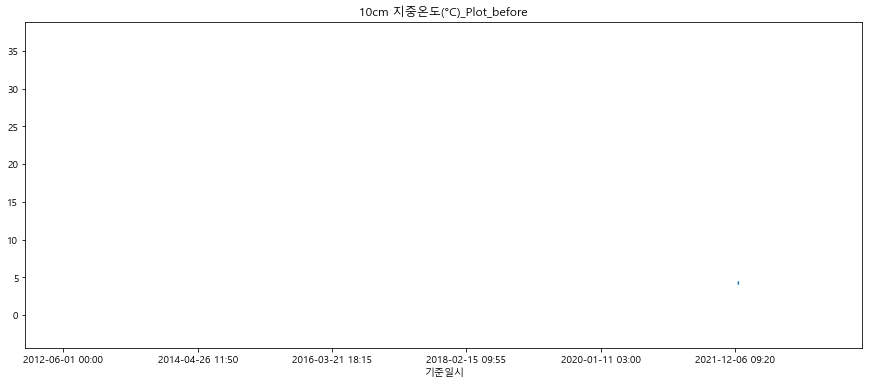

결측치 비율(%) :  91.67



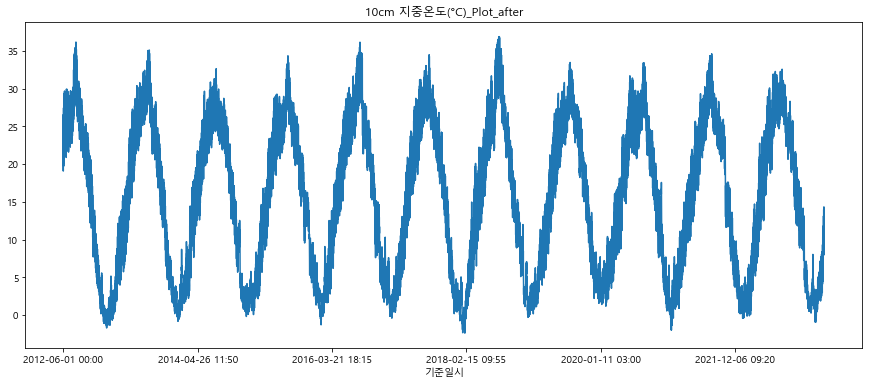

 88%|████████████████████████████████████████████████████████        | 14/16 [00:11<00:01,  1.20it/s]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count   94381.000000   1.132418e+06
mean       15.428827   1.542982e+01
std         9.102353   9.102407e+00
min        -0.811111  -8.111111e-01
25%         6.510345   6.508333e+00
50%        15.925806   1.592862e+01
75%        23.796154   2.379846e+01
max        34.110714   3.411071e+01

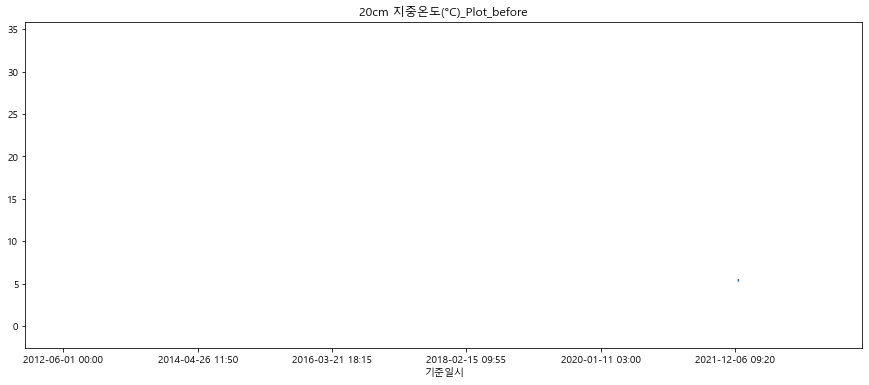

결측치 비율(%) :  91.67



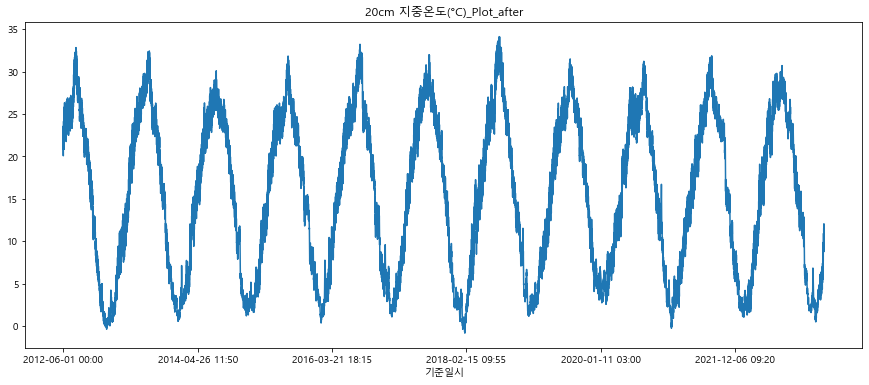

 94%|████████████████████████████████████████████████████████████    | 15/16 [00:12<00:00,  1.21it/s]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count   94381.000000   1.132418e+06
mean       15.487428   1.548841e+01
std         8.739355   8.739655e+00
min         0.272000   2.720000e-01
25%         6.875000   6.874405e+00
50%        16.017857   1.602054e+01
75%        23.614815   2.361538e+01
max        32.275000   3.227500e+01

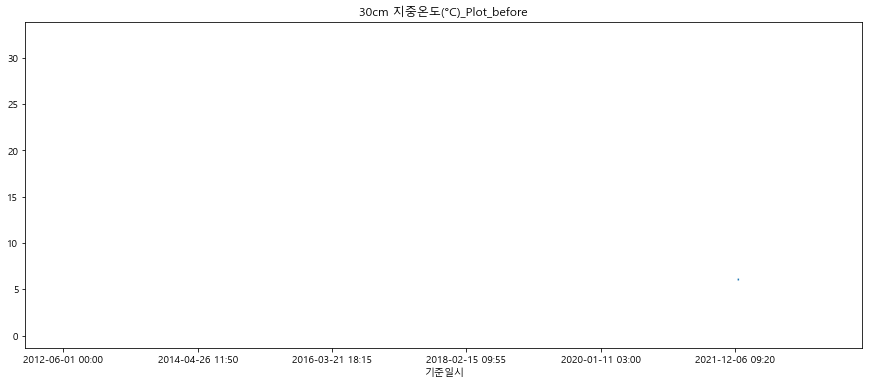

결측치 비율(%) :  91.67



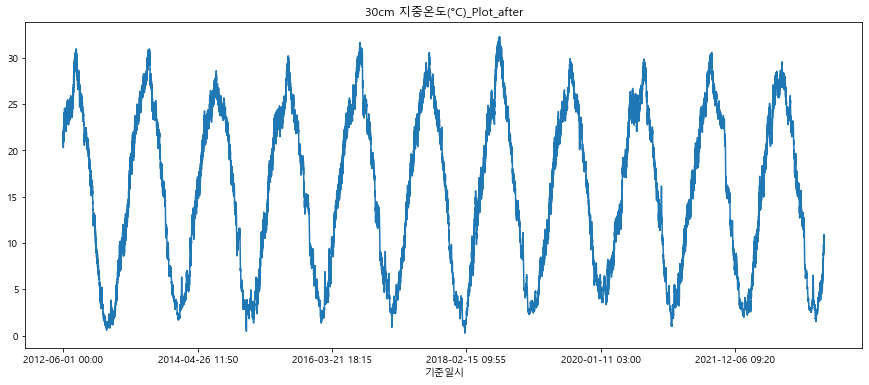

100%|████████████████████████████████████████████████████████████████| 16/16 [00:13<00:00,  1.19it/s]

결측치 비율(%) :  0.0



In [32]:
# 선형 보간으로 결측치 채우기

merged_linear_interpolate = merged_df.copy()

merged_linear_interpolate = merged_linear_interpolate.interpolate()

compare_describe(merged_df, merged_linear_interpolate)

In [31]:
merged_lstm_fill = merged_df.copy()

merged_lstm_fill.index = pd.to_datetime(merged_lstm_fill.index)
merged_lstm_fill.reset_index(inplace=True)

merged_lstm_fill = fill_missing_values_lstm(merged_lstm_fill)

  6%|███▊                                                            | 1/17 [01:49<29:13, 109.62s/it]


KeyboardInterrupt: 

In [33]:
display(missing_per(merged_linear_interpolate).style.applymap(highlight_cells))

In [35]:
# 첫 번째 컬럼 맨 뒤로

df = merged_linear_interpolate.copy()

columns = df.columns.tolist()  # 열 이름을 리스트로 변환
columns.append(columns.pop(0))  # 첫 번째 열 이름을 맨 뒤로 이동
df = df.reindex(columns=columns)  # 열 순서 재조정

In [1]:
df

NameError: name 'df' is not defined

In [37]:
df.to_csv('ver1.csv')

# ML 용 test data 만들기

In [64]:
lgbm_test = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/lgbm_test_data.csv', sep=',', index_col=0,  encoding='cp949') 
test = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/test_data.csv', sep=',', index_col=0)

In [65]:
lgbm_test = lgbm_test.set_index(['일시'])
lgbm_test.drop(['지점명', '운형(운형약어)'], axis=1, inplace=True)
lgbm_test = lgbm_test.rename_axis('기준일시')
# lgbm_test = lgbm_test.reset_index().groupby('기준일시').mean()

In [67]:
lgbm_test.to_csv('ML_test_data.csv')

In [68]:
lgbm_test

기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  풍속 QC플래그  \
기준일시                                                                        
2023-03-13 00:00     0.5       NaN      0.0        NaN      3.8       NaN   
2023-03-13 01:00     0.0       NaN      NaN        NaN      4.2       NaN   
2023-03-13 02:00    -0.3       NaN      NaN        NaN      5.9       NaN   
2023-03-13 03:00    -0.6       NaN      NaN        NaN      5.0       NaN   
2023-03-13 04:00    -1.0       NaN      NaN        NaN      3.4       NaN   
...                  ...       ...      ...        ...      ...       ...   
2023-03-19 19:00    11.7       NaN      NaN        NaN      0.8       NaN   
2023-03-19 20:00    10.0       NaN      NaN        NaN      0.7       NaN   
2023-03-19 21:00     8.7       NaN      NaN        NaN      1.1       NaN   
2023-03-19 22:00     8.2       NaN      NaN        NaN      0.9       NaN   
2023-03-19 23:00     8.3       NaN      NaN        NaN      0.7       NaN   

                  풍향(16방위)  풍향 QC플래그  습도(%)  습도 QC플래그  ...  최저운고(100m )  \
기준일시                                                   ...                
2023-03-13 00:00       270       NaN   43.0       NaN  ...          NaN   
2023-03-13 01:00       320       NaN   32.0       NaN  ...          NaN   
2023-03-13 02:00       290       NaN   31.0       NaN  ...          NaN   
2023-03-13 03:00       320       NaN   31.0       NaN  ...          NaN   
2023-03-13 04:00       340       NaN   31.0       NaN  ...          NaN   
...                    ...       ...    ...       ...  ...          ...   
2023-03-19 19:00       200       NaN   50.0       NaN  ...          NaN   
2023-03-19 20:00       270       NaN   49.0       NaN  ...          NaN   
2023-03-19 21:00       270       NaN   54.0       NaN  ...          NaN   
2023-03-19 22:00       230       NaN   54.0       NaN  ...          NaN   
2023-03-19 23:00       250       NaN   58.0       NaN  ...          NaN   

                  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  지면온도(°C)  지면온도 QC플래그  \
기준일시                                                                       
2023-03-13 00:00   5000.0           NaN        NaN       1.1         NaN   
2023-03-13 01:00   5000.0           NaN        NaN       0.6         NaN   
2023-03-13 02:00   4994.0           NaN        NaN       0.0         NaN   
2023-03-13 03:00   5000.0           NaN        NaN      -0.3         NaN   
2023-03-13 04:00   4968.0           NaN        NaN      -0.5         NaN   
...                   ...           ...        ...       ...         ...   
2023-03-19 19:00   1992.0           NaN        NaN       8.8         NaN   
2023-03-19 20:00   1994.0           NaN        NaN       6.3         NaN   
2023-03-19 21:00   1960.0           NaN        NaN       5.3         NaN   
2023-03-19 22:00   1980.0           NaN        NaN       4.6         NaN   
2023-03-19 23:00   1895.0           NaN        NaN       4.4         NaN   

                  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                                                         
2023-03-13 00:00           NaN            NaN            NaN            NaN  
2023-03-13 01:00           NaN            NaN            NaN            NaN  
2023-03-13 02:00           NaN            NaN            NaN            NaN  
2023-03-13 03:00           NaN            NaN            NaN            NaN  
2023-03-13 04:00           NaN            NaN            NaN            NaN  
...                        ...            ...            ...            ...  
2023-03-19 19:00           NaN            NaN            NaN            NaN  
2023-03-19 20:00           NaN            NaN            NaN            NaN  
2023-03-19 21:00           NaN            NaN            NaN            NaN  
2023-03-19 22:00           NaN            NaN            NaN            NaN  
2023-03-19 23:00           NaN            NaN            NaN            NaN  

[15960 rows x 34 columns]

In [41]:
# 결측치를 ARIMA 모델을 활용하여 채우기

lgbm_test_fill = lgbm_test.copy()
lgbm_test_fill['강수량(mm)'].fillna(0, inplace=True)
lgbm_test_fill['적설(cm)'].fillna(0, inplace=True)

lgbm_test_fill.index = pd.to_datetime(lgbm_test_fill.index)
lgbm_test_fill.reset_index(inplace=True)

lgbm_test_fill = fill_missing_values_arima(lgbm_test_fill)

100%|███████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 641.72it/s]


  0%|                                                                         | 0/15 [00:00<?, ?it/s]

기온(°C)      기온(°C)
count  168.000000  168.000000
mean     7.872297    7.872297
std      4.503437    4.503437
min     -0.797895   -0.797895
25%      4.595263    4.595263
50%      7.474737    7.474737
75%     11.337632   11.337632
max     18.068421   18.068421

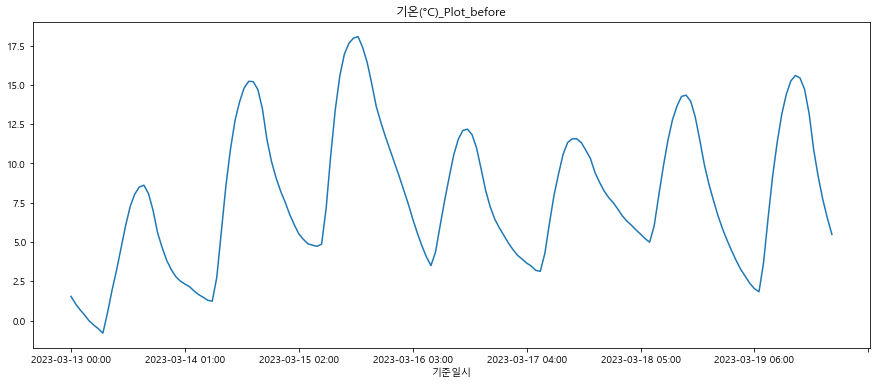

결측치 비율(%) :  0.0



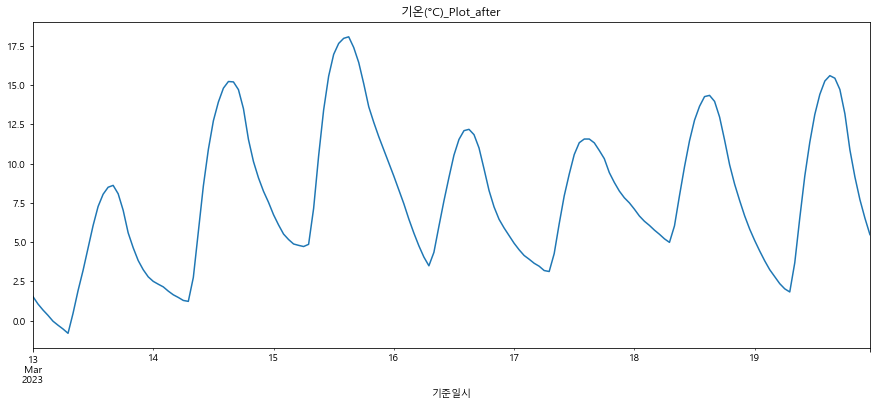

  7%|████▎                                                            | 1/15 [00:01<00:21,  1.55s/it]

결측치 비율(%) :  0.0



강수량(mm)     강수량(mm)
count  18.000000  168.000000
mean    0.512600    0.054921
std     0.919697    0.333752
min     0.000000    0.000000
25%     0.000000    0.000000
50%     0.029167    0.000000
75%     0.440625    0.000000
max     2.814286    2.814286

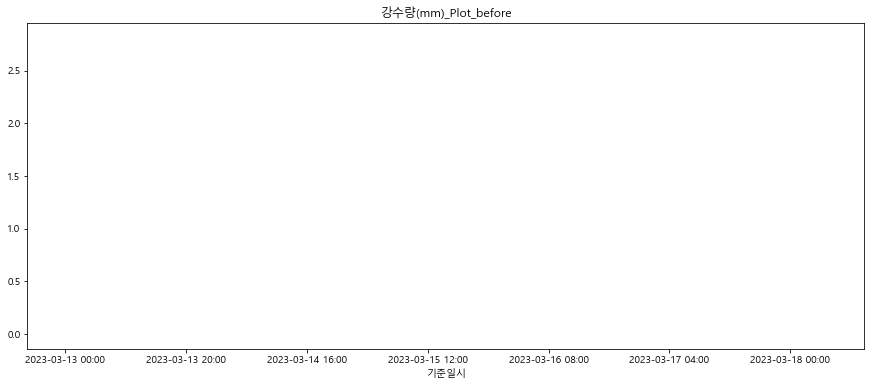

결측치 비율(%) :  89.29



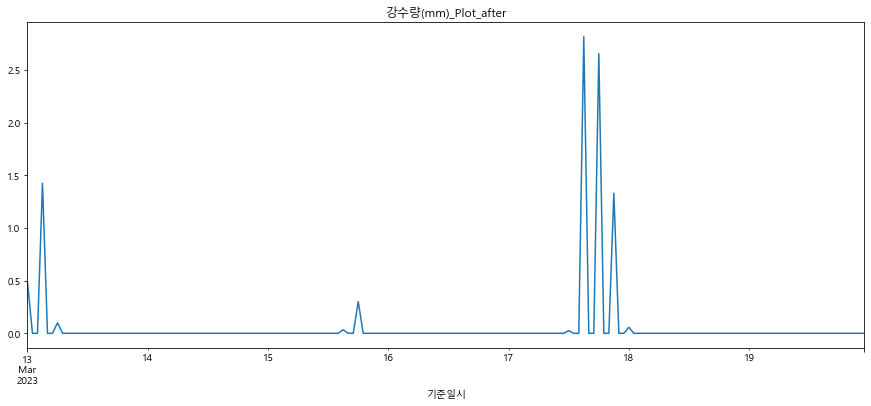

 13%|████████▋                                                        | 2/15 [00:02<00:17,  1.31s/it]

결측치 비율(%) :  0.0



풍속(m/s)     풍속(m/s)
count  168.000000  168.000000
mean     2.271216    2.271216
std      0.968046    0.968046
min      0.849474    0.849474
25%      1.388158    1.388158
50%      2.064211    2.064211
75%      3.043947    3.043947
max      4.997895    4.997895

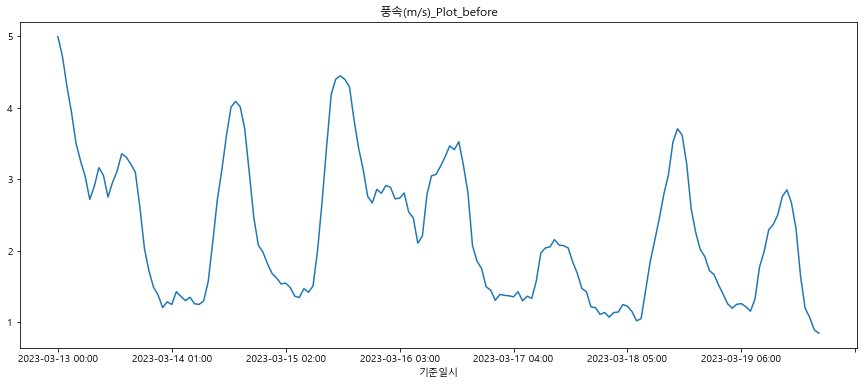

결측치 비율(%) :  0.0



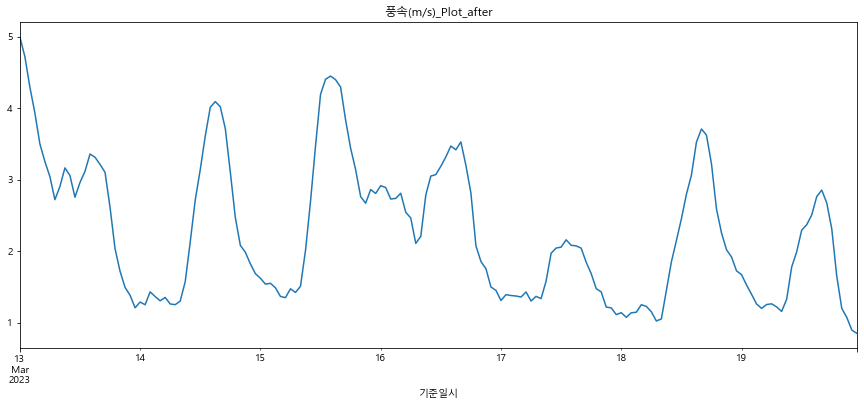

 20%|█████████████                                                    | 3/15 [00:03<00:14,  1.19s/it]

결측치 비율(%) :  0.0



풍향(16방위)    풍향(16방위)
count  168.000000  168.000000
mean   186.498747  186.498747
std     48.188303   48.188303
min    107.894737  107.894737
25%    141.157895  141.157895
50%    187.631579  187.631579
75%    231.289474  231.289474
max    288.842105  288.842105

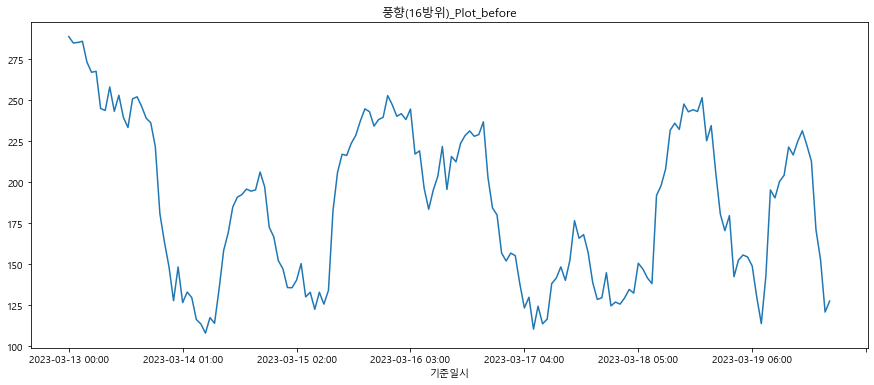

결측치 비율(%) :  0.0



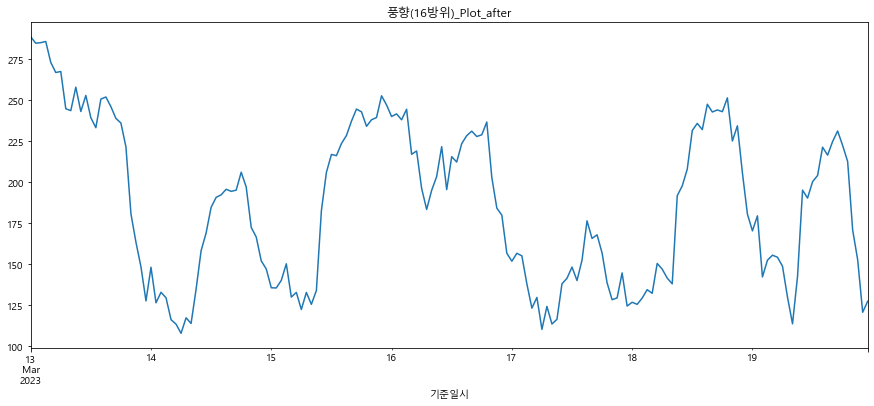

 27%|█████████████████▎                                               | 4/15 [00:05<00:14,  1.28s/it]

결측치 비율(%) :  0.0



습도(%)       습도(%)
count  168.000000  168.000000
mean    48.679088   48.679088
std     15.281598   15.281598
min     19.414894   19.414894
25%     36.174703   36.174703
50%     49.614446   49.614446
75%     61.957895   61.957895
max     81.021277   81.021277

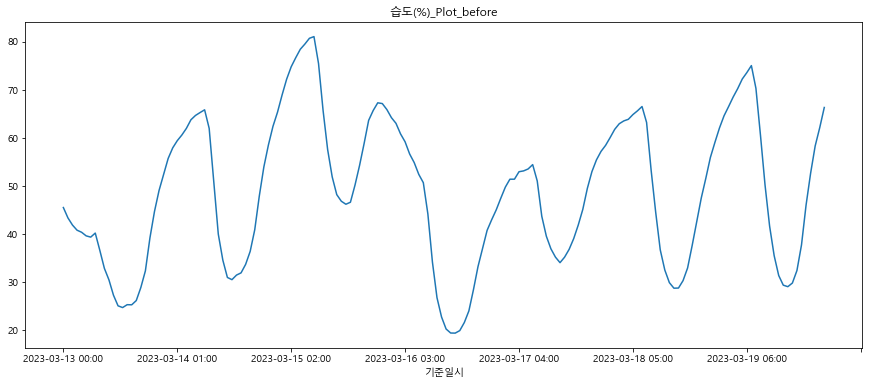

결측치 비율(%) :  0.0



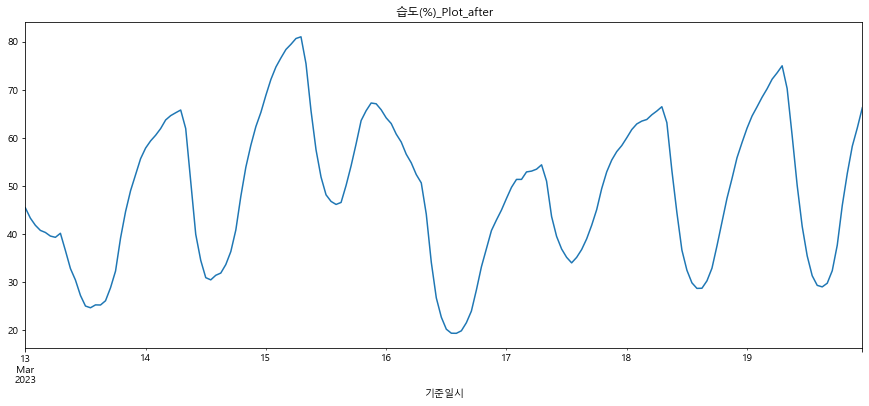

 33%|█████████████████████▋                                           | 5/15 [00:06<00:12,  1.28s/it]

결측치 비율(%) :  0.0



증기압(hPa)    증기압(hPa)
count  168.000000  168.000000
mean     5.183626    5.183626
std      1.805848    1.805848
min      2.352632    2.352632
25%      4.202086    4.202086
50%      5.025672    5.025672
75%      5.990526    5.990526
max      9.843617    9.843617

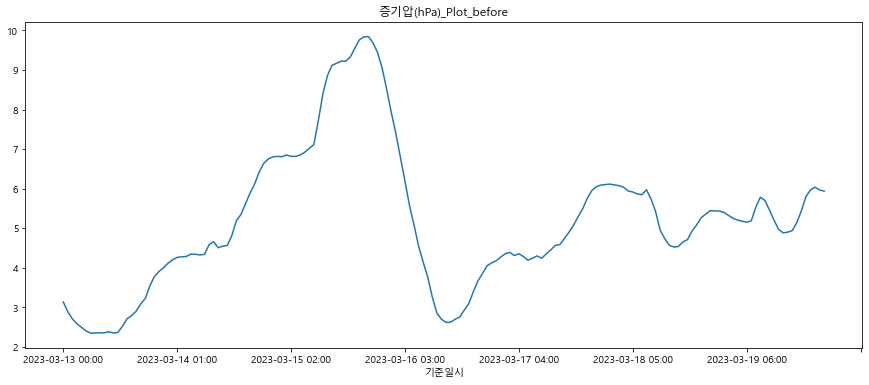

결측치 비율(%) :  0.0



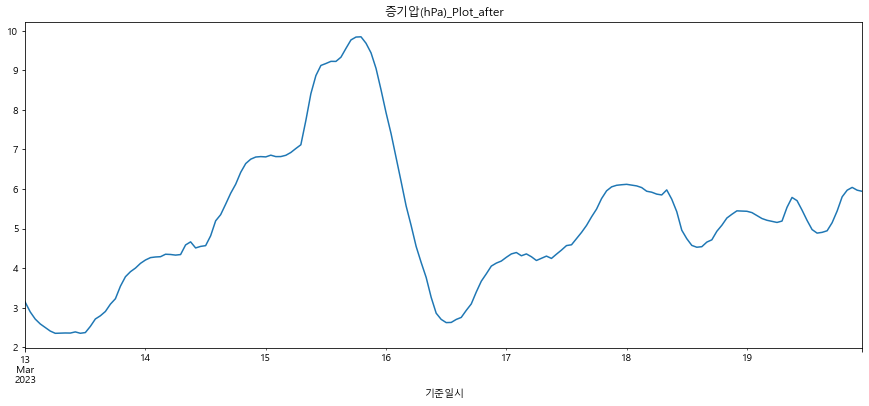

 40%|██████████████████████████                                       | 6/15 [00:07<00:11,  1.24s/it]

결측치 비율(%) :  0.0



이슬점온도(°C)   이슬점온도(°C)
count  168.000000  168.000000
mean    -3.624706   -3.624706
std      4.819362    4.819362
min    -13.131579  -13.131579
25%     -5.696011   -5.696011
50%     -3.566842   -3.566842
75%     -0.703421   -0.703421
max      6.373404    6.373404

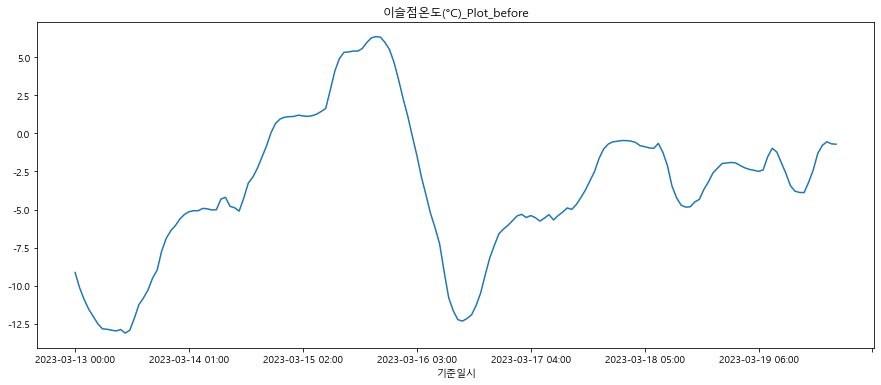

결측치 비율(%) :  0.0



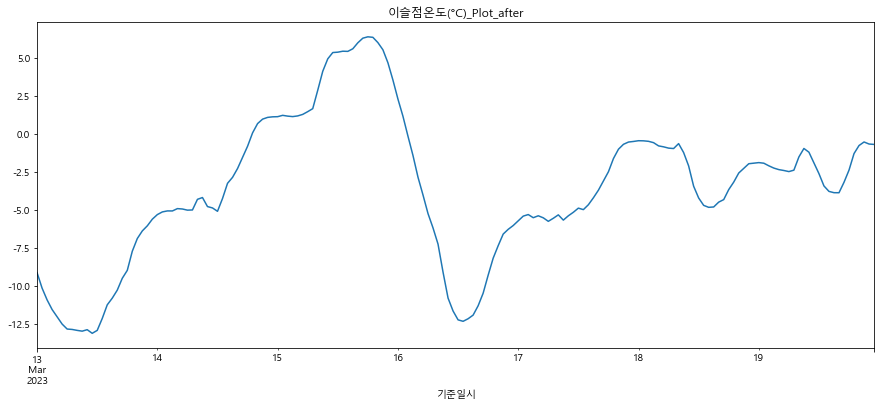

 47%|██████████████████████████████▎                                  | 7/15 [00:08<00:09,  1.16s/it]

결측치 비율(%) :  0.0



현지기압(hPa)    현지기압(hPa)
count   168.000000   168.000000
mean   1009.043636  1009.043636
std       3.089815     3.089815
min    1004.270526  1004.270526
25%    1006.860000  1006.860000
50%    1008.051053  1008.051053
75%    1011.156053  1011.156053
max    1016.331579  1016.331579

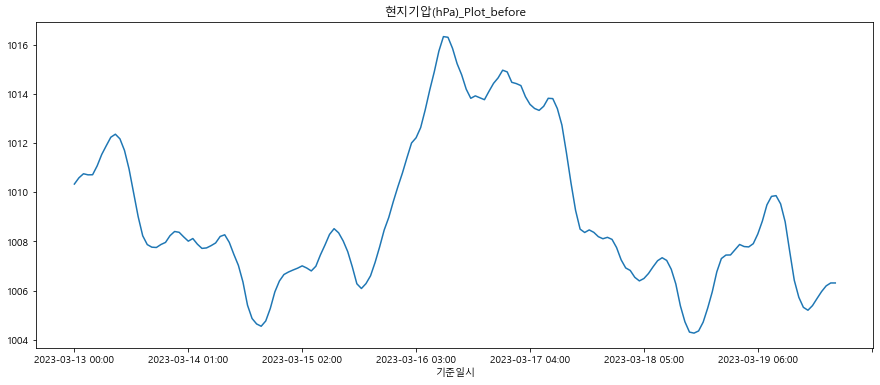

결측치 비율(%) :  0.0



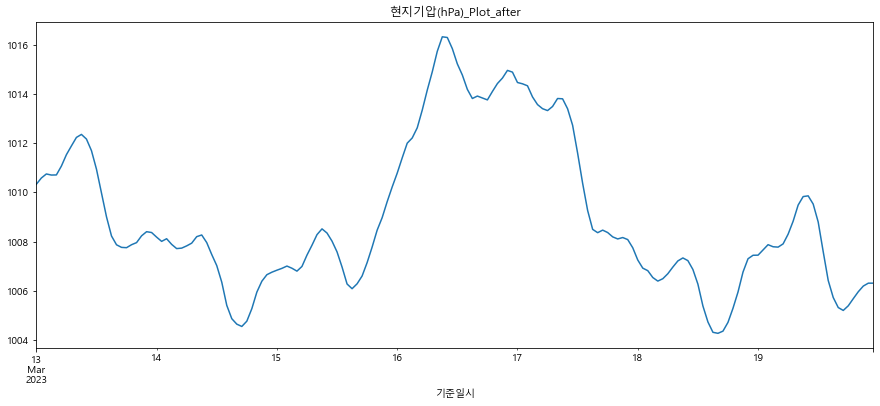

 53%|██████████████████████████████████▋                              | 8/15 [00:09<00:07,  1.12s/it]

결측치 비율(%) :  0.0



해면기압(hPa)    해면기압(hPa)
count   168.000000   168.000000
mean   1021.615224  1021.615224
std       3.233712     3.233712
min    1016.446316  1016.446316
25%    1019.382105  1019.382105
50%    1020.678421  1020.678421
75%    1023.979474  1023.979474
max    1029.112632  1029.112632

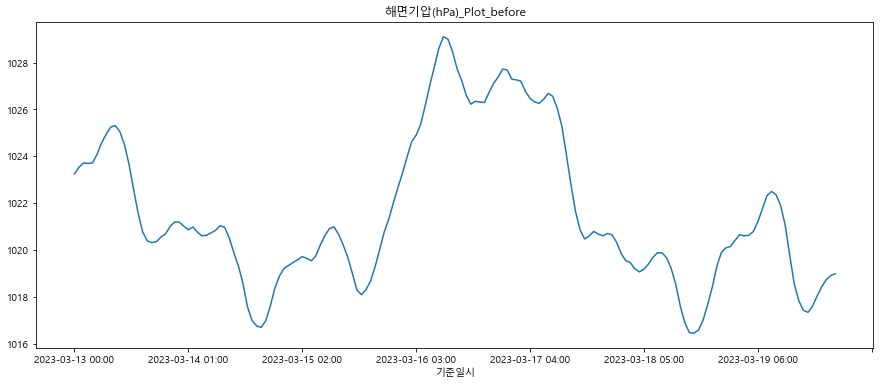

결측치 비율(%) :  0.0



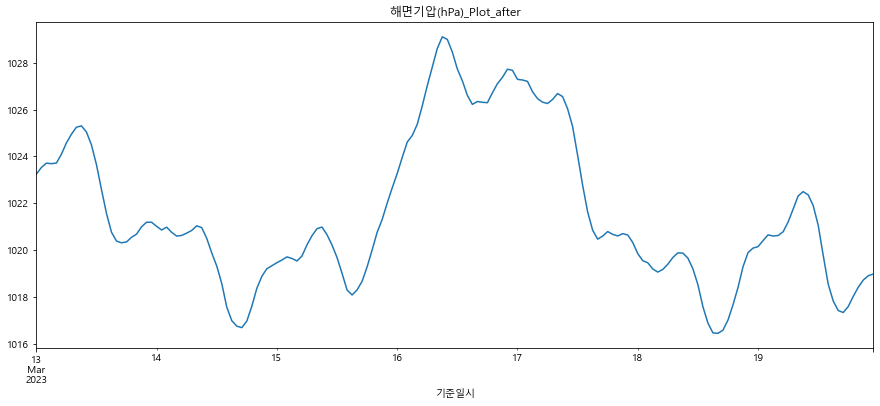

 60%|███████████████████████████████████████                          | 9/15 [00:10<00:06,  1.11s/it]

결측치 비율(%) :  0.0



적설(cm)      적설(cm)
count  12.000000  168.000000
mean    1.347222    0.096230
std     0.803837    0.404555
min     0.000000    0.000000
25%     0.687500    0.000000
50%     1.350000    0.000000
75%     1.975000    0.000000
max     2.400000    2.400000

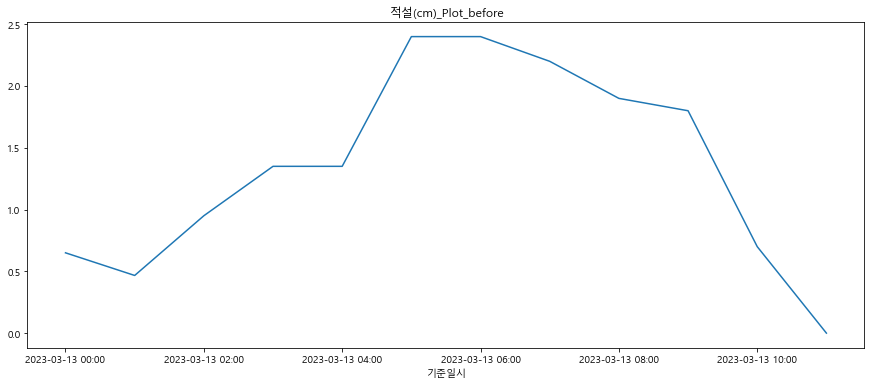

결측치 비율(%) :  92.86



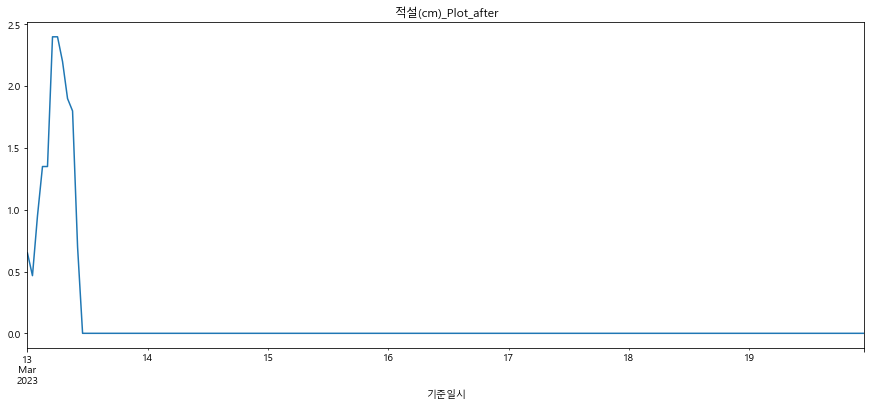

 67%|██████████████████████████████████████████▋                     | 10/15 [00:11<00:05,  1.05s/it]

결측치 비율(%) :  0.0



지면온도(°C)    지면온도(°C)
count  168.000000  168.000000
mean     9.769415    9.769415
std      7.939617    7.939617
min     -1.426316   -1.426316
25%      3.524211    3.524211
50%      6.940000    6.940000
75%     16.255789   16.255789
max     29.329474   29.329474

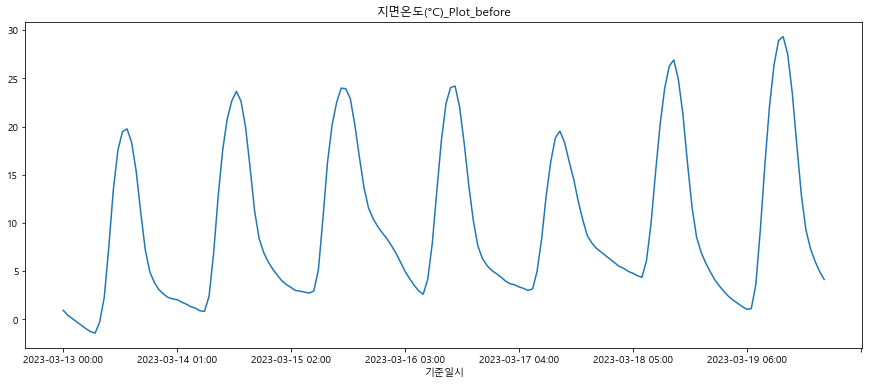

결측치 비율(%) :  0.0



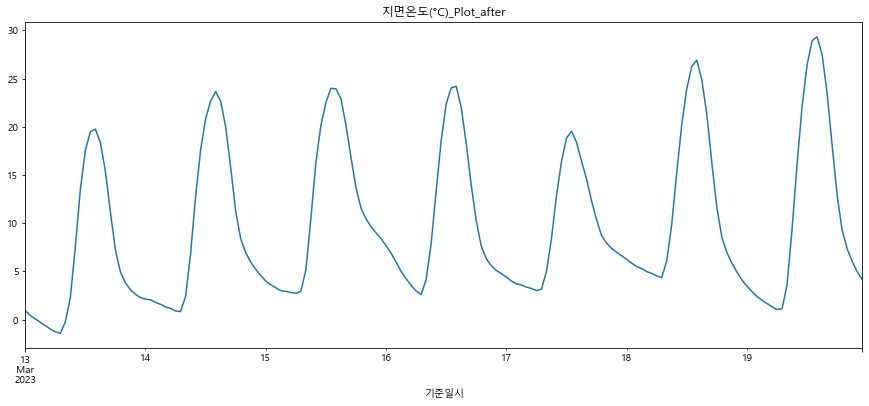

 73%|██████████████████████████████████████████████▉                 | 11/15 [00:12<00:04,  1.11s/it]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count    168.000000    168.000000
mean       9.363608      9.363608
std        3.118306      3.118306
min        3.527586      3.527586
25%        7.016379      7.016379
50%        8.877586      8.877586
75%       11.701724     11.701724
max       16.531034     16.531034

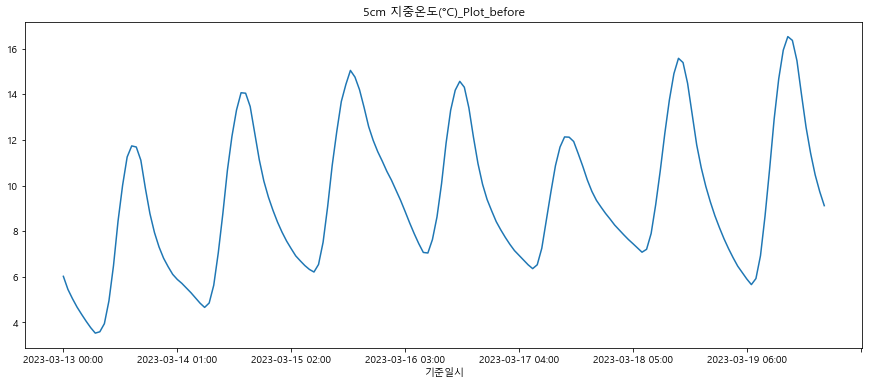

결측치 비율(%) :  0.0



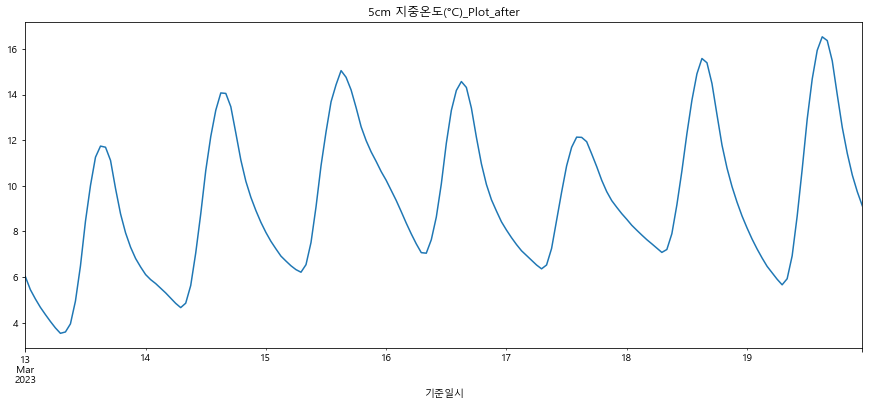

 80%|███████████████████████████████████████████████████▏            | 12/15 [00:14<00:03,  1.12s/it]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count     168.000000     168.000000
mean        9.223132       9.223132
std         2.018695       2.018695
min         5.175862       5.175862
25%         7.765517       7.765517
50%         9.077586       9.077586
75%        10.768103      10.768103
max        13.620690      13.620690

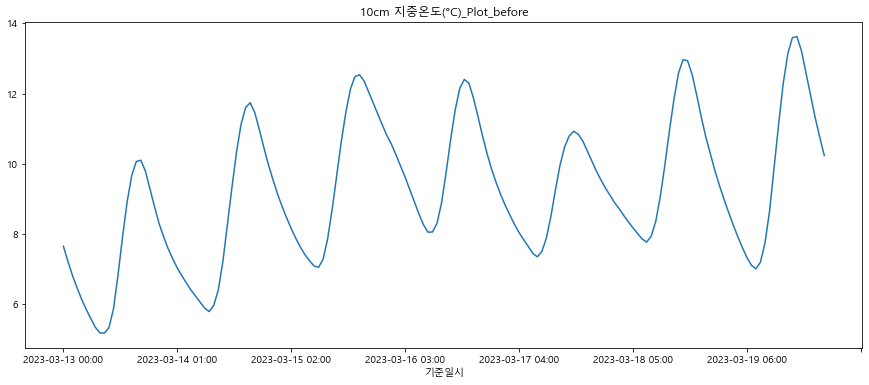

결측치 비율(%) :  0.0



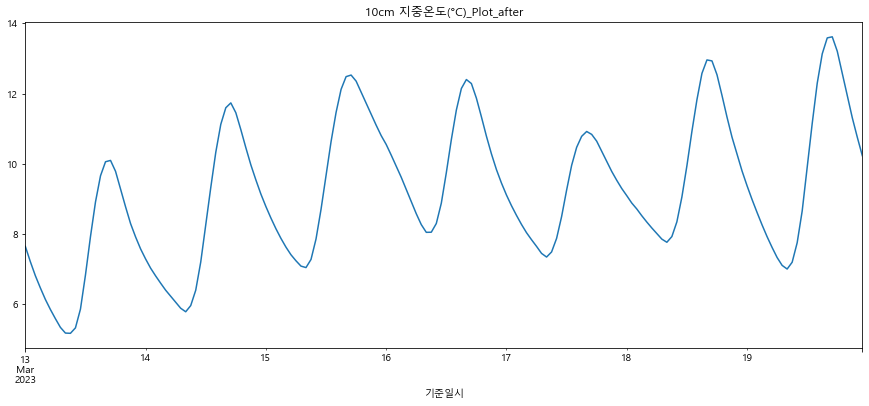

 87%|███████████████████████████████████████████████████████▍        | 13/15 [00:15<00:02,  1.14s/it]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count     168.000000     168.000000
mean        9.231424       9.231424
std         1.056905       1.056905
min         7.020690       7.020690
25%         8.526724       8.526724
50%         9.196552       9.196552
75%         9.965517       9.965517
max        11.379310      11.379310

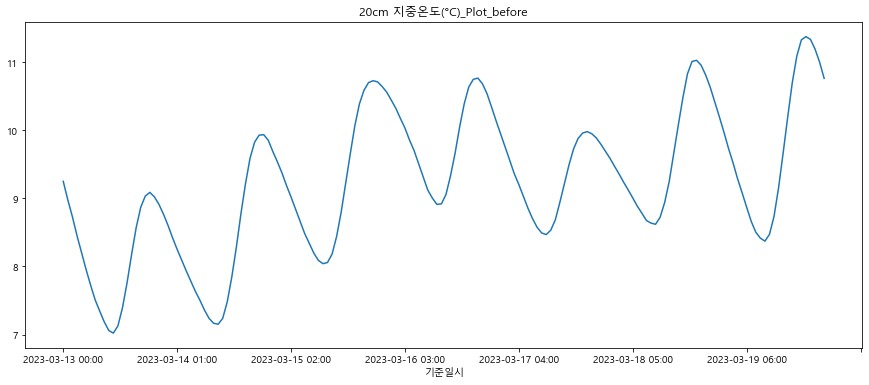

결측치 비율(%) :  0.0



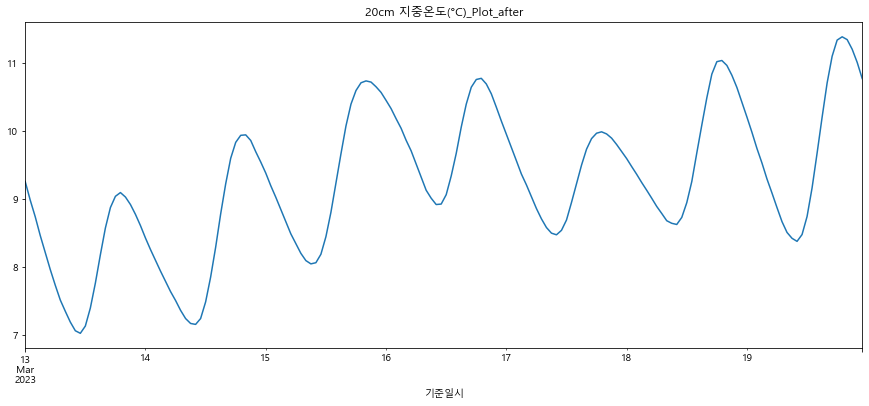

 93%|███████████████████████████████████████████████████████████▋    | 14/15 [00:16<00:01,  1.11s/it]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count     168.000000     168.000000
mean        9.220710       9.220710
std         0.614811       0.614811
min         7.858621       7.858621
25%         8.842241       8.842241
50%         9.255172       9.255172
75%         9.648276       9.648276
max        10.468966      10.468966

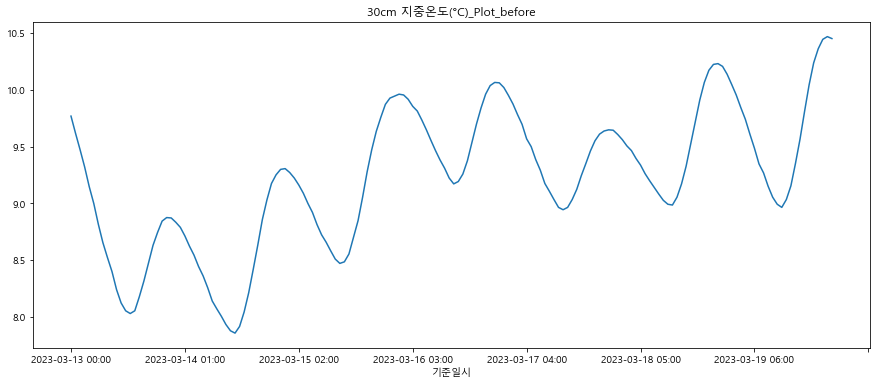

결측치 비율(%) :  0.0



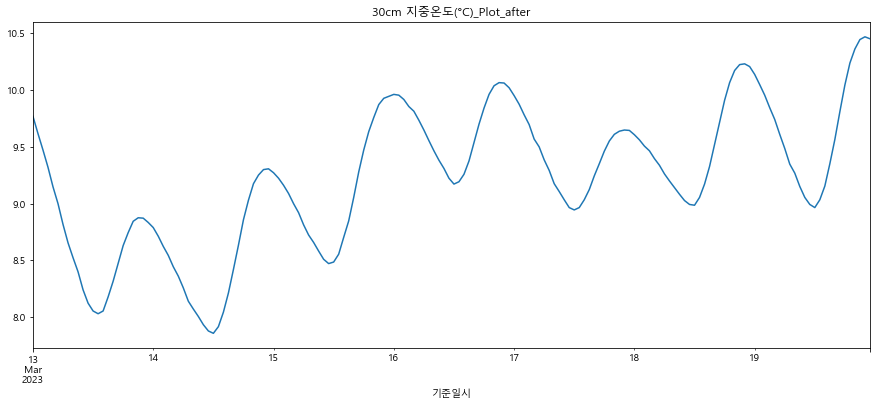

100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.16s/it]

결측치 비율(%) :  0.0



In [42]:
compare_describe(lgbm_test, lgbm_test_fill.set_index('기준일시'))

In [45]:
test.index = pd.to_datetime(test.index)

In [47]:
# 최종 5분 데이터로 만들기

lgbm_test_merge = pd.merge(test, lgbm_test_fill, on='기준일시', how='left')
lgbm_test_merge.set_index('기준일시', inplace=True)

  0%|                                                                         | 0/16 [00:00<?, ?it/s]

현재수요(MW)     현재수요(MW)
count   2016.00000   2016.00000
mean   62007.74752  62007.74752
std     6714.17299   6714.17299
min    43006.00000  43006.00000
25%    58223.25000  58223.25000
50%    61828.00000  61828.00000
75%    67616.75000  67616.75000
max    73383.00000  73383.00000

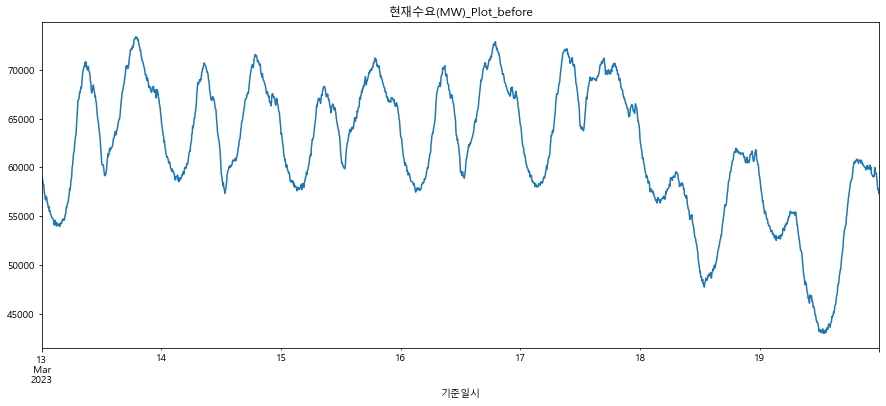

결측치 비율(%) :  0.0



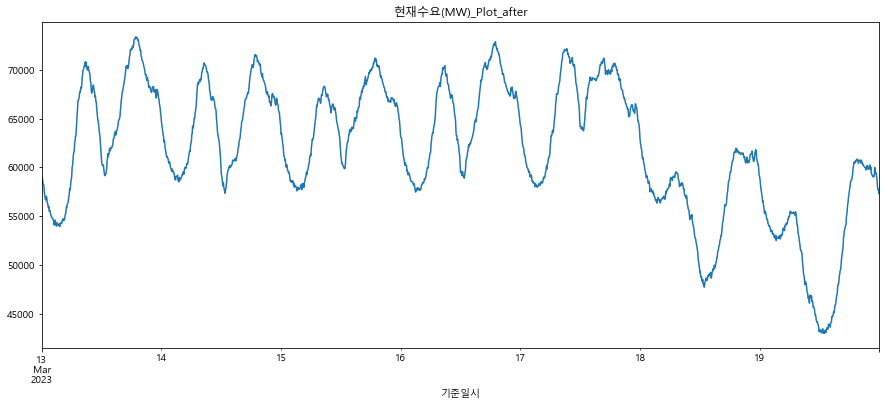

  6%|████                                                             | 1/16 [00:01<00:16,  1.10s/it]

결측치 비율(%) :  0.0



기온(°C)       기온(°C)
count  168.000000  2016.000000
mean     7.872297     7.883049
std      4.503437     4.457324
min     -0.797895    -0.797895
25%      4.595263     4.655175
50%      7.474737     7.407588
75%     11.337632    11.317227
max     18.068421    18.068421

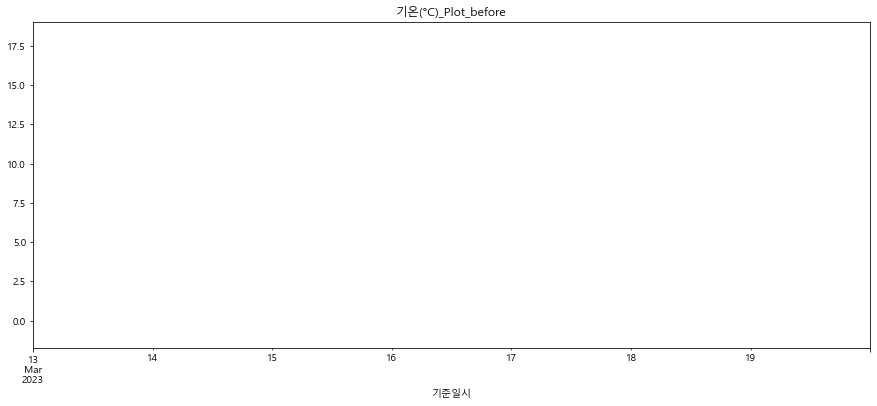

결측치 비율(%) :  91.67



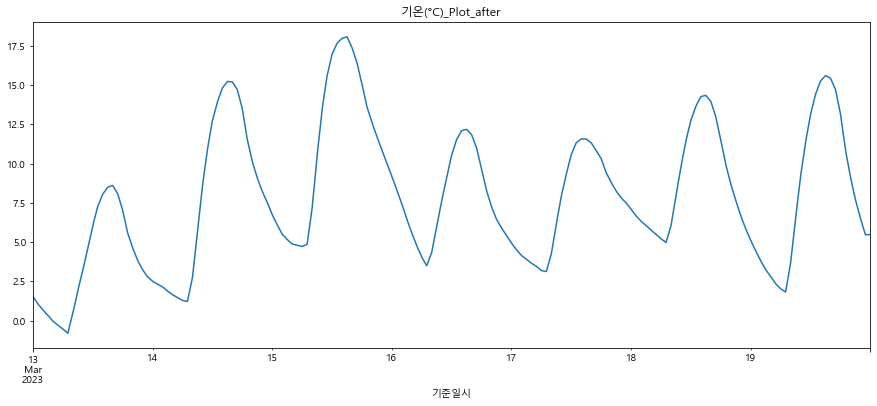

 12%|████████▏                                                        | 2/16 [00:02<00:20,  1.43s/it]

결측치 비율(%) :  0.0



강수량(mm)      강수량(mm)
count  168.000000  2016.000000
mean     0.054921     0.053591
std      0.333752     0.269894
min      0.000000     0.000000
25%      0.000000     0.000000
50%      0.000000     0.000000
75%      0.000000     0.000000
max      2.814286     2.814286

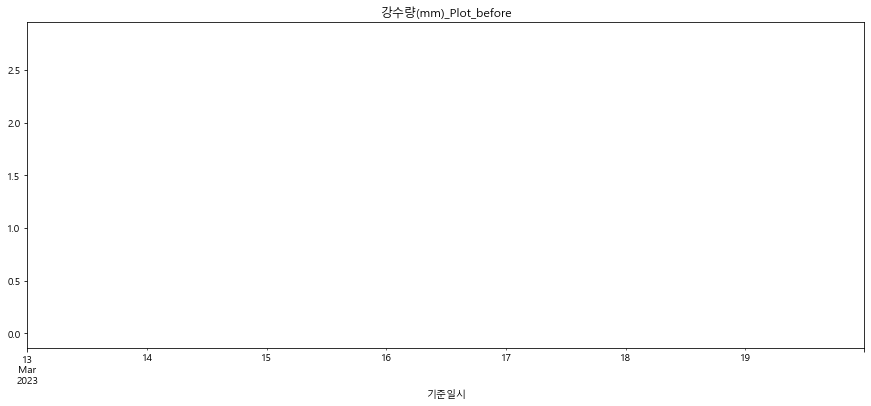

결측치 비율(%) :  91.67



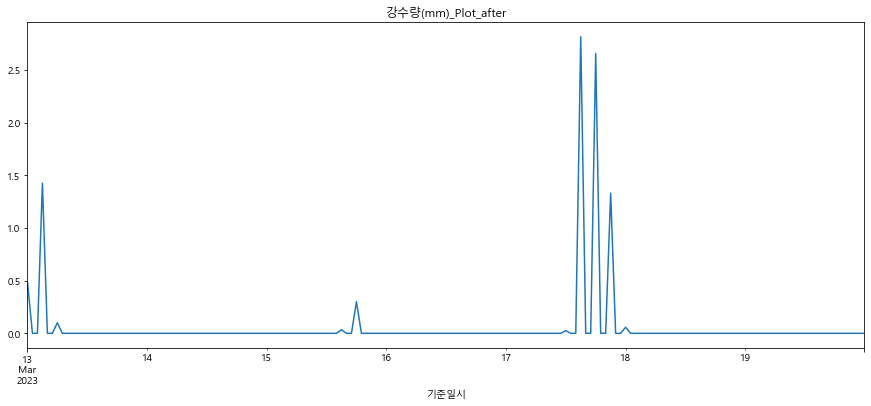

 19%|████████████▏                                                    | 3/16 [00:03<00:15,  1.21s/it]

결측치 비율(%) :  0.0



풍속(m/s)      풍속(m/s)
count  168.000000  2016.000000
mean     2.271216     2.259898
std      0.968046     0.951336
min      0.849474     0.849474
25%      1.388158     1.384408
50%      2.064211     2.058421
75%      3.043947     2.961689
max      4.997895     4.997895

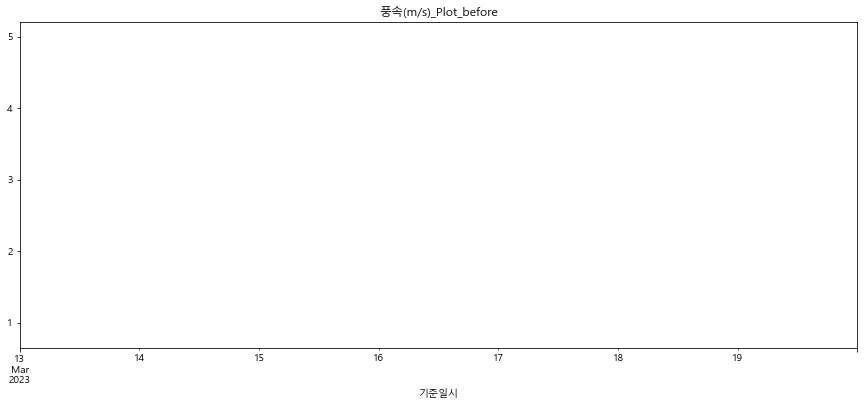

결측치 비율(%) :  91.67



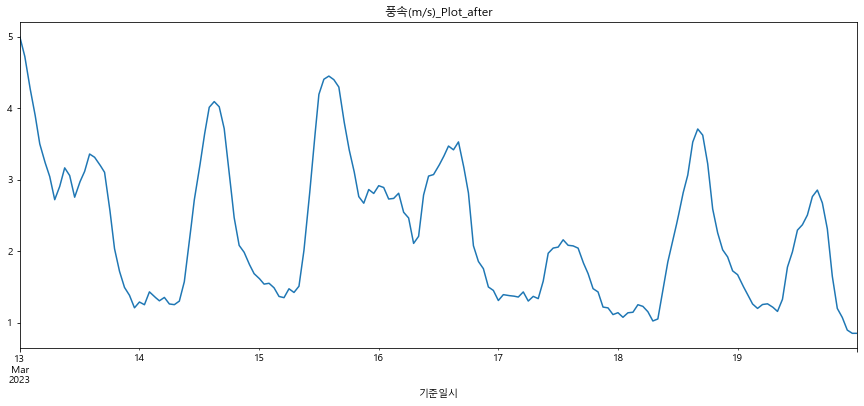

 25%|████████████████▎                                                | 4/16 [00:04<00:14,  1.18s/it]

결측치 비율(%) :  0.0



풍향(16방위)     풍향(16방위)
count  168.000000  2016.000000
mean   186.498747   186.058506
std     48.188303    47.452931
min    107.894737   107.894737
25%    141.157895   141.118421
50%    187.631579   188.092105
75%    231.289474   229.756579
max    288.842105   288.842105

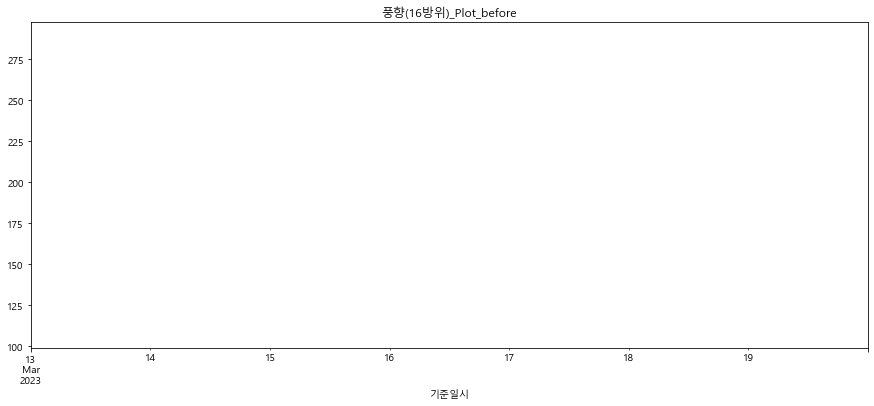

결측치 비율(%) :  91.67



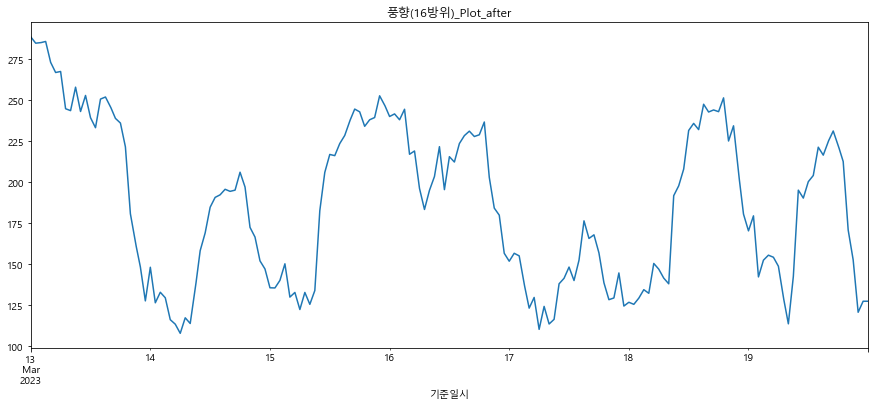

 31%|████████████████████▎                                            | 5/16 [00:06<00:12,  1.18s/it]

결측치 비율(%) :  0.0



습도(%)        습도(%)
count  168.000000  2016.000000
mean    48.679088    48.735805
std     15.281598    15.183662
min     19.414894    19.414894
25%     36.174703    35.821365
50%     49.614446    49.318860
75%     61.957895    61.726474
max     81.021277    81.021277

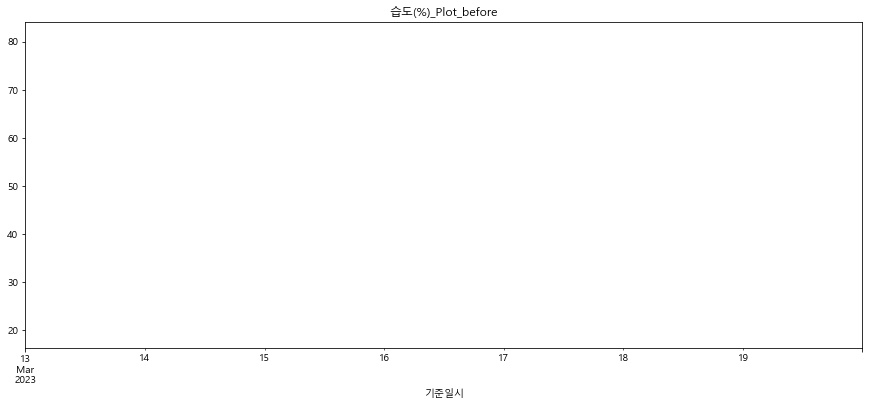

결측치 비율(%) :  91.67



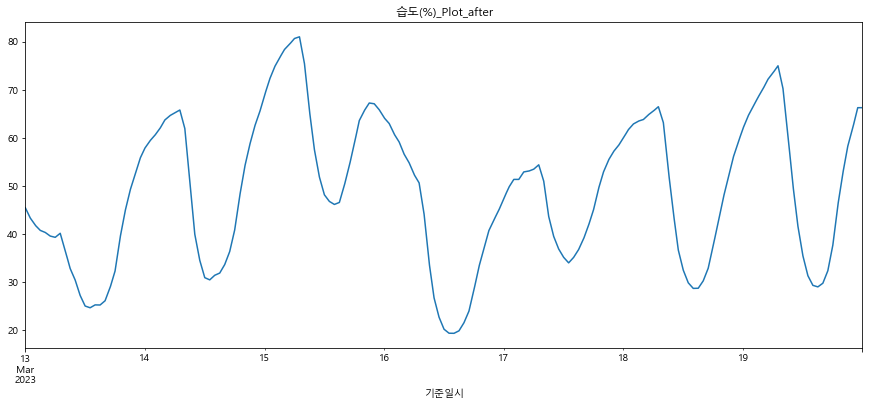

 38%|████████████████████████▍                                        | 6/16 [00:07<00:11,  1.17s/it]

결측치 비율(%) :  0.0



증기압(hPa)     증기압(hPa)
count  168.000000  2016.000000
mean     5.183626     5.191265
std      1.805848     1.795988
min      2.352632     2.352632
25%      4.202086     4.224998
50%      5.025672     5.036405
75%      5.990526     5.996557
max      9.843617     9.843617

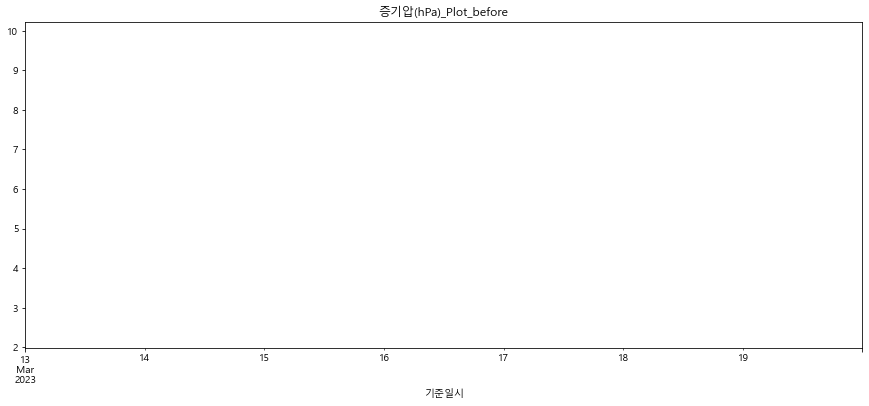

결측치 비율(%) :  91.67



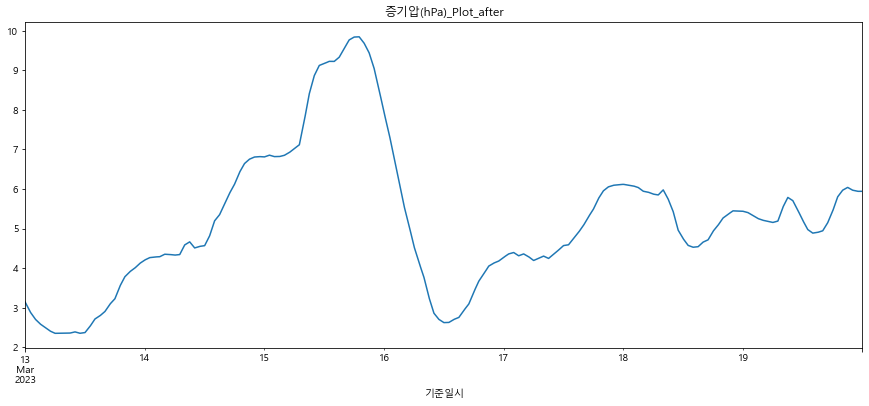

 44%|████████████████████████████▍                                    | 7/16 [00:08<00:10,  1.17s/it]

결측치 비율(%) :  0.0



이슬점온도(°C)    이슬점온도(°C)
count  168.000000  2016.000000
mean    -3.624706    -3.601683
std      4.819362     4.793686
min    -13.131579   -13.131579
25%     -5.696011    -5.653169
50%     -3.566842    -3.523421
75%     -0.703421    -0.705263
max      6.373404     6.373404

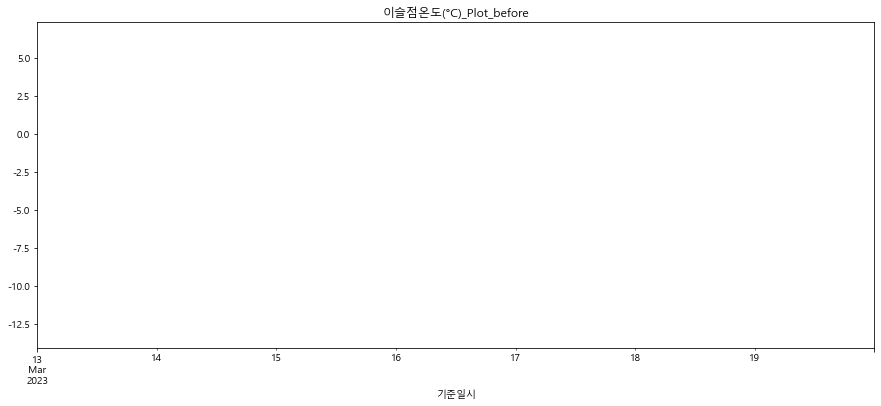

결측치 비율(%) :  91.67



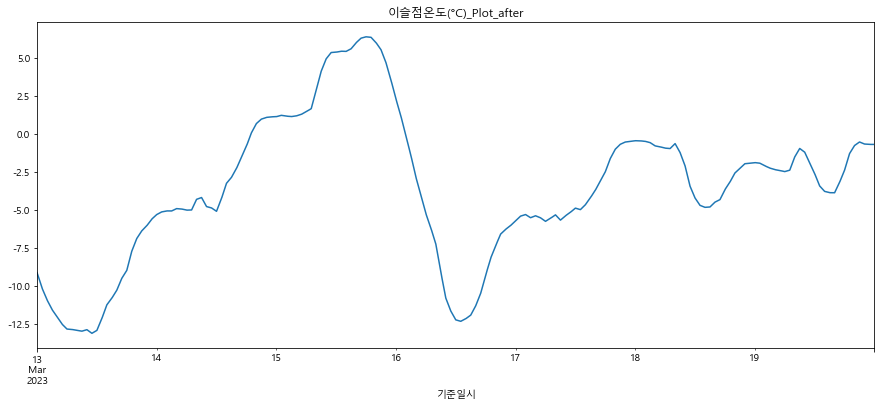

 50%|████████████████████████████████▌                                | 8/16 [00:09<00:09,  1.17s/it]

결측치 비율(%) :  0.0



현지기압(hPa)    현지기압(hPa)
count   168.000000  2016.000000
mean   1009.043636  1009.032660
std       3.089815     3.078516
min    1004.270526  1004.270526
25%    1006.860000  1006.848750
50%    1008.051053  1008.064561
75%    1011.156053  1011.198596
max    1016.331579  1016.331579

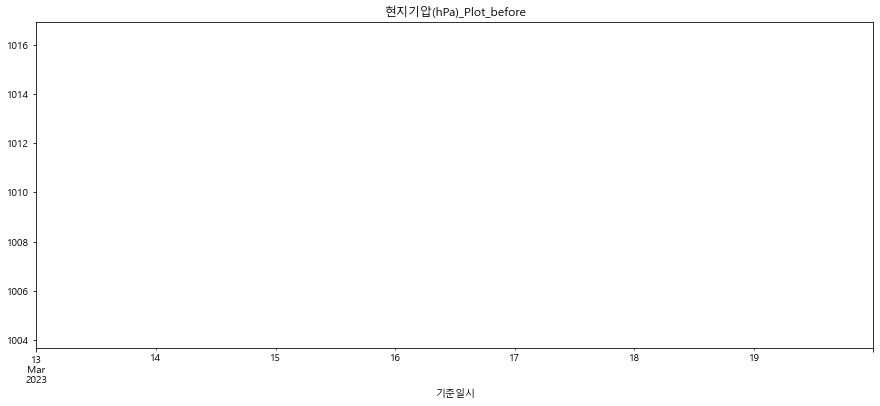

결측치 비율(%) :  91.67



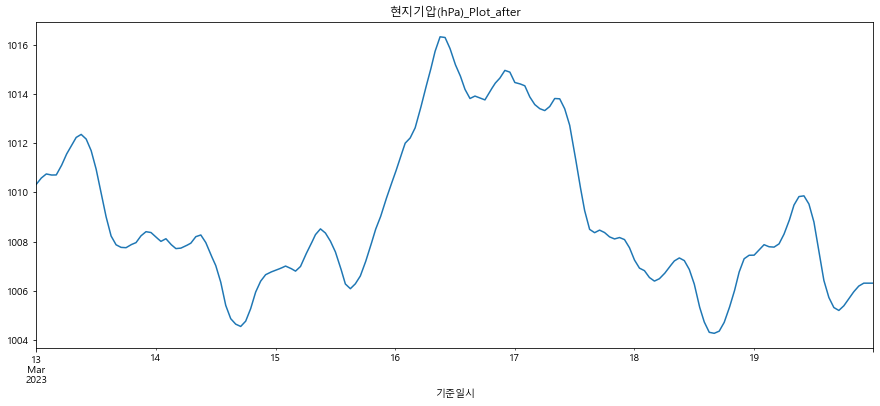

 56%|████████████████████████████████████▌                            | 9/16 [00:10<00:08,  1.21s/it]

결측치 비율(%) :  0.0



해면기압(hPa)    해면기압(hPa)
count   168.000000  2016.000000
mean   1021.615224  1021.603587
std       3.233712     3.220618
min    1016.446316  1016.446316
25%    1019.382105  1019.385702
50%    1020.678421  1020.670921
75%    1023.979474  1023.959211
max    1029.112632  1029.112632

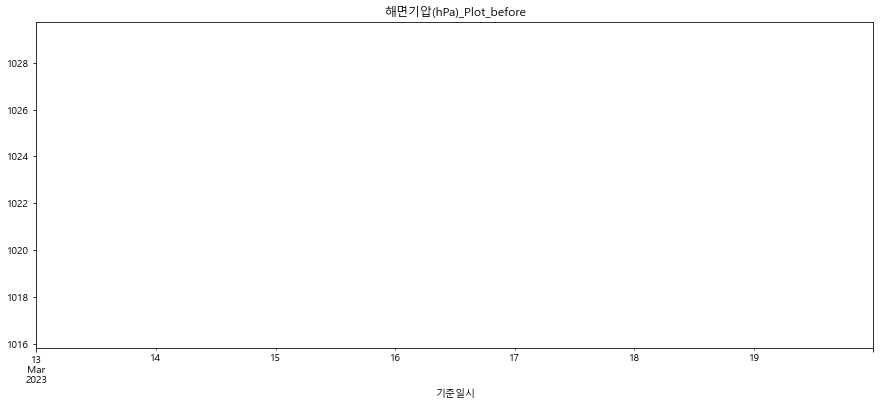

결측치 비율(%) :  91.67



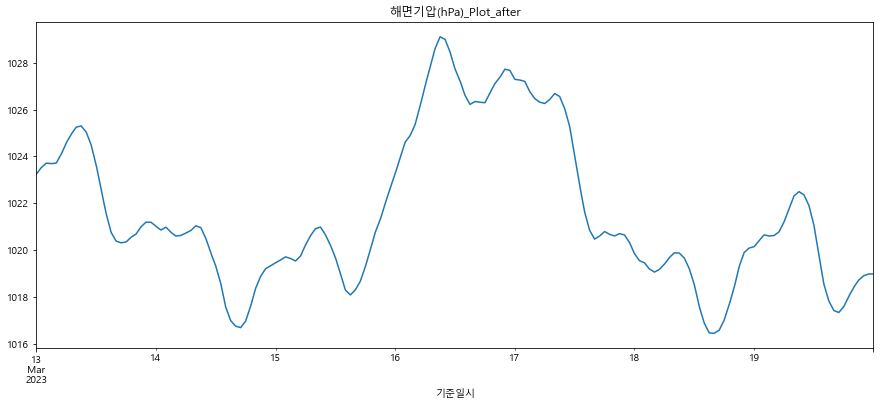

 62%|████████████████████████████████████████                        | 10/16 [00:11<00:06,  1.13s/it]

결측치 비율(%) :  0.0



적설(cm)       적설(cm)
count  168.000000  2016.000000
mean     0.096230     0.094457
std      0.404555     0.398290
min      0.000000     0.000000
25%      0.000000     0.000000
50%      0.000000     0.000000
75%      0.000000     0.000000
max      2.400000     2.400000

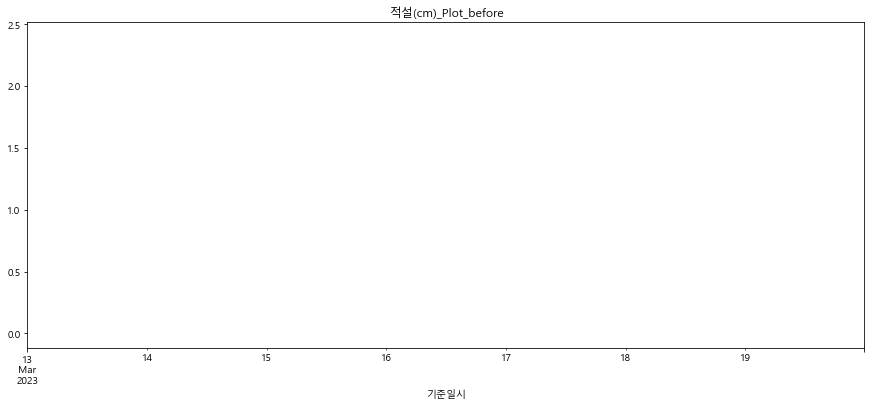

결측치 비율(%) :  91.67



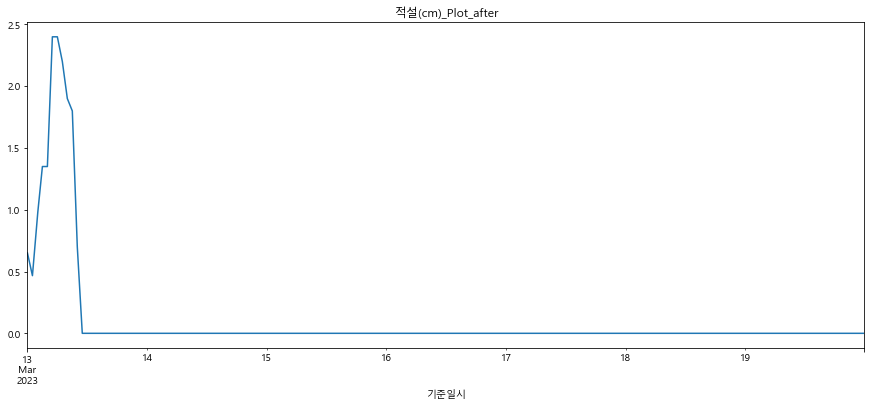

 69%|████████████████████████████████████████████                    | 11/16 [00:12<00:05,  1.11s/it]

결측치 비율(%) :  0.0



지면온도(°C)     지면온도(°C)
count  168.000000  2016.000000
mean     9.769415     9.778154
std      7.939617     7.842986
min     -1.426316    -1.426316
25%      3.524211     3.553289
50%      6.940000     6.912807
75%     16.255789    16.098728
max     29.329474    29.329474

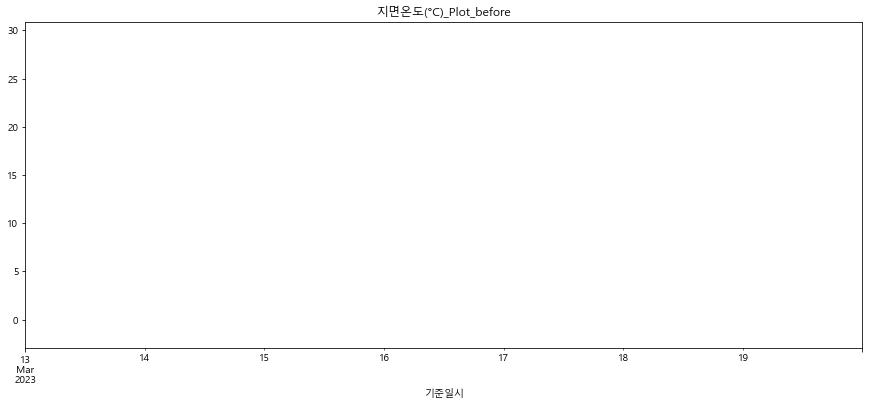

결측치 비율(%) :  91.67



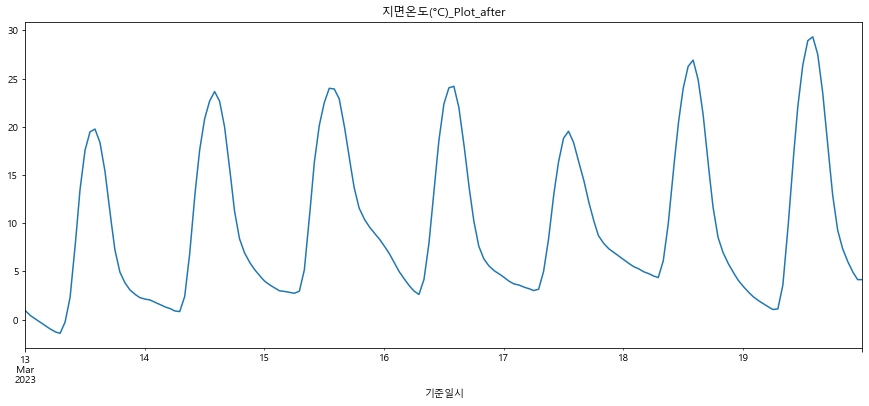

 75%|████████████████████████████████████████████████                | 12/16 [00:14<00:04,  1.14s/it]

결측치 비율(%) :  0.0



5cm 지중온도(°C)  5cm 지중온도(°C)
count    168.000000   2016.000000
mean       9.363608      9.372066
std        3.118306      3.085517
min        3.527586      3.527586
25%        7.016379      7.050934
50%        8.877586      8.974138
75%       11.701724     11.661638
max       16.531034     16.531034

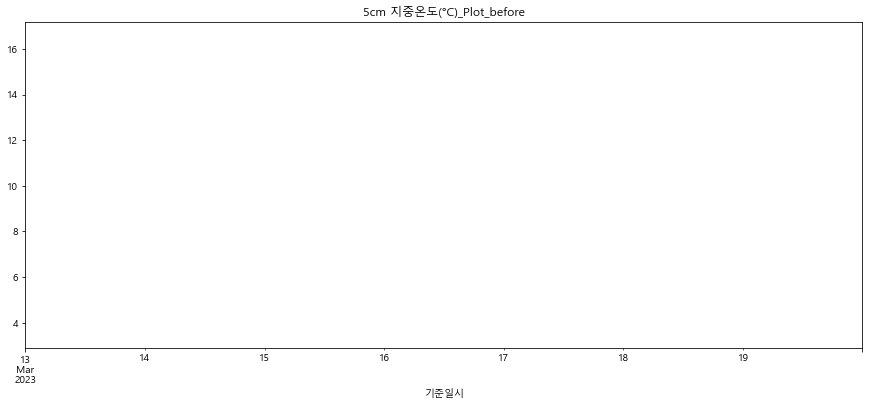

결측치 비율(%) :  91.67



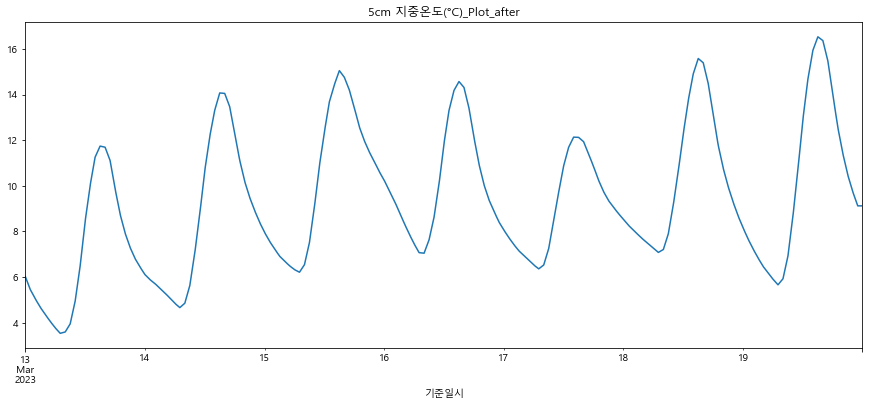

 81%|████████████████████████████████████████████████████            | 13/16 [00:15<00:03,  1.11s/it]

결측치 비율(%) :  0.0



10cm 지중온도(°C)  10cm 지중온도(°C)
count     168.000000    2016.000000
mean        9.223132       9.230178
std         2.018695       2.001979
min         5.175862       5.175862
25%         7.765517       7.755172
50%         9.077586       9.092529
75%        10.768103      10.760273
max        13.620690      13.620690

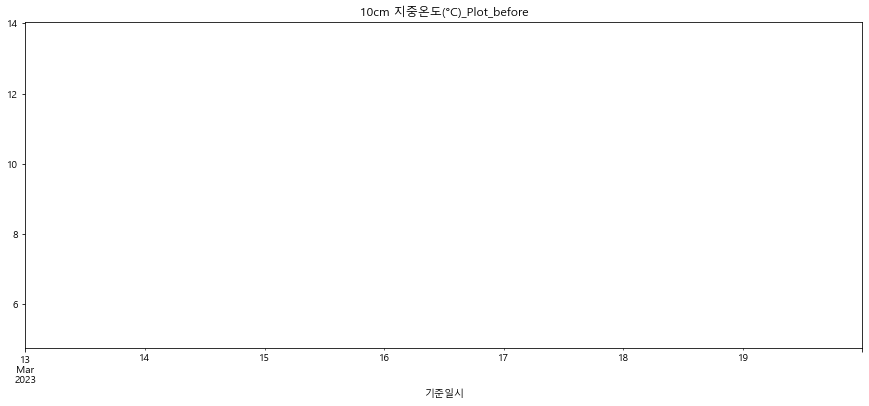

결측치 비율(%) :  91.67



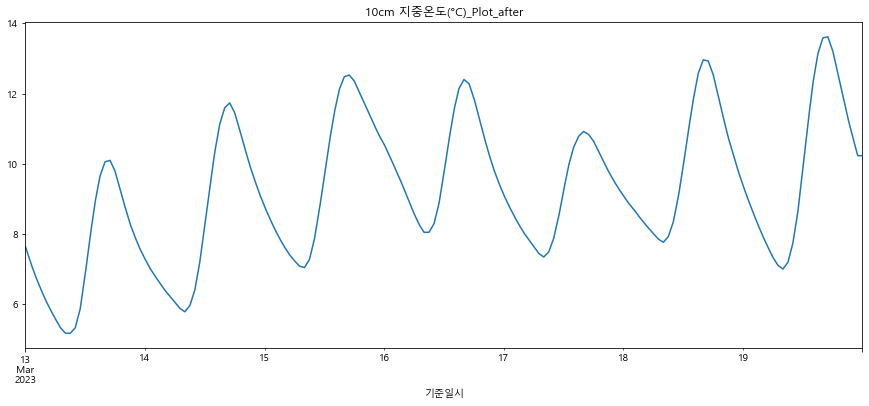

 88%|████████████████████████████████████████████████████████        | 14/16 [00:16<00:02,  1.07s/it]

결측치 비율(%) :  0.0



20cm 지중온도(°C)  20cm 지중온도(°C)
count     168.000000    2016.000000
mean        9.231424       9.235554
std         1.056905       1.053274
min         7.020690       7.020690
25%         8.526724       8.538147
50%         9.196552       9.165517
75%         9.965517       9.964440
max        11.379310      11.379310

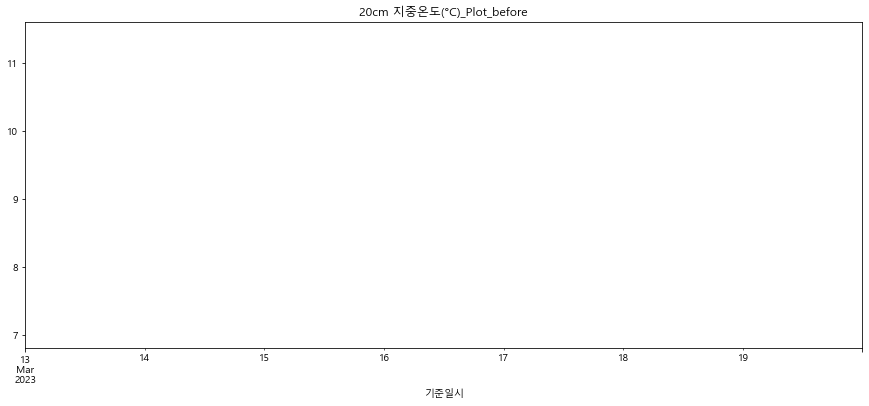

결측치 비율(%) :  91.67



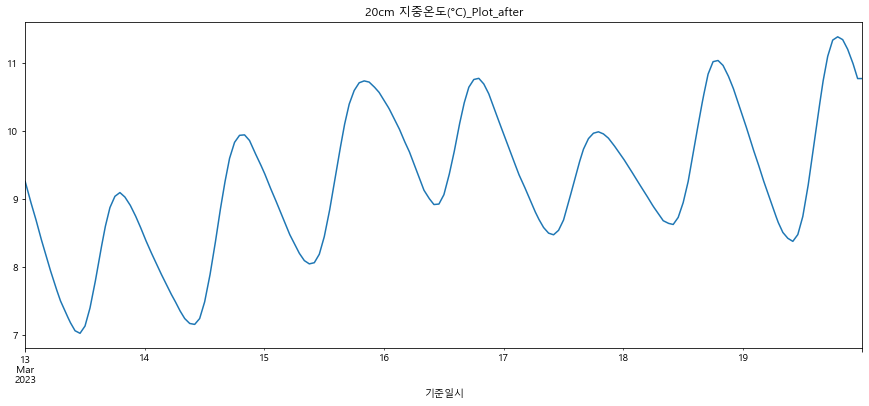

 94%|████████████████████████████████████████████████████████████    | 15/16 [00:17<00:01,  1.08s/it]

결측치 비율(%) :  0.0



30cm 지중온도(°C)  30cm 지중온도(°C)
count     168.000000    2016.000000
mean        9.220710       9.222573
std         0.614811       0.614249
min         7.858621       7.858621
25%         8.842241       8.835776
50%         9.255172       9.246121
75%         9.648276       9.649138
max        10.468966      10.468966

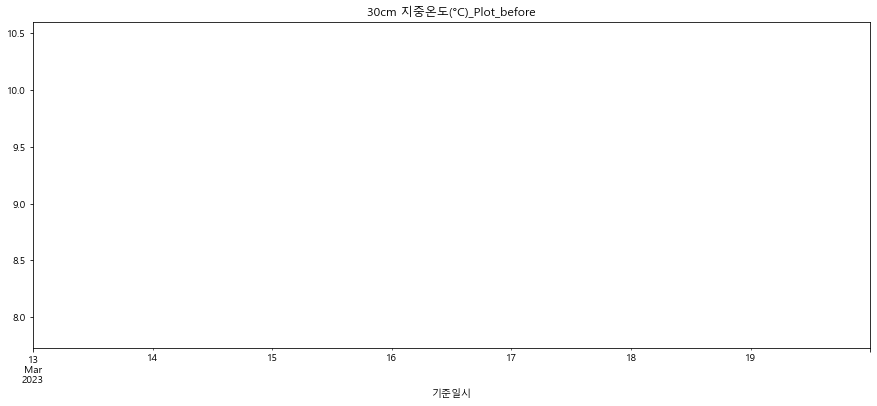

결측치 비율(%) :  91.67



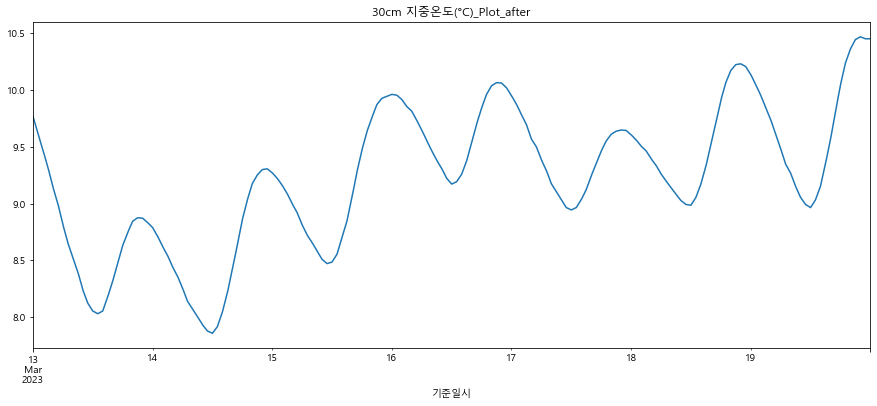

100%|████████████████████████████████████████████████████████████████| 16/16 [00:18<00:00,  1.14s/it]

결측치 비율(%) :  0.0



In [51]:
# 시간별로 있는 데이터를 선형 보간 방법으로 5분 데이터 채우기

ML_merged_linear_interpolate = lgbm_test_merge.copy()

ML_merged_linear_interpolate = ML_merged_linear_interpolate.interpolate()

compare_describe(lgbm_test_merge, ML_merged_linear_interpolate)

In [59]:
ML_merged_linear_interpolate

현재수요(MW)    기온(°C)   강수량(mm)   풍속(m/s)    풍향(16방위)  \
기준일시                                                                      
2023-03-13 00:00:00     58782  1.540000  0.487500  4.997895  288.842105   
2023-03-13 00:05:00     58954  1.500702  0.446875  4.975000  288.517544   
2023-03-13 00:10:00     58711  1.461404  0.406250  4.952105  288.192982   
2023-03-13 00:15:00     58298  1.422105  0.365625  4.929211  287.868421   
2023-03-13 00:20:00     58264  1.382807  0.325000  4.906316  287.543860   
...                       ...       ...       ...       ...         ...   
2023-03-19 23:35:00     58627  5.481053  0.000000  0.849474  127.473684   
2023-03-19 23:40:00     57941  5.481053  0.000000  0.849474  127.473684   
2023-03-19 23:45:00     57726  5.481053  0.000000  0.849474  127.473684   
2023-03-19 23:50:00     57755  5.481053  0.000000  0.849474  127.473684   
2023-03-19 23:55:00     57324  5.481053  0.000000  0.849474  127.473684   

                         습도(%)  증기압(hPa)  이슬점온도(°C)    현지기압(hPa)    해면기압(hPa)  \
기준일시                                                                            
2023-03-13 00:00:00  45.505263  3.140000  -9.144211  1010.333684  1023.246316   
2023-03-13 00:05:00  45.326316  3.119474  -9.228860  1010.354825  1023.269825   
2023-03-13 00:10:00  45.147368  3.098947  -9.313509  1010.375965  1023.293333   
2023-03-13 00:15:00  44.968421  3.078421  -9.398158  1010.397105  1023.316842   
2023-03-13 00:20:00  44.789474  3.057895  -9.482807  1010.418246  1023.340351   
...                        ...       ...        ...          ...          ...   
2023-03-19 23:35:00  66.294737  5.940000  -0.705263  1006.310526  1018.981053   
2023-03-19 23:40:00  66.294737  5.940000  -0.705263  1006.310526  1018.981053   
2023-03-19 23:45:00  66.294737  5.940000  -0.705263  1006.310526  1018.981053   
2023-03-19 23:50:00  66.294737  5.940000  -0.705263  1006.310526  1018.981053   
2023-03-19 23:55:00  66.294737  5.940000  -0.705263  1006.310526  1018.981053   

                       적설(cm)  지면온도(°C)  5cm 지중온도(°C)  10cm 지중온도(°C)  \
기준일시                                                                   
2023-03-13 00:00:00  0.650000  0.937895      6.017241       7.651724   
2023-03-13 00:05:00  0.634722  0.895351      5.969540       7.615517   
2023-03-13 00:10:00  0.619444  0.852807      5.921839       7.579310   
2023-03-13 00:15:00  0.604167  0.810263      5.874138       7.543103   
2023-03-13 00:20:00  0.588889  0.767719      5.826437       7.506897   
...                       ...       ...           ...            ...   
2023-03-19 23:35:00  0.000000  4.141053      9.117241      10.234483   
2023-03-19 23:40:00  0.000000  4.141053      9.117241      10.234483   
2023-03-19 23:45:00  0.000000  4.141053      9.117241      10.234483   
2023-03-19 23:50:00  0.000000  4.141053      9.117241      10.234483   
2023-03-19 23:55:00  0.000000  4.141053      9.117241      10.234483   

                     20cm 지중온도(°C)  30cm 지중온도(°C)  
기준일시                                               
2023-03-13 00:00:00       9.251724       9.768966  
2023-03-13 00:05:00       9.229023       9.756322  
2023-03-13 00:10:00       9.206322       9.743678  
2023-03-13 00:15:00       9.183621       9.731034  
2023-03-13 00:20:00       9.160920       9.718391  
...                            ...            ...  
2023-03-19 23:35:00      10.765517      10.451724  
2023-03-19 23:40:00      10.765517      10.451724  
2023-03-19 23:45:00      10.765517      10.451724  
2023-03-19 23:50:00      10.765517      10.451724  
2023-03-19 23:55:00      10.765517      10.451724  

[2016 rows x 16 columns]

In [60]:
df = ML_merged_linear_interpolate.copy()

columns = df.columns.tolist()  # 열 이름을 리스트로 변환
columns.append(columns.pop(0))  # 첫 번째 열 이름을 맨 뒤로 이동
df = df.reindex(columns=columns)  # 열 순서 재조정

In [62]:
df = df.rename(columns={'현재수요(MW)' : 'pred'})
df['pred'] = 0
df

기온(°C)   강수량(mm)   풍속(m/s)    풍향(16방위)      습도(%)  \
기준일시                                                                       
2023-03-13 00:00:00  1.540000  0.487500  4.997895  288.842105  45.505263   
2023-03-13 00:05:00  1.500702  0.446875  4.975000  288.517544  45.326316   
2023-03-13 00:10:00  1.461404  0.406250  4.952105  288.192982  45.147368   
2023-03-13 00:15:00  1.422105  0.365625  4.929211  287.868421  44.968421   
2023-03-13 00:20:00  1.382807  0.325000  4.906316  287.543860  44.789474   
...                       ...       ...       ...         ...        ...   
2023-03-19 23:35:00  5.481053  0.000000  0.849474  127.473684  66.294737   
2023-03-19 23:40:00  5.481053  0.000000  0.849474  127.473684  66.294737   
2023-03-19 23:45:00  5.481053  0.000000  0.849474  127.473684  66.294737   
2023-03-19 23:50:00  5.481053  0.000000  0.849474  127.473684  66.294737   
2023-03-19 23:55:00  5.481053  0.000000  0.849474  127.473684  66.294737   

                     증기압(hPa)  이슬점온도(°C)    현지기압(hPa)    해면기압(hPa)    적설(cm)  \
기준일시                                                                           
2023-03-13 00:00:00  3.140000  -9.144211  1010.333684  1023.246316  0.650000   
2023-03-13 00:05:00  3.119474  -9.228860  1010.354825  1023.269825  0.634722   
2023-03-13 00:10:00  3.098947  -9.313509  1010.375965  1023.293333  0.619444   
2023-03-13 00:15:00  3.078421  -9.398158  1010.397105  1023.316842  0.604167   
2023-03-13 00:20:00  3.057895  -9.482807  1010.418246  1023.340351  0.588889   
...                       ...        ...          ...          ...       ...   
2023-03-19 23:35:00  5.940000  -0.705263  1006.310526  1018.981053  0.000000   
2023-03-19 23:40:00  5.940000  -0.705263  1006.310526  1018.981053  0.000000   
2023-03-19 23:45:00  5.940000  -0.705263  1006.310526  1018.981053  0.000000   
2023-03-19 23:50:00  5.940000  -0.705263  1006.310526  1018.981053  0.000000   
2023-03-19 23:55:00  5.940000  -0.705263  1006.310526  1018.981053  0.000000   

                     지면온도(°C)  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
기준일시                                                                        
2023-03-13 00:00:00  0.937895      6.017241       7.651724       9.251724   
2023-03-13 00:05:00  0.895351      5.969540       7.615517       9.229023   
2023-03-13 00:10:00  0.852807      5.921839       7.579310       9.206322   
2023-03-13 00:15:00  0.810263      5.874138       7.543103       9.183621   
2023-03-13 00:20:00  0.767719      5.826437       7.506897       9.160920   
...                       ...           ...            ...            ...   
2023-03-19 23:35:00  4.141053      9.117241      10.234483      10.765517   
2023-03-19 23:40:00  4.141053      9.117241      10.234483      10.765517   
2023-03-19 23:45:00  4.141053      9.117241      10.234483      10.765517   
2023-03-19 23:50:00  4.141053      9.117241      10.234483      10.765517   
2023-03-19 23:55:00  4.141053      9.117241      10.234483      10.765517   

                     30cm 지중온도(°C)  pred  
기준일시                                      
2023-03-13 00:00:00       9.768966     0  
2023-03-13 00:05:00       9.756322     0  
2023-03-13 00:10:00       9.743678     0  
2023-03-13 00:15:00       9.731034     0  
2023-03-13 00:20:00       9.718391     0  
...                            ...   ...  
2023-03-19 23:35:00      10.451724     0  
2023-03-19 23:40:00      10.451724     0  
2023-03-19 23:45:00      10.451724     0  
2023-03-19 23:50:00      10.451724     0  
2023-03-19 23:55:00      10.451724     0  

[2016 rows x 16 columns]

In [63]:
df.to_csv('lgbm_test_v1.csv')